**Question:** <br/>
Lab Tasks
The Obesity Dataset (ObesityData.csv) by Palechor & de la Hoz Manotas (2019) for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico includes the following variables: <br/>
Gender, Age, Height, Weight, Family history with verweight, Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals
(NCP), Consumption of food between meals (CAEC), onsumption of water daily (CH2O), Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Consumption of alcohol (CALC) and Transportation used (MTRANS). <br/>

*For each of the following tasks, you must provide the R-codes, Results (answer of the questions only; not all the R outputs) and Interpretation of the results.*

# 1. Read the given dataset (ObesityData.csv) into R.

In [118]:
df <- read.csv("https://raw.githubusercontent.com/RifatMuhtasim/R_Programming_Language/main/data/ObesityData.csv")
head(df)
dim(df)

Gender Age Height Weight family_history_with_overweight FAVC FCVC NCP
1 Female 21  1.62   64.0   yes                            no   2    3  
2 Female 21  1.52   56.0   yes                            no   3    3  
3 Male   23  1.80   77.0   yes                            no   2    3  
4 Male   27  1.80   87.0   no                             no   3    3  
5 Male   22  1.78   89.8   no                             no   2    1  
6 Male   29  1.62   53.0   no                             yes  2    3  
  CAEC      SMOKE CH2O SCC FAF TUE CALC       MTRANS               
1 Sometimes no    2    no  0   1   no         Public_Transportation
2 Sometimes yes   3    yes 3   0   Sometimes  Public_Transportation
3 Sometimes no    2    no  2   1   Frequently Public_Transportation
4 Sometimes no    2    no  2   0   Frequently Walking              
5 Sometimes no    2    no  0   0   Sometimes  Public_Transportation
6 Sometimes no    2    no  0   0   Sometimes  Automobile

[1] 2111   16

**Import Dataset on Local Machine:**


```
df <- read.csv("ObesityData.csv")
head(df)
```



# 2. Exploring Categorical Variables
- Calculate frequencies, percentages and cumulative frequencies of all the categorical variables.


In [119]:
# Extract only the categorical variables from the dataset
cat <- df[sapply(df, is.factor) | sapply(df, is.character)]
head(cat)

Gender family_history_with_overweight FAVC CAEC      SMOKE SCC CALC      
1 Female yes                            no   Sometimes no    no  no        
2 Female yes                            no   Sometimes yes   yes Sometimes 
3 Male   yes                            no   Sometimes no    no  Frequently
4 Male   no                             no   Sometimes no    no  Frequently
5 Male   no                             no   Sometimes no    no  Sometimes 
6 Male   no                             yes  Sometimes no    no  Sometimes 
  MTRANS               
1 Public_Transportation
2 Public_Transportation
3 Public_Transportation
4 Walking              
5 Public_Transportation
6 Automobile

In [120]:
# Calculate Frequency, Percentage and Cumulative Frequency

for (c in names(cat)){
  tab <- table(cat[[c]])
  cat("Variable:", c, "\n")
  print(cbind(freq=tab, prec= prop.table(tab) * 100, cumfreq=cumsum(tab)))
  cat("\n")
}

Variable: Gender 
       freq     prec cumfreq
Female 1043 49.40786    1043
Male   1068 50.59214    2111

Variable: family_history_with_overweight 
    freq    prec cumfreq
no   385 18.2378     385
yes 1726 81.7622    2111

Variable: FAVC 
    freq     prec cumfreq
no   245 11.60587     245
yes 1866 88.39413    2111

Variable: CAEC 
           freq      prec cumfreq
Always       53  2.510658      53
Frequently  242 11.463761     295
no           51  2.415917     346
Sometimes  1765 83.609664    2111

Variable: SMOKE 
    freq     prec cumfreq
no  2067 97.91568    2067
yes   44  2.08432    2111

Variable: SCC 
    freq      prec cumfreq
no  2015 95.452392    2015
yes   96  4.547608    2111

Variable: CALC 
           freq        prec cumfreq
Always        1  0.04737091       1
Frequently   70  3.31596400      71
no          639 30.27001421     710
Sometimes  1401 66.36665088    2111

Variable: MTRANS 
                      freq       prec cumfreq
Automobile             457 21.6485078   

# 3. Present the categorical variables using suitable graph
- Present the categorical variables using suitable graph (e.g., horizontal and vertical bar diagram, pie chart, etc.) <br/>
[Figures must be clear and contain all the necessary components such as title of the figure, titles of the horizontal and vertical axis, values in each axis, legend, etc.]

In [121]:
# Set up the layout for multiple plots with larger margins
par(mfrow = c(2, 4), mar = c(4, 4, 2, 1))

### Create a varticle bar plots for each specified categorical variable

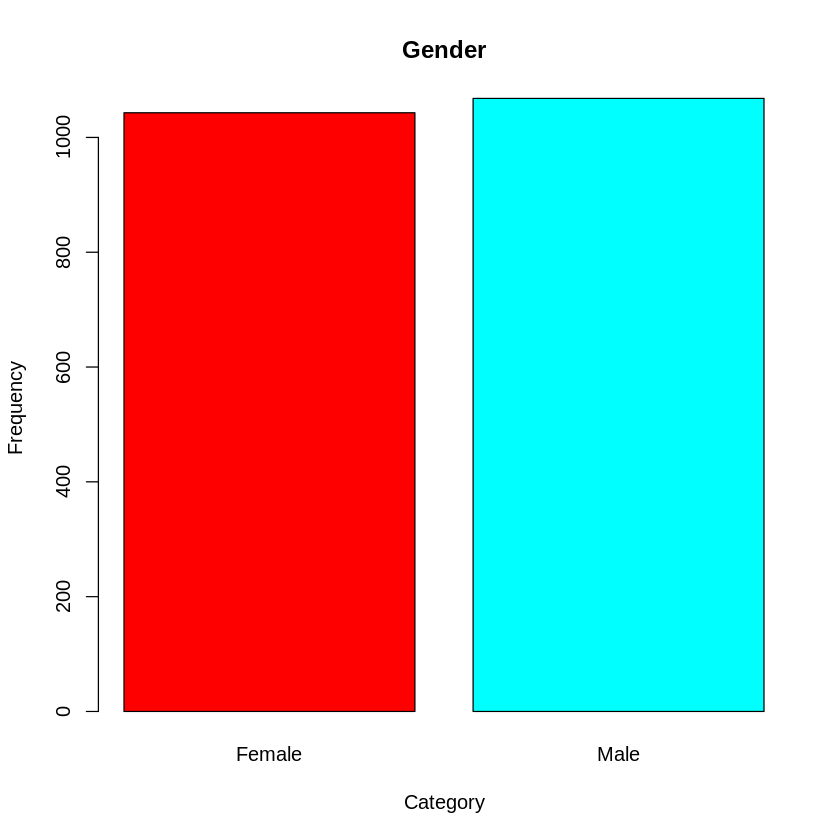

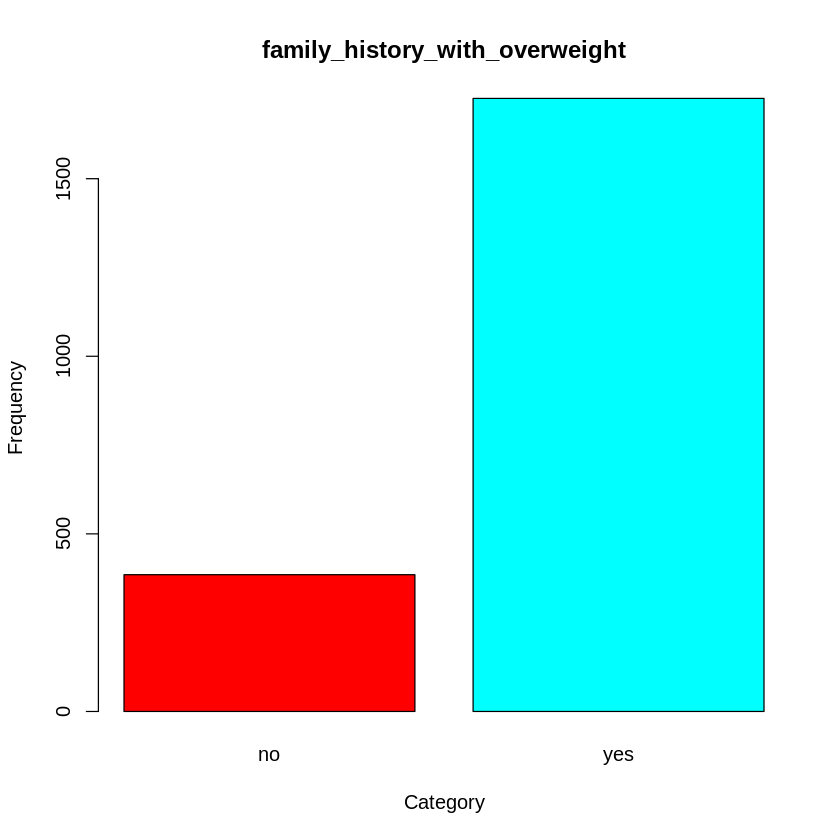

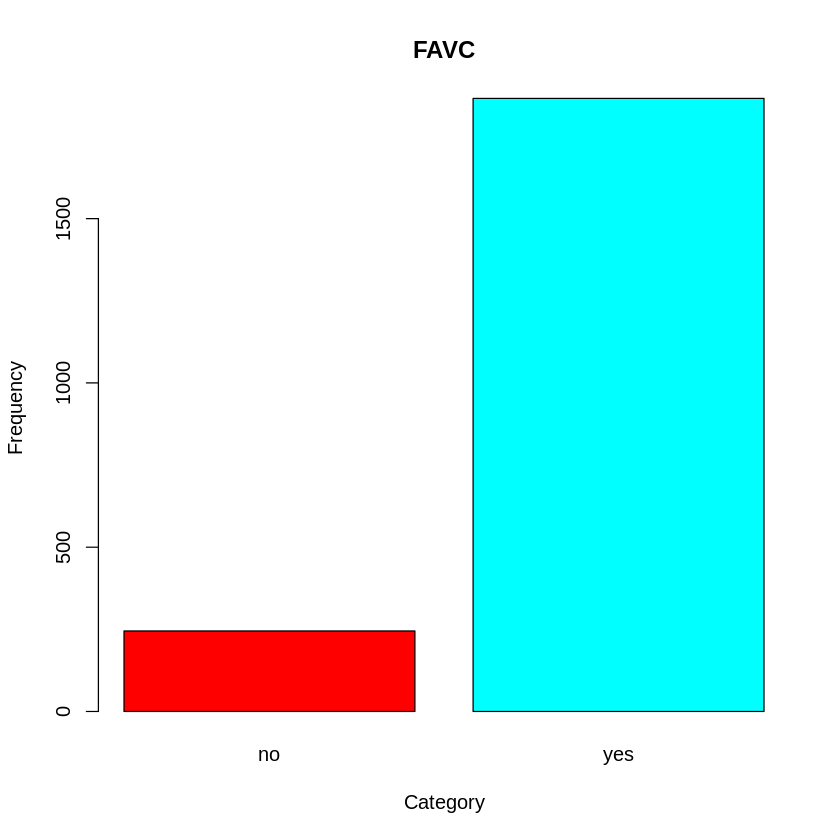

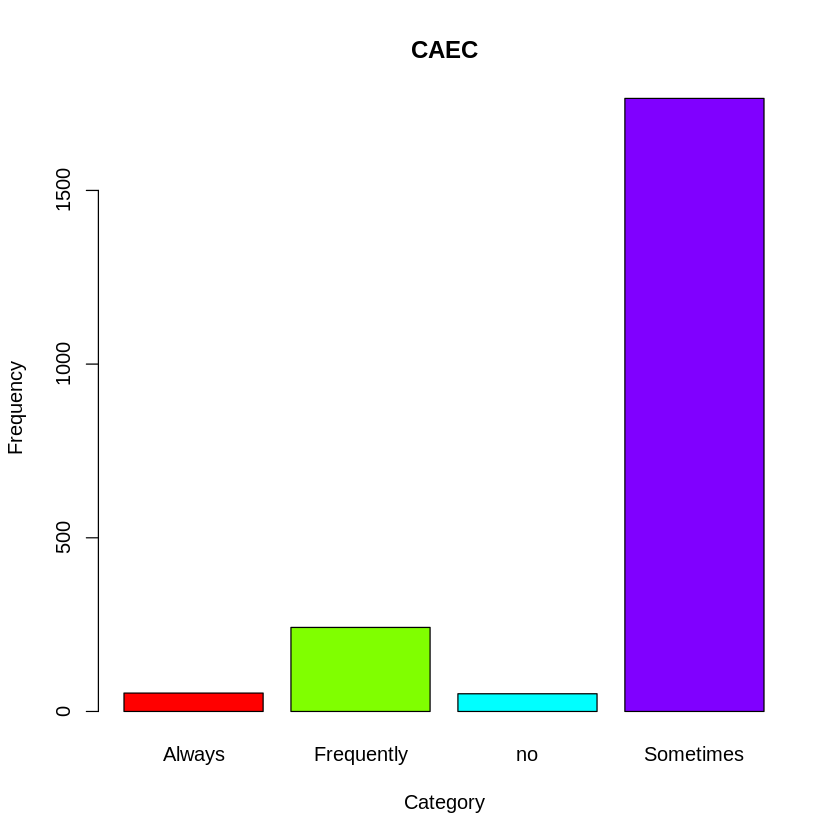

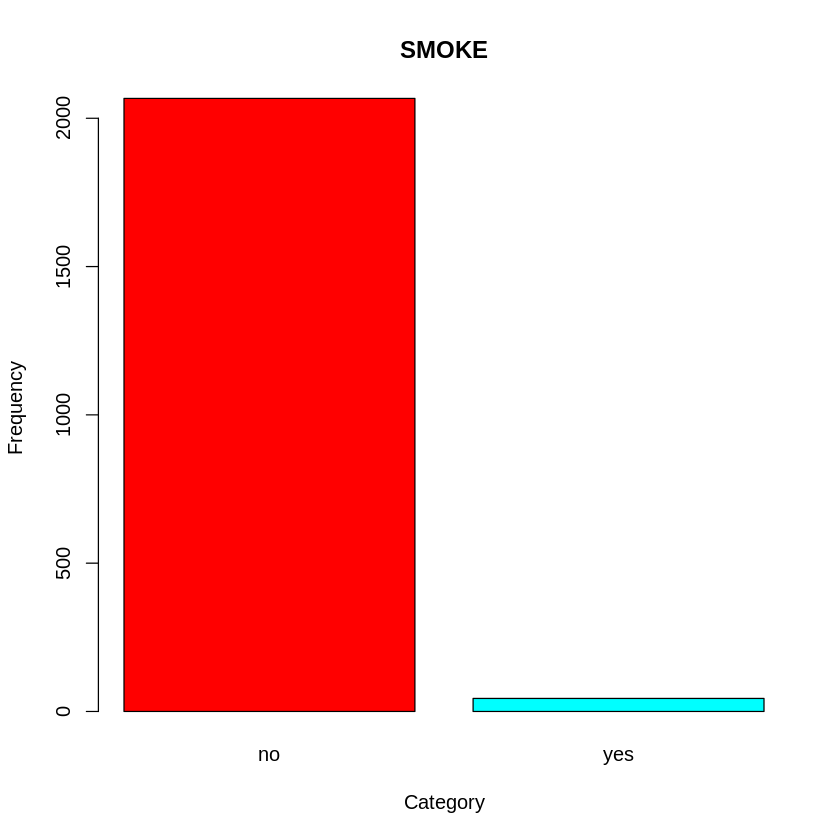

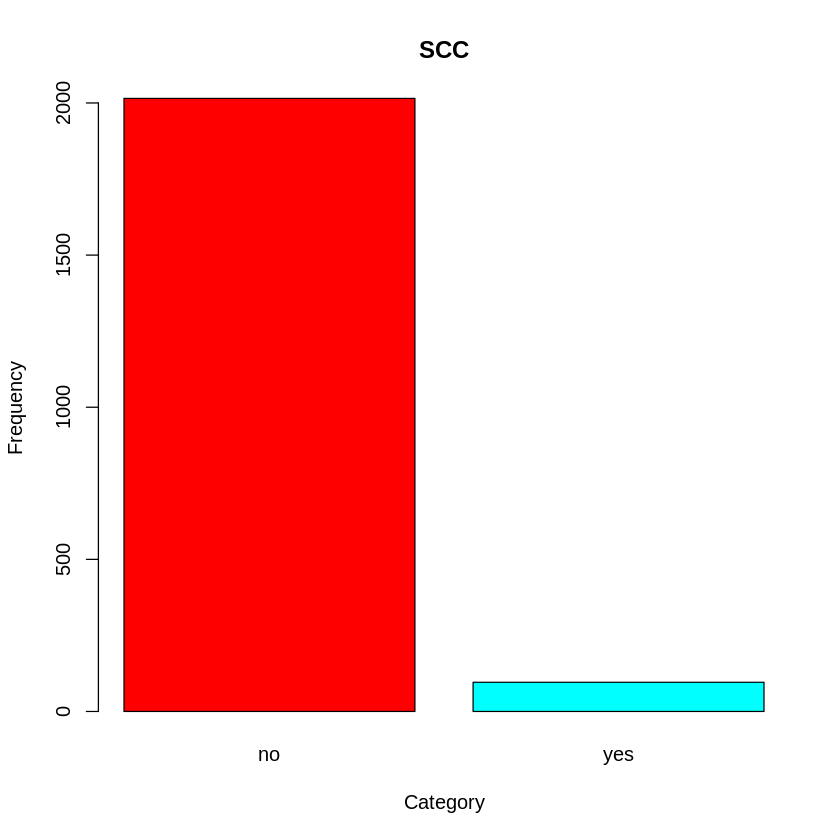

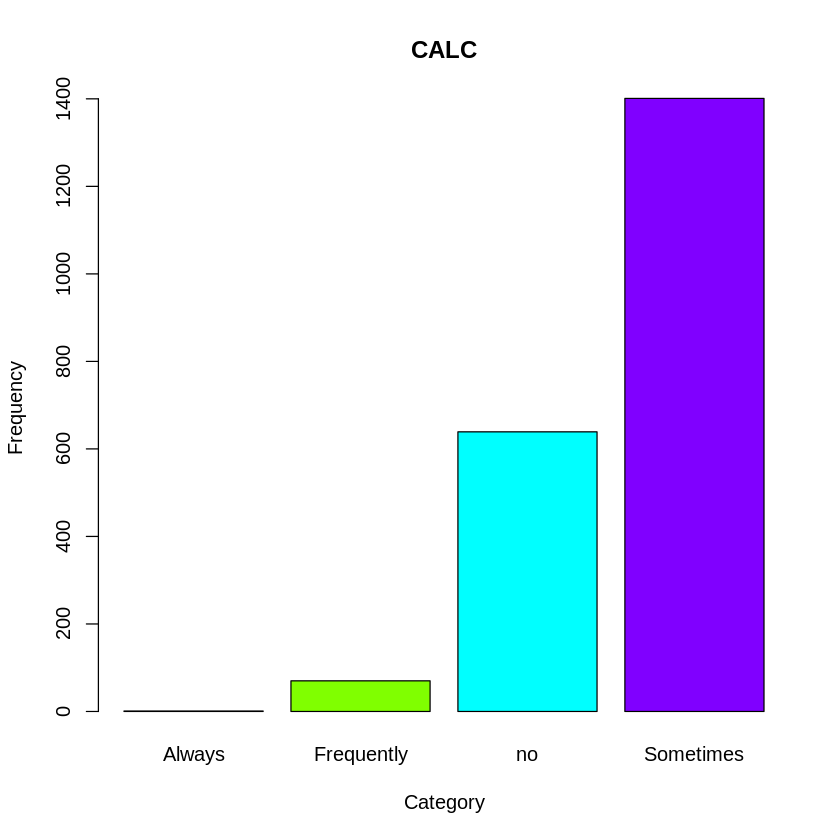

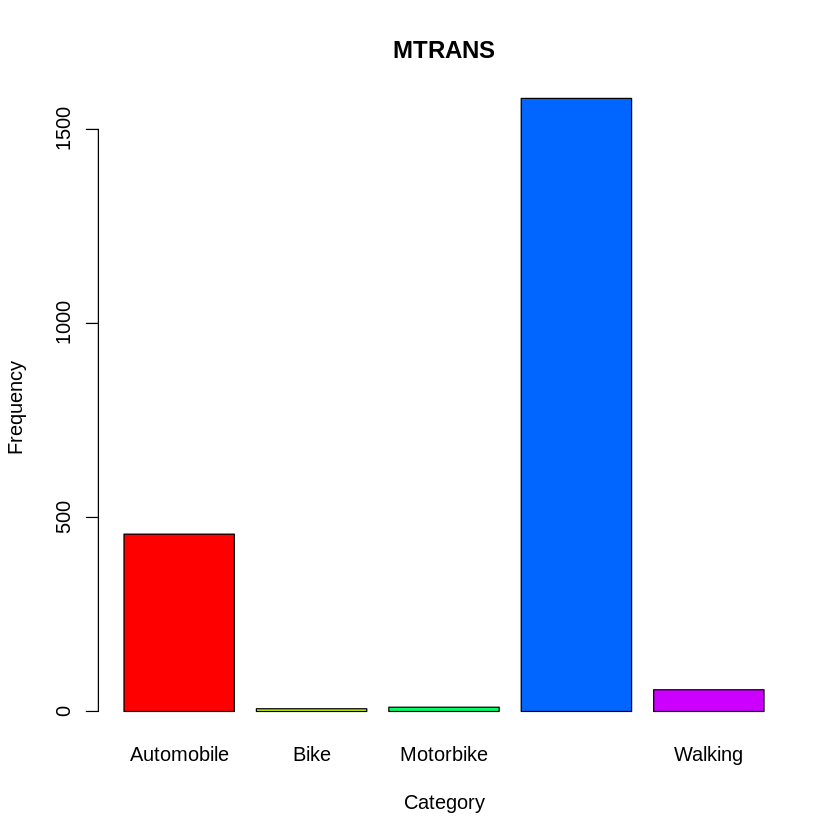

In [122]:
for (c in names(cat)){
  barplot(table(cat[[c]]), main=c, xlab="Category", ylab="Frequency", col=rainbow(length(unique(cat[[c]]))))
}

### Create a horizontal bar plot each specified categorical variable

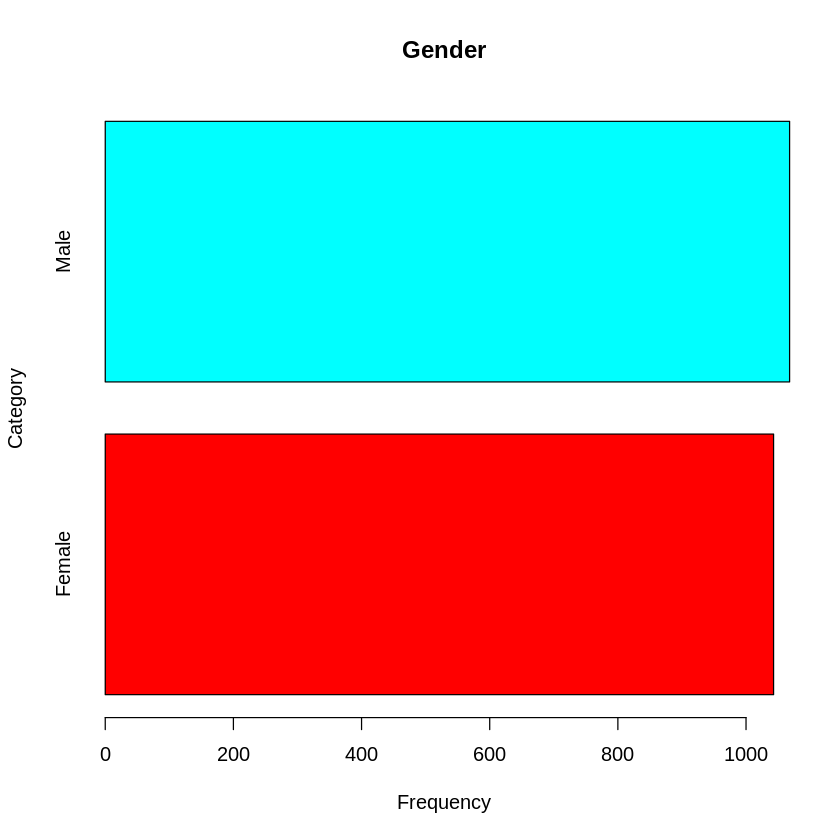

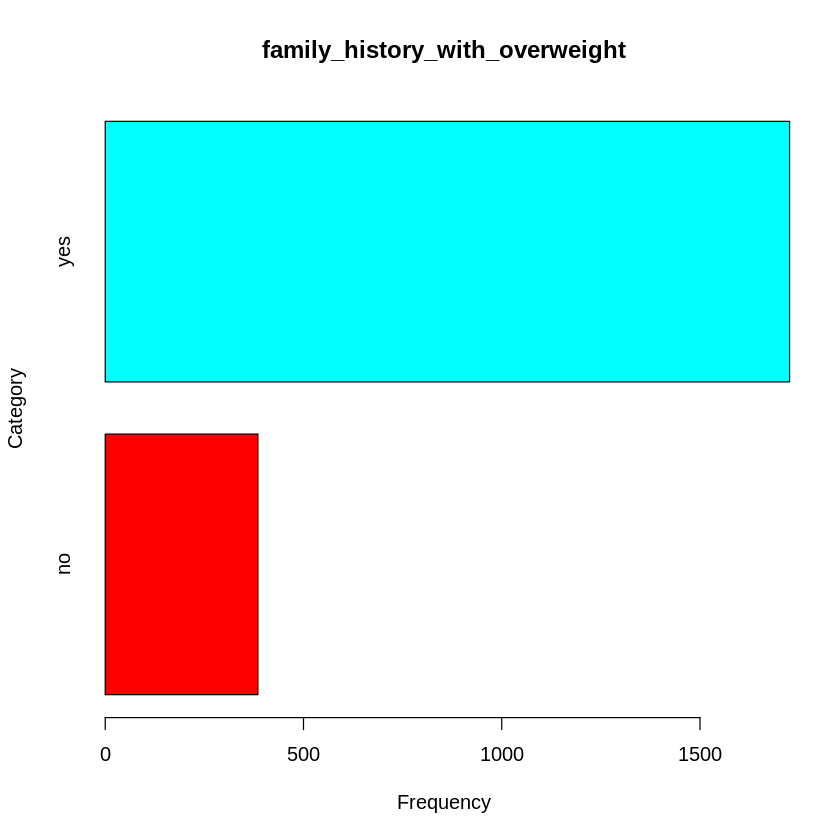

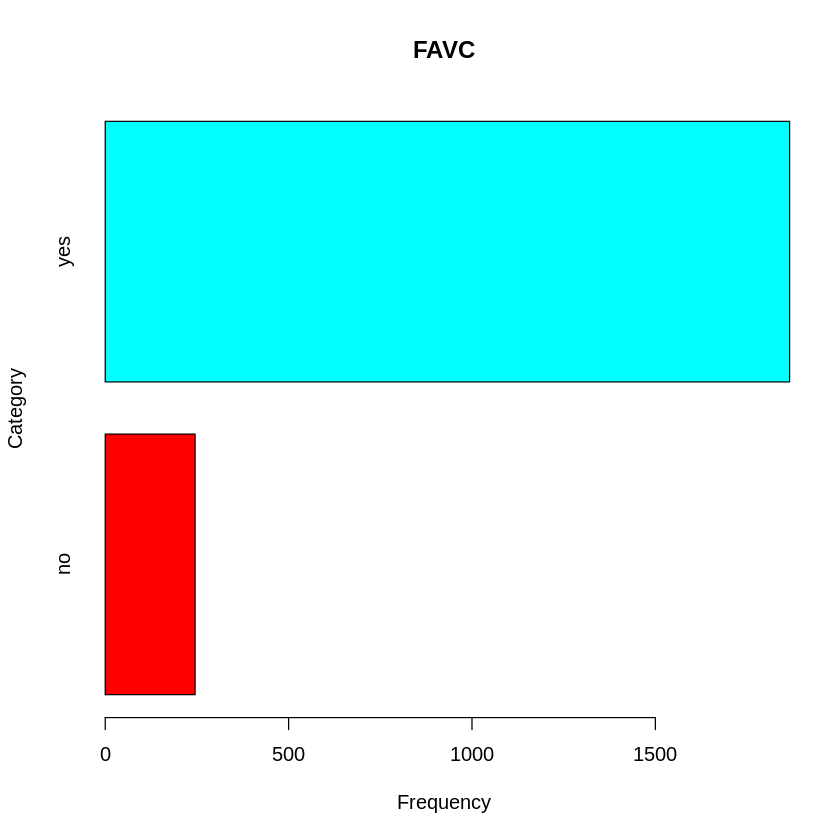

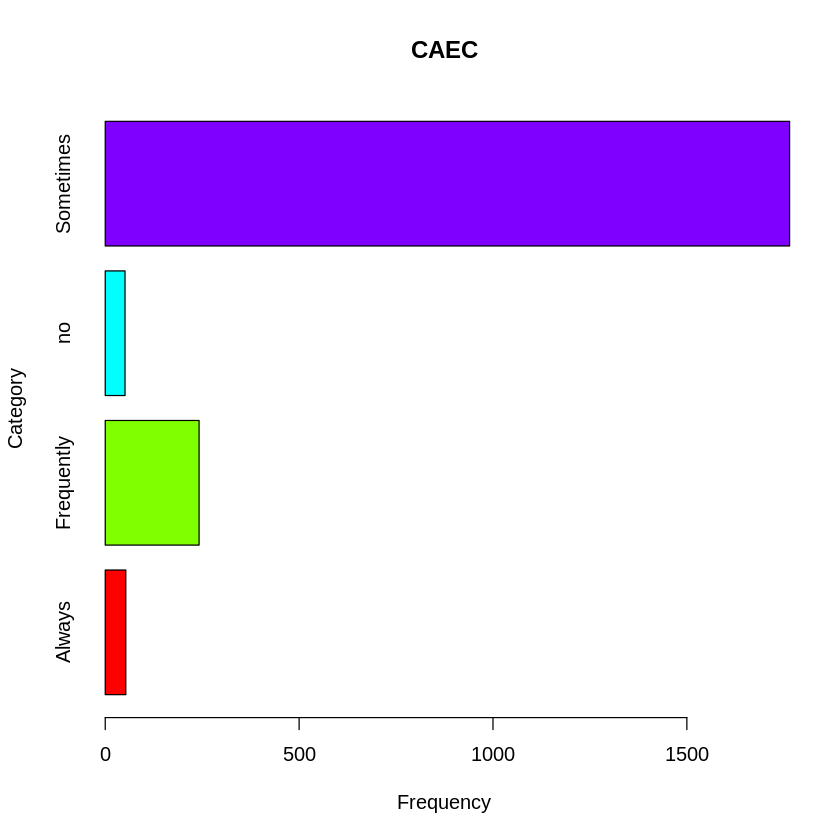

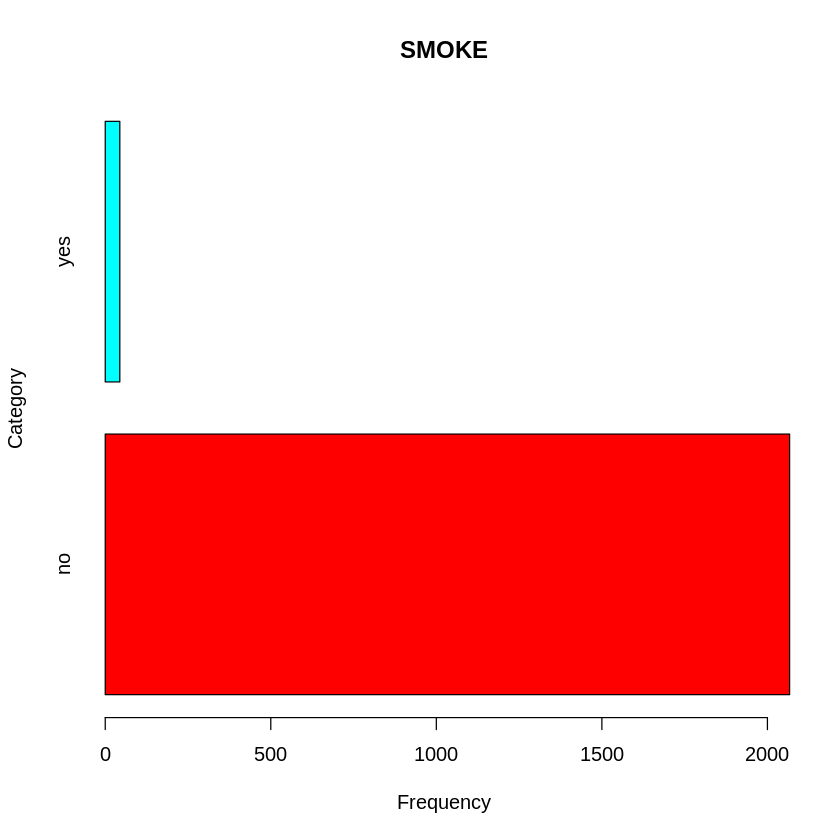

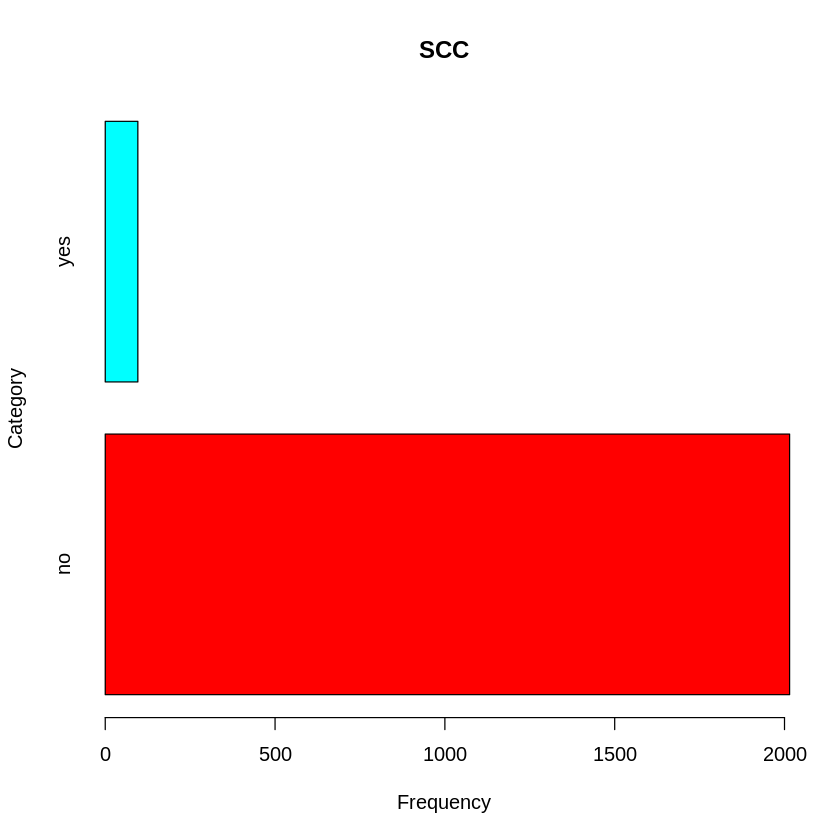

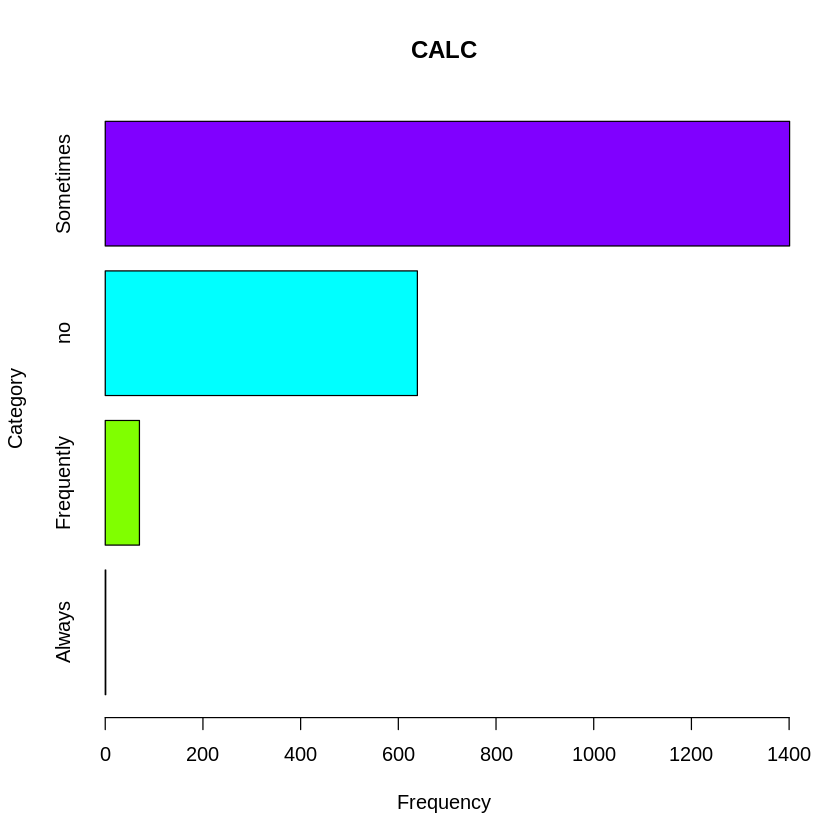

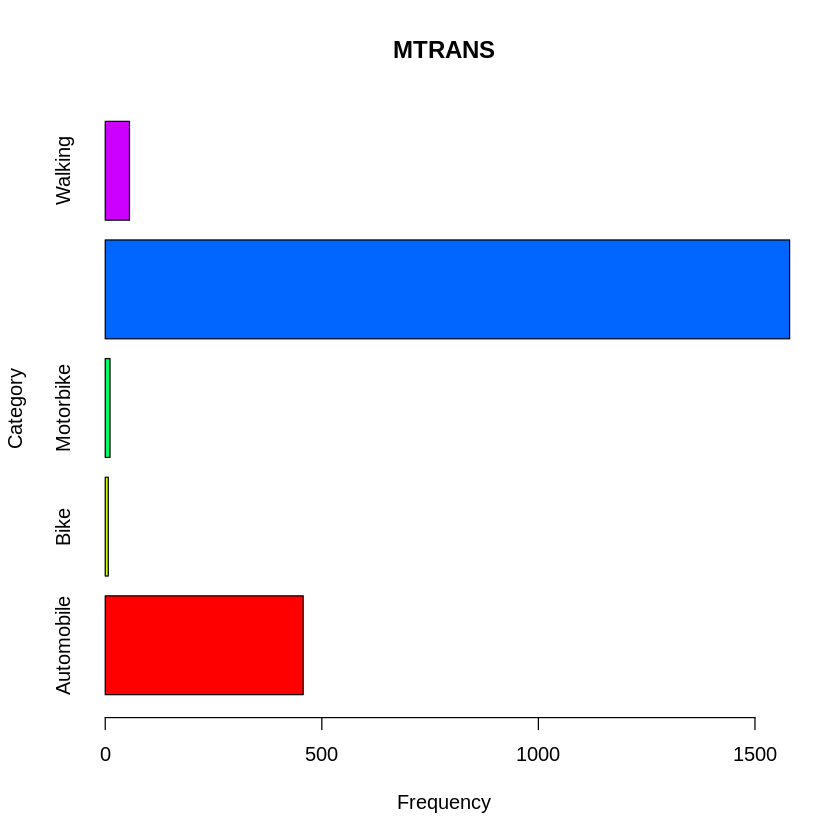

In [123]:
for (c in names(cat)){
  barplot(table(cat[[c]]), main=c, xlab = "Frequency", ylab = "Category", horiz = TRUE, col=rainbow(length(unique(cat[[c]]))))
}

### Create pie charts for each specified categorical variable

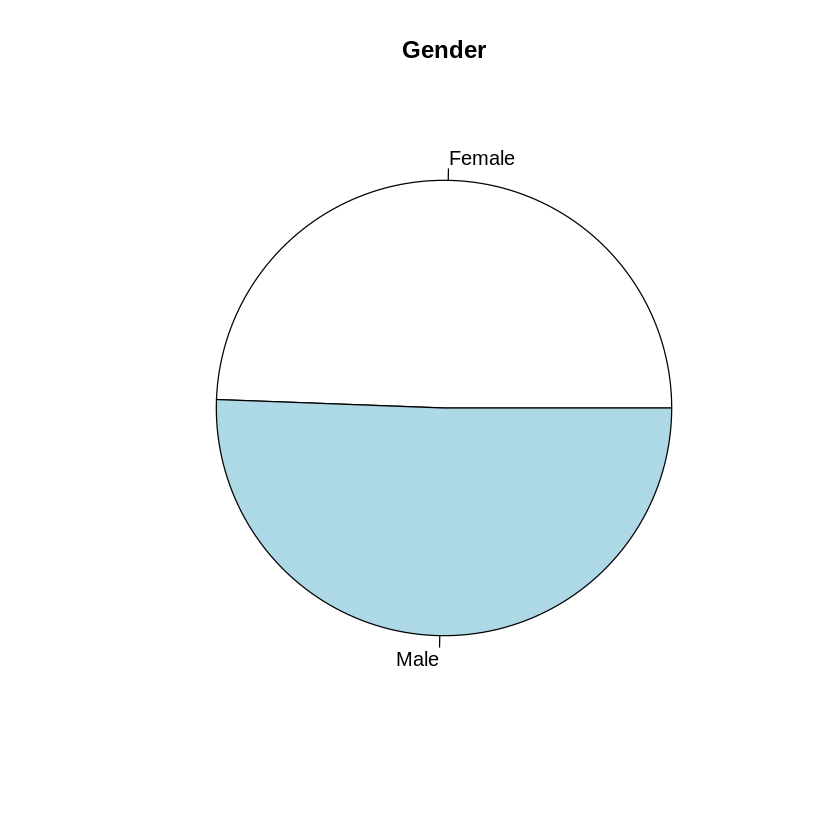

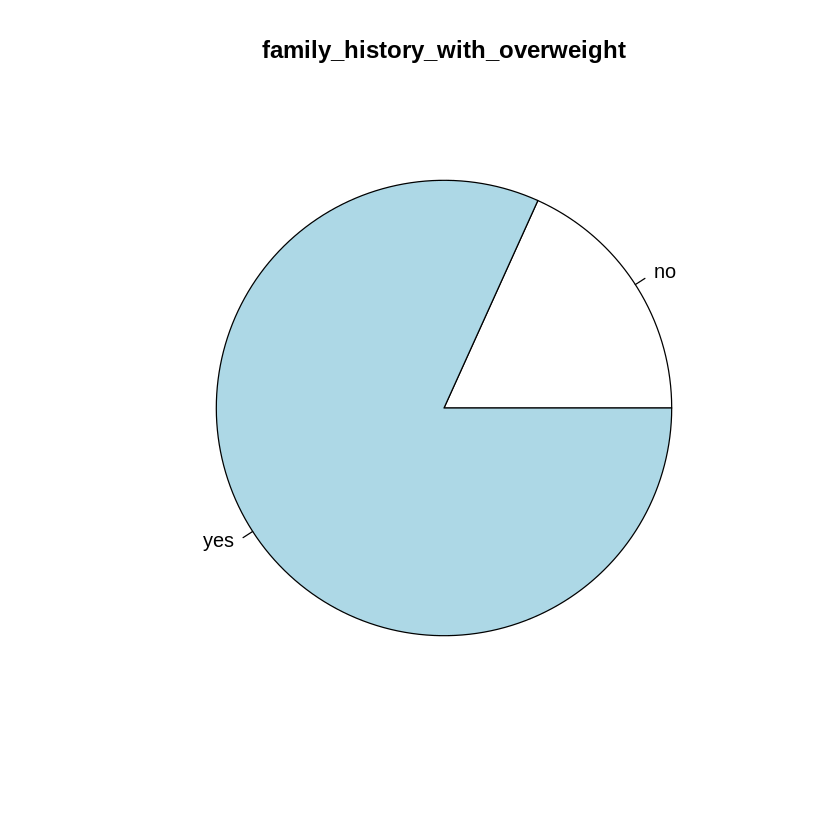

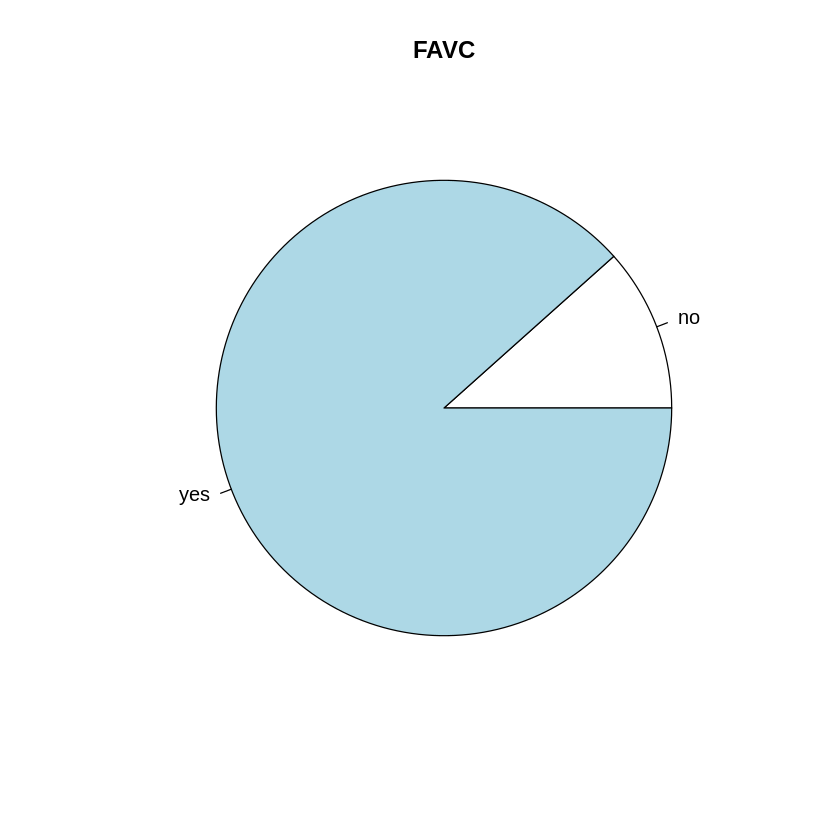

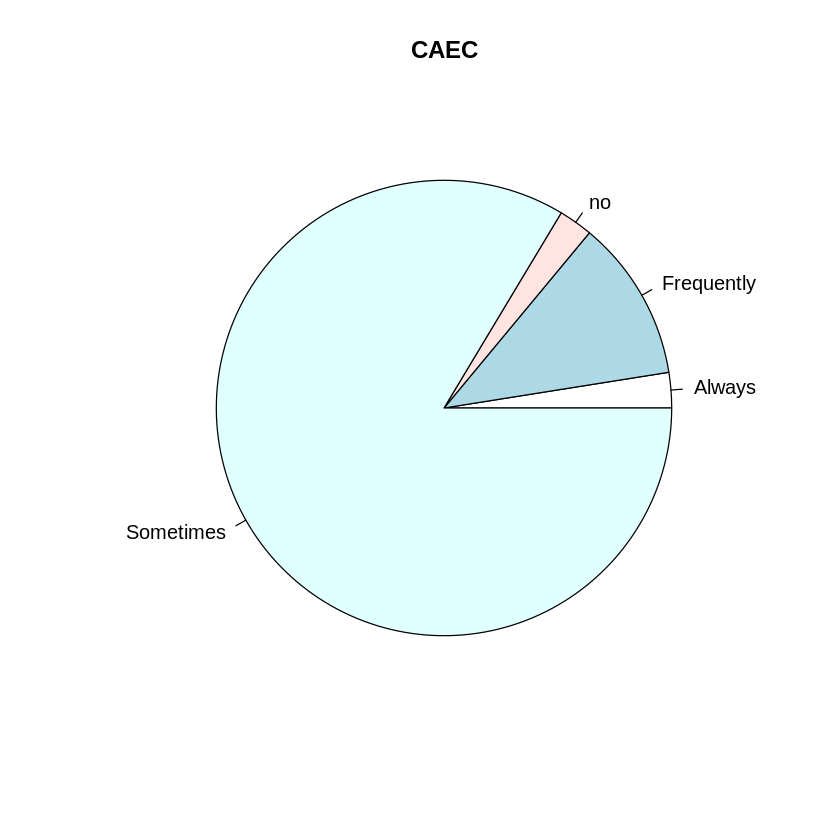

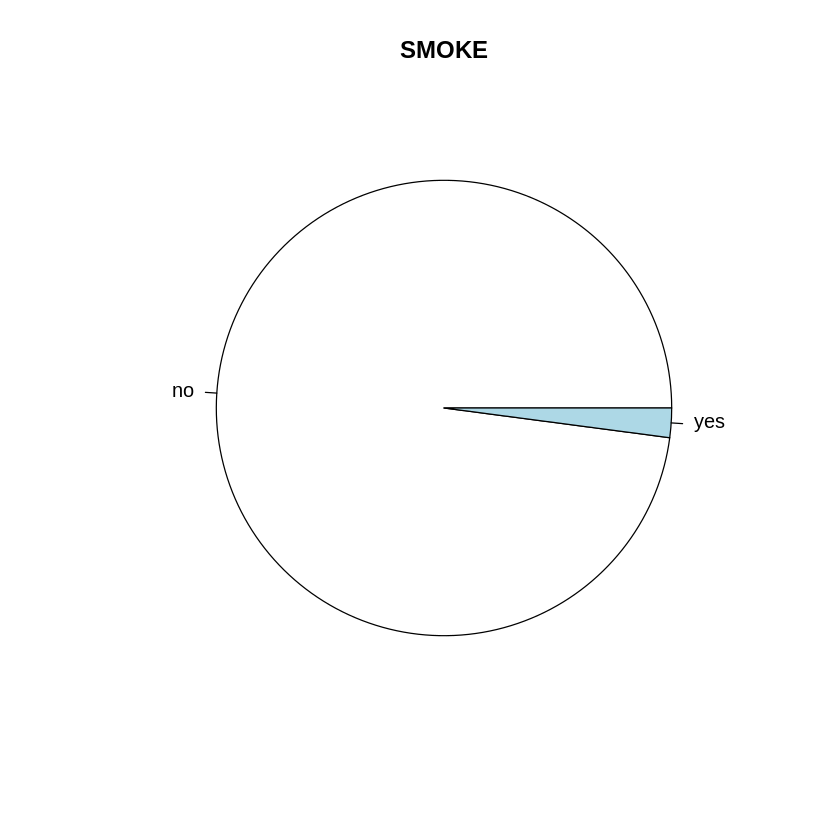

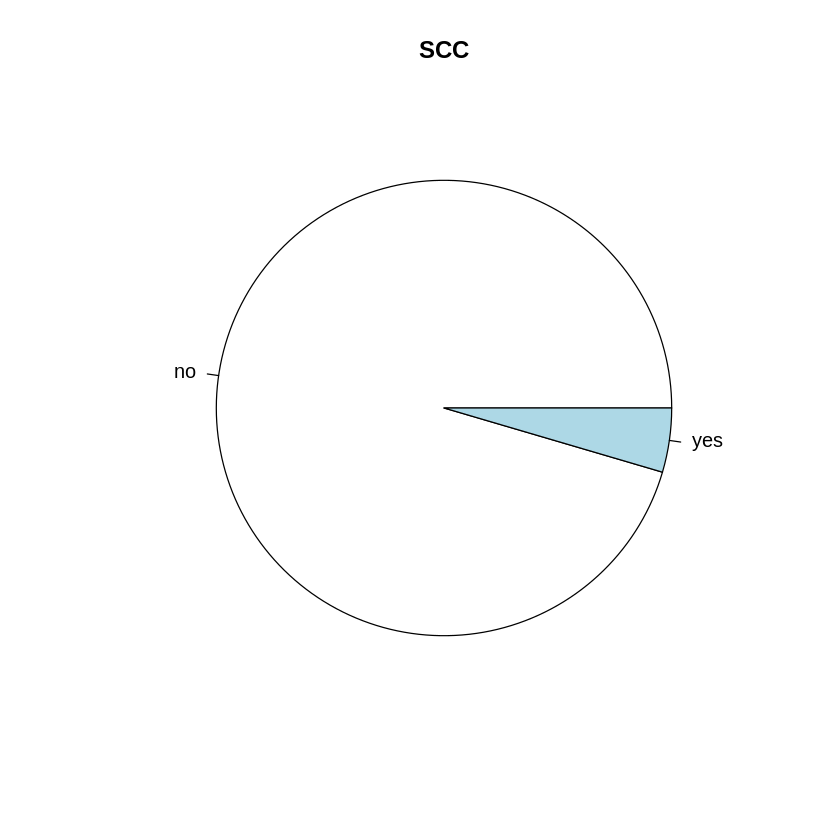

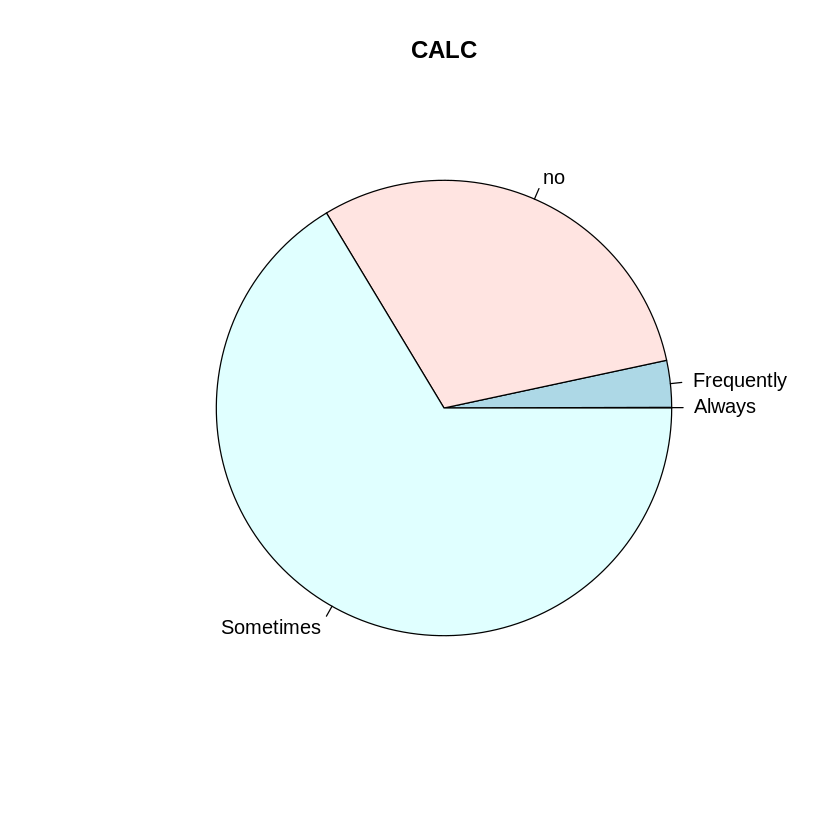

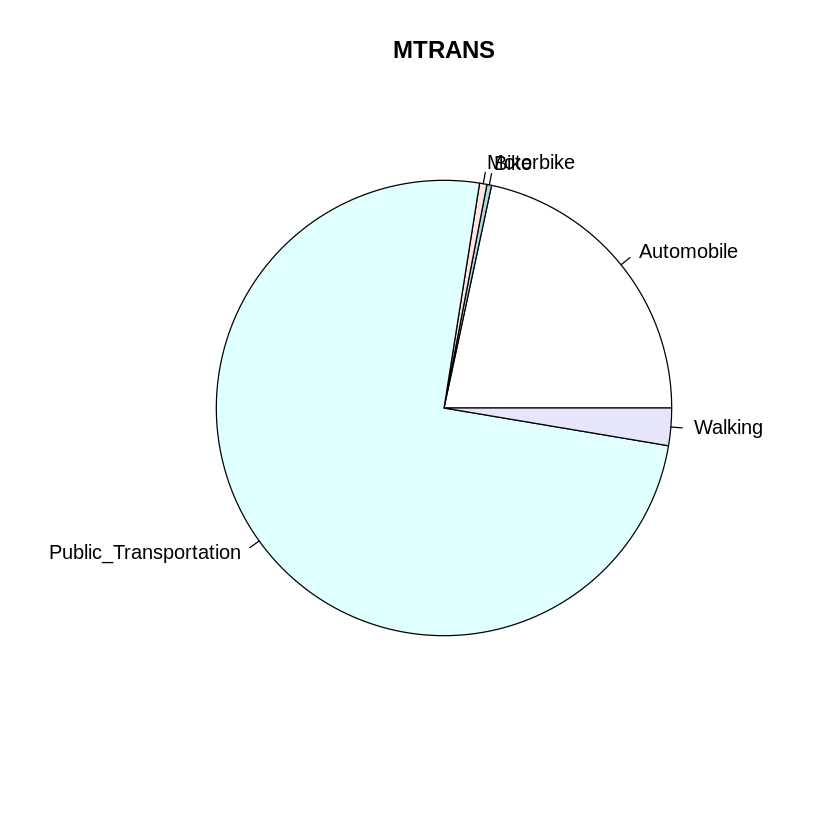

In [124]:
for (c in names(cat)) {
  pie(table(cat[[c]]), main = c)
}

In [125]:
# Reset the layout
par(mfrow = c(1, 1))

# 4. Calculate summary statistics for Numerical Variable
- Calculate appropriate summary statistics for Numerical Variable (e.g., minimum, maximum, mean, median, mode, 1st quartile, 3rd quartile, standard deviation, variance, coefficient of variation, interquartile range, coefficient of quartile deviation, etc.) for each of the numerical variables.


In [126]:
# Extract only the numerical variables from the dataset and rename to 'num'
num <- df[sapply(df, is.numeric)]
head(num)
numerical_df <- num

Age Height Weight FCVC NCP CH2O FAF TUE
1 21  1.62   64.0   2    3   2    0   1  
2 21  1.52   56.0   3    3   3    3   0  
3 23  1.80   77.0   2    3   2    2   1  
4 27  1.80   87.0   3    3   2    2   0  
5 22  1.78   89.8   2    1   2    0   0  
6 29  1.62   53.0   2    3   2    0   0

In [127]:
# Calculate summary statistics for each numerical variable
summary <- lapply(num, function(x) {
  c(
    mean = mean(x, na.rm = TRUE),
    median = median(x, na.rm = TRUE),
    mode = as.numeric(names(sort(table(x), decreasing = TRUE)[1])),
    min = min(x, na.rm = TRUE),
    max = max(x, na.rm = TRUE),
    q1 = quantile(x, 0.25, na.rm = TRUE),
    q3 = quantile(x, 0.75, na.rm = TRUE),
    sd = sd(x, na.rm = TRUE),
    var = var(x, na.rm = TRUE),
    cv = sd(x, na.rm = TRUE) / mean(x, na.rm = TRUE) * 100,
    iqr = IQR(x, na.rm = TRUE),
    cqd = IQR(x, na.rm = TRUE) / (quantile(x, 0.75, na.rm = TRUE) + quantile(x, 0.25, na.rm = TRUE))
  )
})


In [128]:
# Convert the result to a data frame
summary_df <- as.data.frame(do.call(rbind, summary))

# Display the summary statistics
print(summary_df)

             mean    median mode   min    max    q1.25%     q3.75%          sd
Age    24.3125999 22.777890 18.0 14.00  61.00 19.947192  26.000000  6.34596827
Height  1.7016774  1.700499  1.7  1.45   1.98  1.630000   1.768464  0.09330482
Weight 86.5860581 83.000000 80.0 39.00 173.00 65.473343 107.430682 26.19117175
FCVC    2.4190431  2.385502  3.0  1.00   3.00  2.000000   3.000000  0.53392658
NCP     2.6856280  3.000000  3.0  1.00   4.00  2.658738   3.000000  0.77803865
CH2O    2.0080114  2.000000  2.0  1.00   3.00  1.584812   2.477420  0.61295345
FAF     1.0102977  1.000000  0.0  0.00   3.00  0.124505   1.666678  0.85059243
TUE     0.6578659  0.625350  0.0  0.00   2.00  0.000000   1.000000  0.60892726
                var        cv        iqr    cqd.75%
Age    4.027131e+01 26.101562  6.0528080 0.13173401
Height 8.705789e-03  5.483109  0.1384640 0.04074311
Weight 6.859775e+02 30.248717 41.9573390 0.24266259
FCVC   2.850776e-01 22.071810  1.0000000 0.20000000
NCP    6.053441e-01 28.970454

#### Another Method

In [129]:
count = 0;

for (i in num){
  count <- count + 1;
  cat("Summary Statistics For:" , names(num)[count], "\n")

  # Calculate Summary Statistics
  minimum_value <- min(i)
  maximum_value <- max(i)
  mean_value <- mean(i)
  median_value <- median(i)
  mode_value <- mode(i)
  first_quartile <- quantile(i, 0.25)
  third_quartile <- quantile(i, 0.75)
  standard_deviation <- sd(i)
  variance <- var(i)
  coefficient_of_variation <- standard_deviation / mean_value
  interquartile_range <- IQR(i)
  coefficient_of_quartile_deviation <- (IQR(i) / median_value) * 100


  # Print the results
  cat("Minimum:", minimum_value, "\n")
  cat("Maximum:", maximum_value, "\n")
  cat("Mean:", mean_value, "\n")
  cat("Median:", median_value, "\n")
  cat("1st Quartile:", first_quartile, "\n")
  cat("3rd Quartile:", third_quartile, "\n")
  cat("Standard Deviation:", standard_deviation, "\n")
  cat("Variance:", variance, "\n")
  cat("Coefficient of Variation:", coefficient_of_variation, "\n")
  cat("Interquartile Range:", interquartile_range, "\n")
  cat("Coefficient of Quartile Deviation:", coefficient_of_quartile_deviation, "%\n", "\n")
}

Summary Statistics For: Age 
Minimum: 14 
Maximum: 61 
Mean: 24.3126 
Median: 22.77789 
1st Quartile: 19.94719 
3rd Quartile: 26 
Standard Deviation: 6.345968 
Variance: 40.27131 
Coefficient of Variation: 0.2610156 
Interquartile Range: 6.052808 
Coefficient of Quartile Deviation: 26.57317 %
 
Summary Statistics For: Height 
Minimum: 1.45 
Maximum: 1.98 
Mean: 1.701677 
Median: 1.700499 
1st Quartile: 1.63 
3rd Quartile: 1.768464 
Standard Deviation: 0.09330482 
Variance: 0.008705789 
Coefficient of Variation: 0.05483109 
Interquartile Range: 0.138464 
Coefficient of Quartile Deviation: 8.142551 %
 
Summary Statistics For: Weight 
Minimum: 39 
Maximum: 173 
Mean: 86.58606 
Median: 83 
1st Quartile: 65.47334 
3rd Quartile: 107.4307 
Standard Deviation: 26.19117 
Variance: 685.9775 
Coefficient of Variation: 0.3024872 
Interquartile Range: 41.95734 
Coefficient of Quartile Deviation: 50.55101 %
 
Summary Statistics For: FCVC 
Minimum: 1 
Maximum: 3 
Mean: 2.419043 
Median: 2.385502 
1st

# 5. Present the numerical variables with graph
- Present the numerical variables using suitable graph (e.g., histogram, frequency curve, histogram with normal probability curve, box plot, stem and leaf plot, etc.).

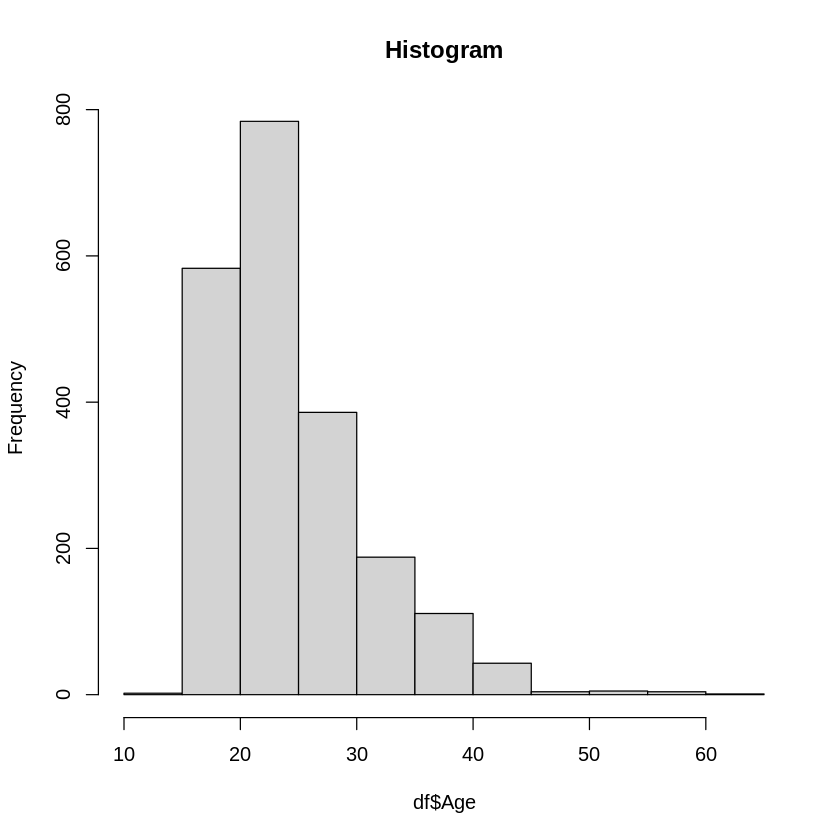

In [130]:
# Draw a histrogram
hist(df$Age, main="Histogram")

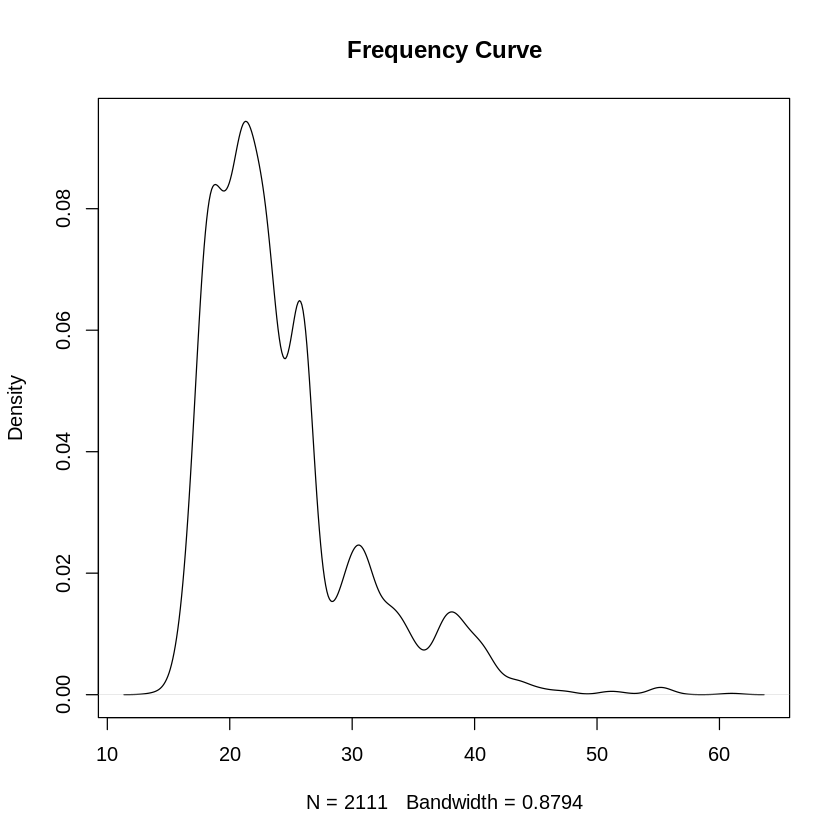

In [131]:
# Draw a Frequency Curve
plot(density(df$Age), main='Frequency Curve')

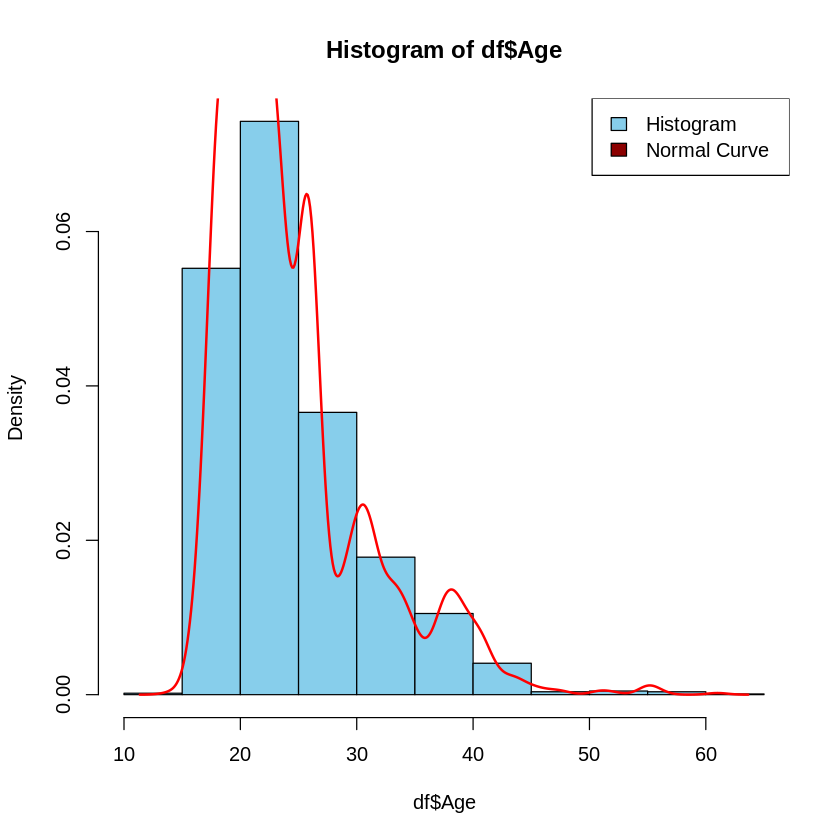

In [132]:
# Histogram with normal probability curve
hist(df$Age, probability = TRUE, col="skyblue")

# Add a normal probability curve
# curve(dnorm(x, mean=mean(df$Age), sd=sd(df$Age)), add = TRUE, col="darkred", lwd=3)
lines(density(df$Age), col="red", lwd=2)

# Add a legend
legend("topright", legend = c("Histogram", "Normal Curve"), fill=c("skyblue", "darkred"))

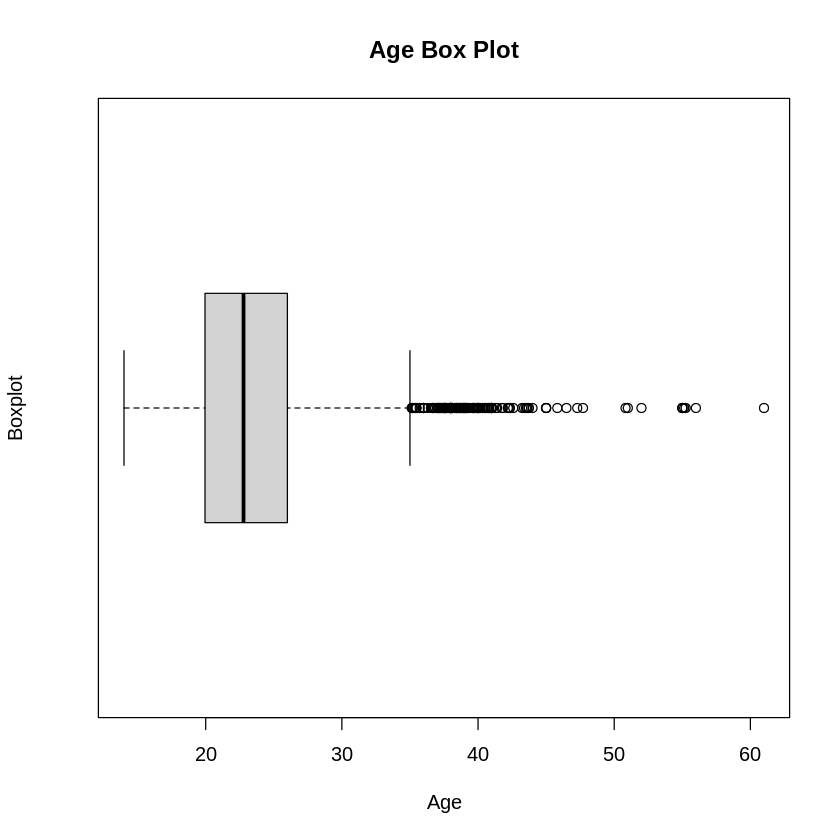

In [133]:
# Box Plot
boxplot(df$Age, horizontal = TRUE, main="Age Box Plot", xlab="Age", ylab="Boxplot")

In [134]:
# Stem and leaf plot
stem(df$Age)


  The decimal point is at the |

  14 | 00
  16 | 00000000011222333445668999990000000000000000000000000000000000011111+27
  18 | 00000000000000000000000000000000000000000000000000000000000000000000+340
  20 | 00000000000000000000000000000000000000000000000000000000001111112222+321
  22 | 00000000000000000000000000000000000000000000000000000000001111111222+257
  24 | 00000000000000000000000000000011111111122222222233333334444444555555+126
  26 | 00000000000000000000000000000000000000000000000000000000000000000000+127
  28 | 0002344444456778888880000000000000012223444455566677777778899999
  30 | 00000000000000011222233344444445555666666666666666777777778899990000+33
  32 | 000023334556678899000000000000000001112222233367777789
  34 | 00000001122222233444456688800000122344557
  36 | 00003567778800011122223445555556666668899
  38 | 000000000001111134444555567777899900001111222346667788
  40 | 0000000123455567788800000000003478
  42 | 223362456677
  44 | 00008
  46 | 537
  48 | 
  50 | 80


# 6. Selecting Summary Measures and Graphs for Variable
- Explain which summary measures and graphs are appropriate to present each individual variable and why. [Hints: test normality for each of the numerical variables. If it follows
normal distribution, present it using mean, standard deviation/variance, coefficient of
variation, histogram, etc. and it does not follow normal distribution, present it using
median, interquartile range, coefficient of quartile deviation, box plot, etc.]

### Noramlity test using Shapiro Wilk Method

In [135]:
# Using Shapiro Wilk test for single one
weight <- shapiro.test(num$Weight)

if(weight$p.value > 0.05){
  print("Fail to reject the Null Hypothesis. The data is normally distributed")
} else {
  print("Reject the Null Hypothesis. The data is not normally distributed")
}

[1] "Reject the Null Hypothesis. The data is not normally distributed"


In [136]:
count = 0;

for (i in numerical_df){
  shapiro_result <- shapiro.test(i)

  count <- count + 1;
  cat("P-Value for", names(num)[count], "is:", shapiro_result$p.value, "\n")

  if(shapiro_result$p.value > 0.05){
    print("Fail to reject the Null Hypothesis. The data is normally distributed.")
  } else {
    print("Reject the Null Hypothesis. The data is not normally distributed.")
  }

}

P-Value for Age is: 3.518278e-39 
[1] "Reject the Null Hypothesis. The data is not normally distributed."
P-Value for Height is: 2.771742e-08 
[1] "Reject the Null Hypothesis. The data is not normally distributed."
P-Value for Weight is: 3.770147e-18 
[1] "Reject the Null Hypothesis. The data is not normally distributed."
P-Value for FCVC is: 2.435506e-41 
[1] "Reject the Null Hypothesis. The data is not normally distributed."
P-Value for NCP is: 2.273978e-49 
[1] "Reject the Null Hypothesis. The data is not normally distributed."
P-Value for CH2O is: 1.116073e-29 
[1] "Reject the Null Hypothesis. The data is not normally distributed."
P-Value for FAF is: 7.714519e-33 
[1] "Reject the Null Hypothesis. The data is not normally distributed."
P-Value for TUE is: 7.391898e-37 
[1] "Reject the Null Hypothesis. The data is not normally distributed."


**Conclusion:** None of the numerical data follows a normal distribution.

### Present Weight variable using median, interquartile range, coefficient of quartile deviation, box plot.


Median Value: 83 
IQR Value: 41.95734 
Coefficient_of_quartile_deviation_value: 50.55101 


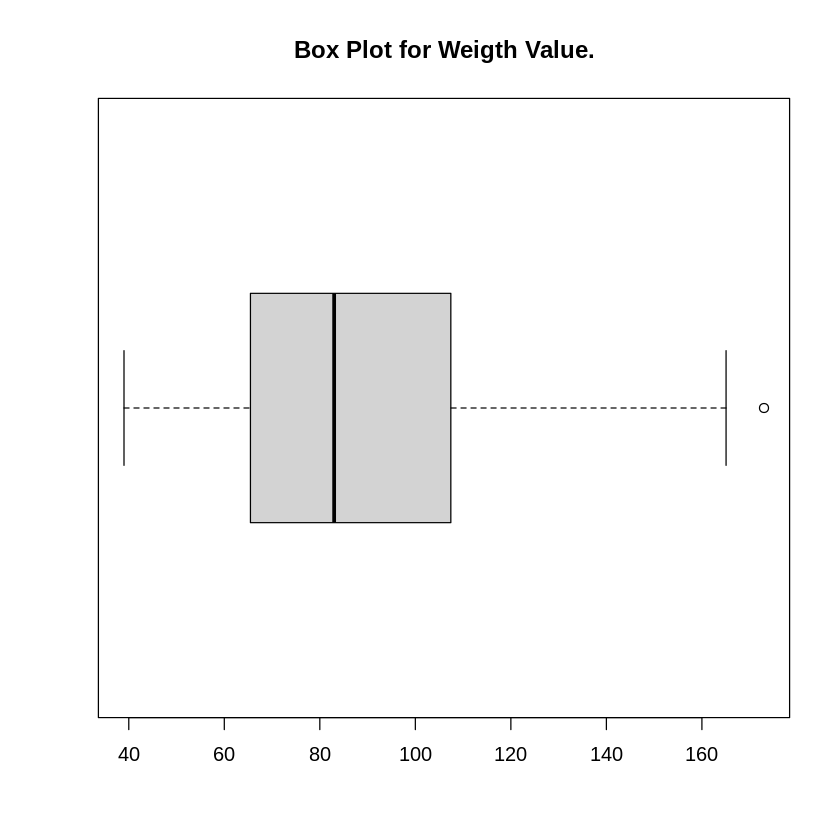

In [137]:
# For Only Weight Value

value <- num$Weight
median_value <- median(value)
iqr_value <- IQR(value)
coefficient_of_quartile_deviation_value <- (iqr_value / median_value) * 100

cat("Median Value:", median_value, "\n")
cat("IQR Value:", iqr_value, "\n")
cat("Coefficient_of_quartile_deviation_value:", coefficient_of_quartile_deviation_value, "\n")

boxplot(value, horizontal = TRUE, main="Box Plot for Weigth Value.")

### For all Parametric Value:


In [138]:
# All of them are not normal

non_normal <- sapply(num, function(x) {
  c(
    median = median(x),
    iqr = IQR(x),
    cqd = IQR(x) / (quantile(x, 0.75) +quantile(x, 0.25))
  )
})

non_normal <- as.data.frame(non_normal)
non_normal

Age       Height     Weight     FCVC     NCP        CH2O      FAF      
median  22.777890 1.70049900 83.0000000 2.385502 3.00000000 2.0000000 1.0000000
iqr      6.052808 0.13846400 41.9573390 1.000000 0.34126200 0.8926075 1.5421725
cqd.75%  0.131734 0.04074311  0.2426626 0.200000 0.06030709 0.2197332 0.8609801
        TUE    
median  0.62535
iqr     1.00000
cqd.75% 1.00000

# 7. Exploratory Subgroup Analysis
- Perform exploratory subgroup analysis: calculate summary statistics for each numerical variable by every categorical variable. <br/>
 For example, calculate minimum, maximum, mean, median, mode, 1st quartile, 3rd quartile, standard deviation, variance, coefficient of variation, interquartile range, coefficient of quartile deviation of age, height, weight, FCVC, CH2O, FAF, TUE separately for every level of the categorical variables such as separately for male and female, smoker and non-smoker, … so on.



Exploratory Analysis for Gender 

Variable: Age 
       min max     mean median mode   q1.25%   q3.75%       sd      var
Female  15  61 24.00191     22   26 19.62772 26.00000 6.407832 41.06030
Male    14  56 24.61602     23   18 20.00000 27.93353 6.273121 39.35204
             cv      iqr cqd.75%
Female 26.69718 6.372279       1
Male   25.48389 7.933529       1

Variable: Height 
        min      max     mean   median mode   q1.25%   q3.75%         sd
Female 1.45 1.843419 1.643298 1.639524  1.6 1.596526 1.699516 0.07450947
Male   1.56 1.980000 1.758690 1.760000  1.7 1.705205 1.807382 0.07217435
               var       cv      iqr cqd.75%
Female 0.005551662 4.534143 0.102990       1
Male   0.005209137 4.103869 0.102177       1


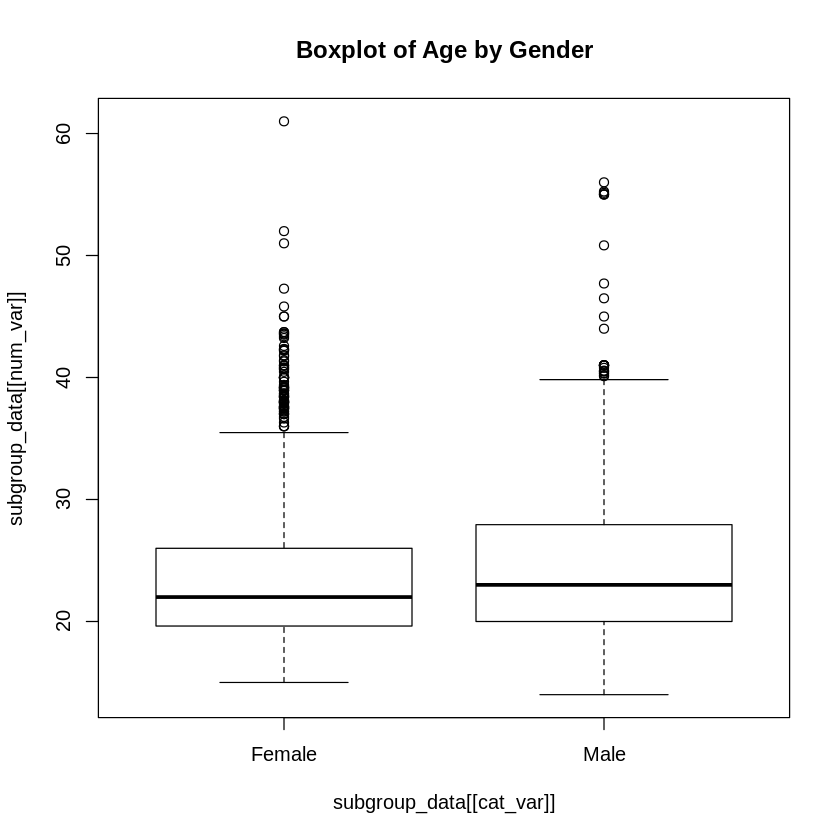


Variable: Weight 
       min      max     mean   median mode q1.25%   q3.75%       sd      var
Female  39 165.0573 82.30236 78.00000   50     58 105.0369 29.72390 883.5105
Male    45 173.0000 90.76948 89.94547   70     75 108.4605 21.40703 458.2609
             cv      iqr cqd.75%
Female 36.11549 47.03686       1
Male   23.58395 33.46052       1


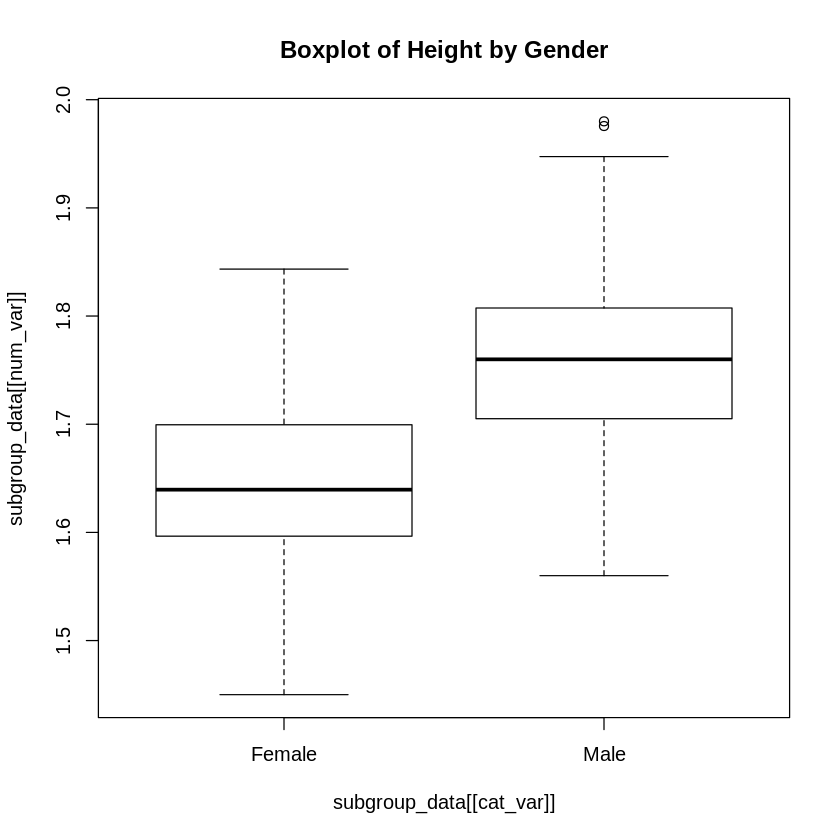


Variable: FCVC 
       min max     mean   median mode q1.25%   q3.75%        sd       var
Female   1   3 2.567319 2.964419    3      2 3.000000 0.5480793 0.3003909
Male     1   3 2.274238 2.032064    2      2 2.737235 0.4773998 0.2279106
             cv       iqr cqd.75%
Female 21.34831 1.0000000       1
Male   20.99164 0.7372353       1


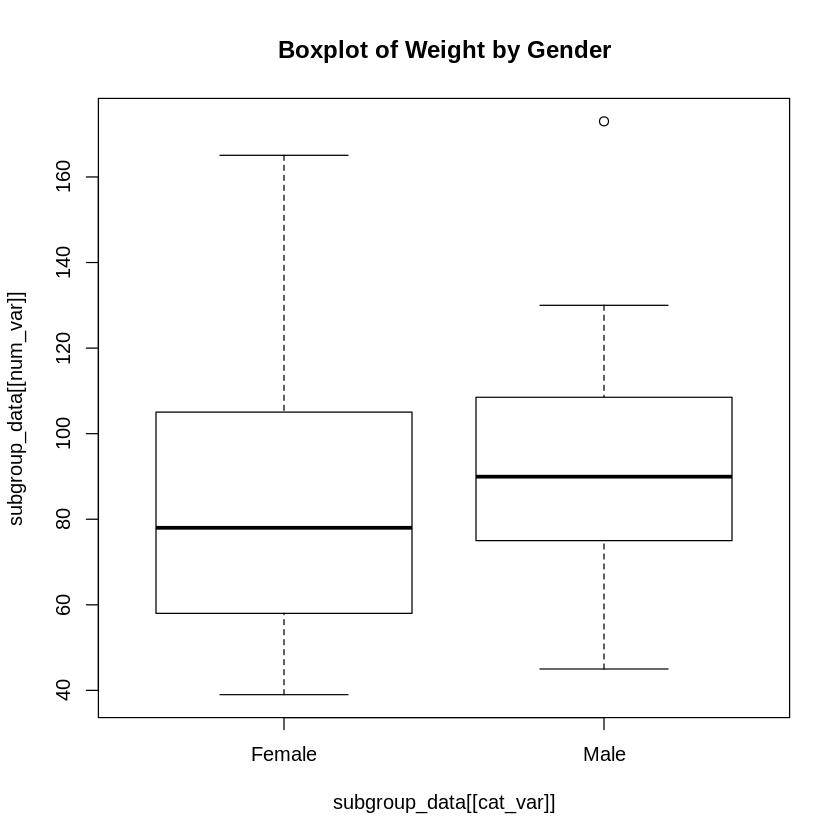


Variable: CH2O 
       min max     mean median mode   q1.25%   q3.75%        sd       var
Female   1   3 1.941083      2    2 1.383862 2.485002 0.6340369 0.4020028
Male     1   3 2.073373      2    2 1.880571 2.464554 0.5845806 0.3417344
             cv       iqr cqd.75%
Female 32.66408 1.1011390       1
Male   28.19467 0.5839837       1


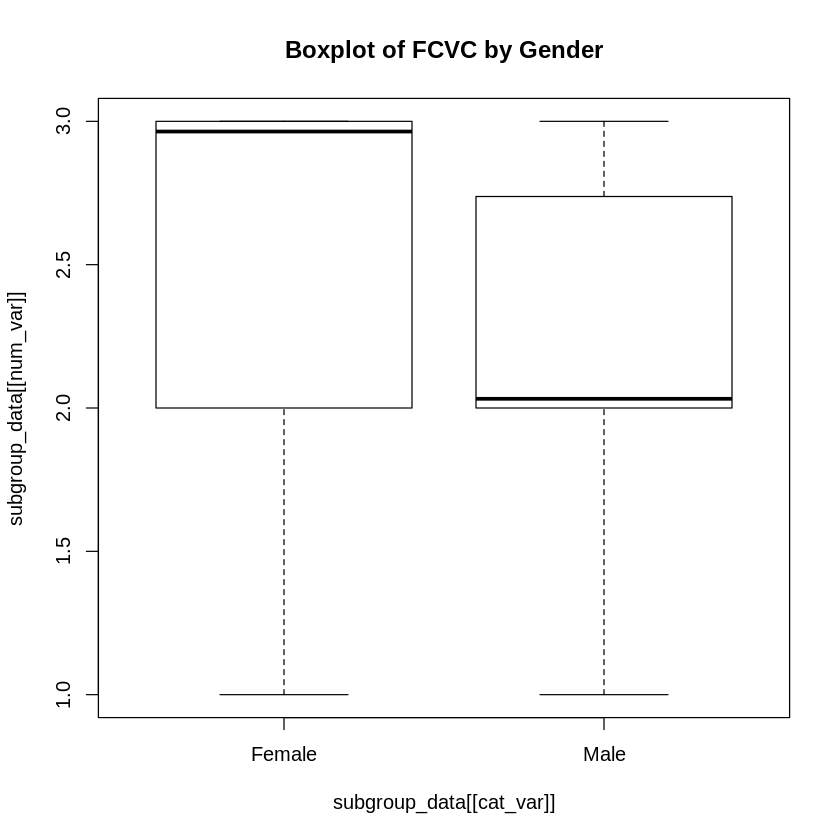


Variable: FAF 
       min max      mean   median mode    q1.25%   q3.75%        sd       var
Female   0   3 0.8471367 0.742113    0 0.0000000 1.507336 0.8404426 0.7063438
Male     0   3 1.1696394 1.000000    1 0.5825545 1.927013 0.8303679 0.6895108
             cv      iqr cqd.75%
Female 99.20980 1.507336       1
Male   70.99349 1.344458       1


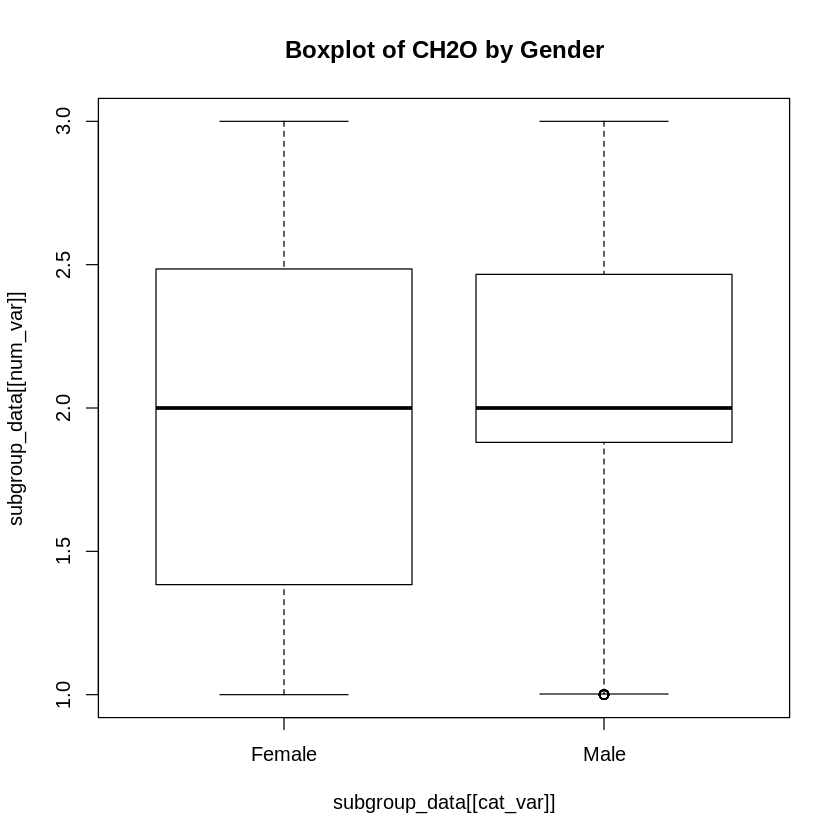


Variable: TUE 
       min max      mean    median mode q1.25% q3.75%        sd       var
Female   0   2 0.6472273 0.6555580    0      0      1 0.5720157 0.3272019
Male     0   2 0.6682555 0.6018645    0      0      1 0.6430322 0.4134904
             cv iqr cqd.75%
Female 88.37941   1       1
Male   96.22550   1       1


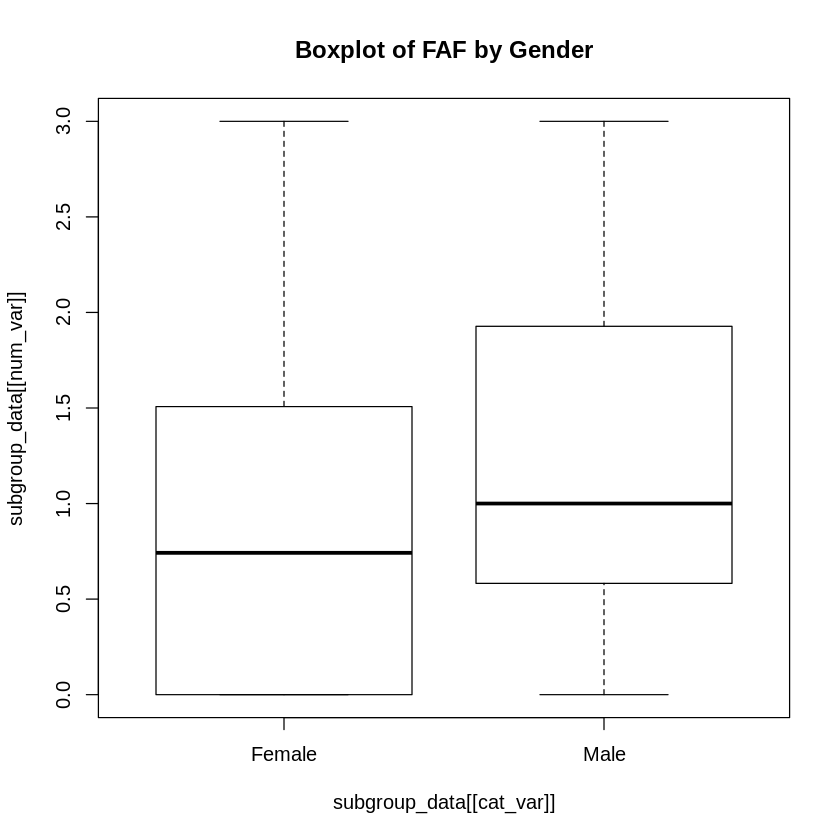



Exploratory Analysis for family_history_with_overweight 

Variable: Age 
    min max     mean median mode   q1.25%   q3.75%       sd      var       cv
no   16  61 21.54902     20   21 18.76603 22.14243 5.588675 31.23329 25.93471
yes  14  56 24.92904     23   26 20.84467 26.76575 6.342066 40.22180 25.44047
         iqr cqd.75%
no  3.376399       1
yes 5.921076       1


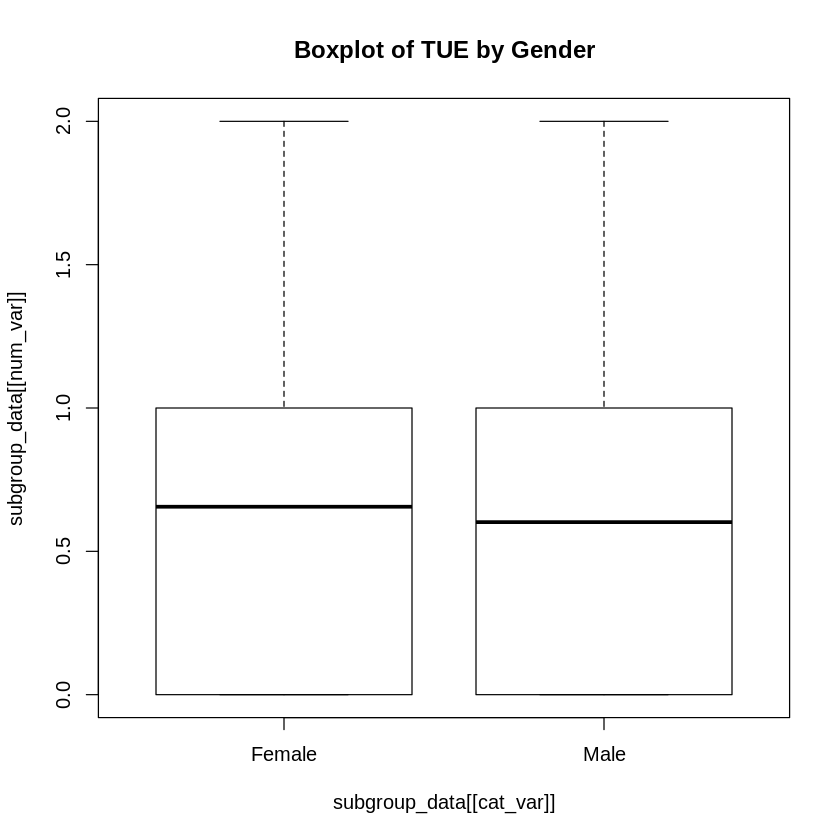


Variable: Height 
     min  max     mean   median mode  q1.25%   q3.75%         sd         var
no  1.45 1.93 1.652757 1.638085 1.62 1.58000 1.720000 0.09480761 0.008988484
yes 1.48 1.98 1.712589 1.713490 1.65 1.64417 1.775583 0.08941269 0.007994630
          cv       iqr cqd.75%
no  5.736331 0.1400000       1
yes 5.220906 0.1314125       1


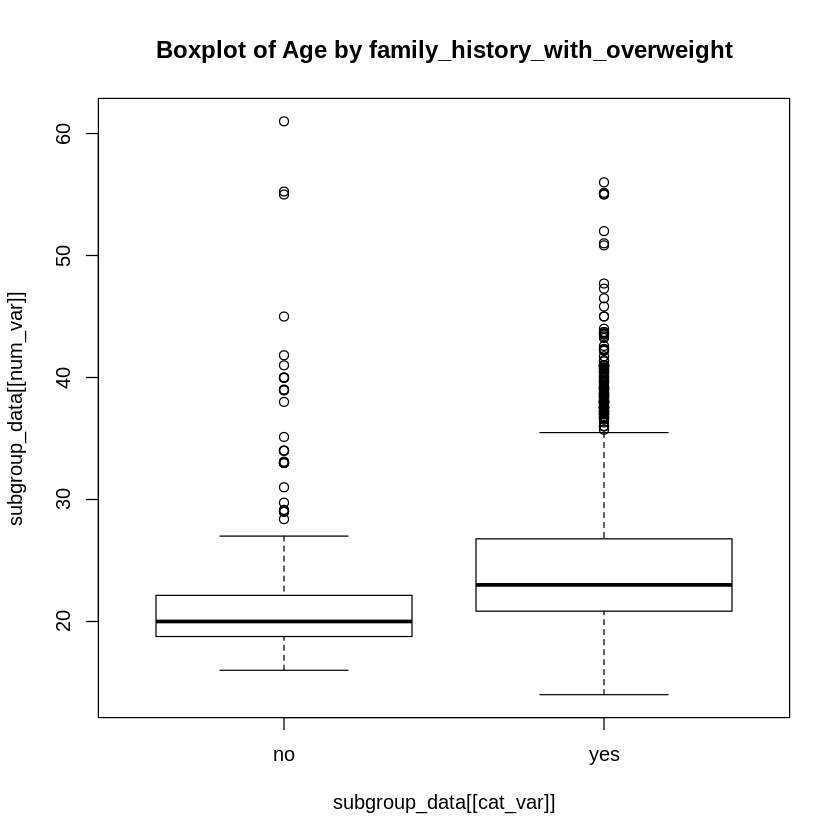


Variable: Weight 
        min max     mean   median mode   q1.25%  q3.75%       sd      var
no  39.1018 115 59.04114 56.00000   50 49.03979  69.500 14.18155 201.1162
yes 39.0000 173 92.73020 89.98668   80 75.85122 111.839 24.23219 587.1990
          cv      iqr cqd.75%
no  24.01977 20.46021       1
yes 26.13193 35.98779       1


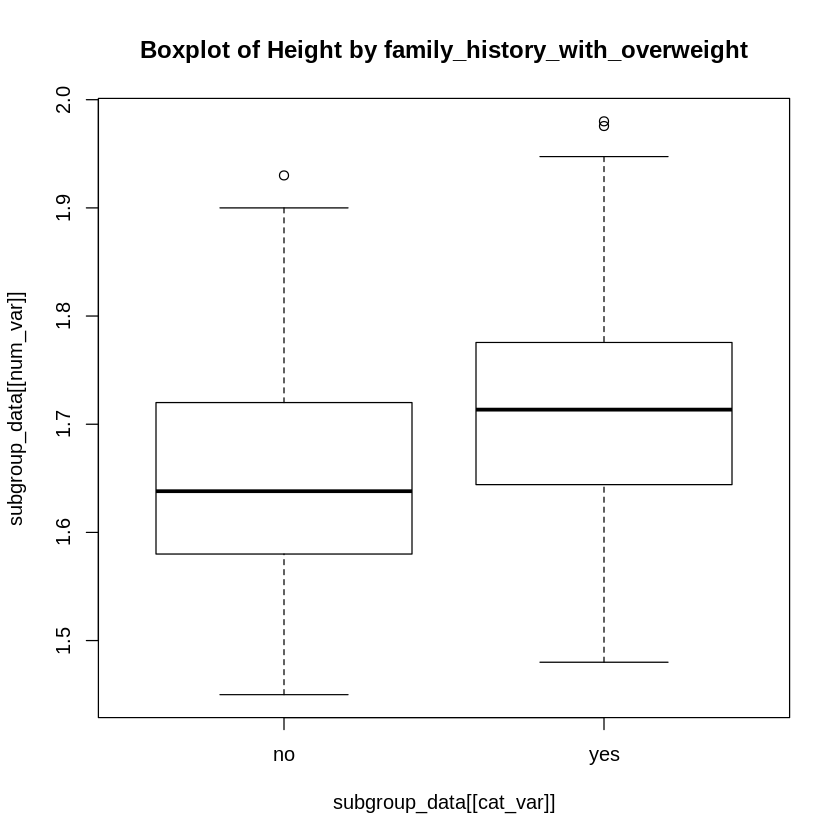


Variable: FCVC 
    min max     mean   median mode q1.25% q3.75%        sd       var       cv
no    1   3 2.373413 2.214980    2      2      3 0.5864359 0.3439071 24.70855
yes   1   3 2.429221 2.397282    3      2      3 0.5211320 0.2715785 21.45264
    iqr cqd.75%
no    1       1
yes   1       1


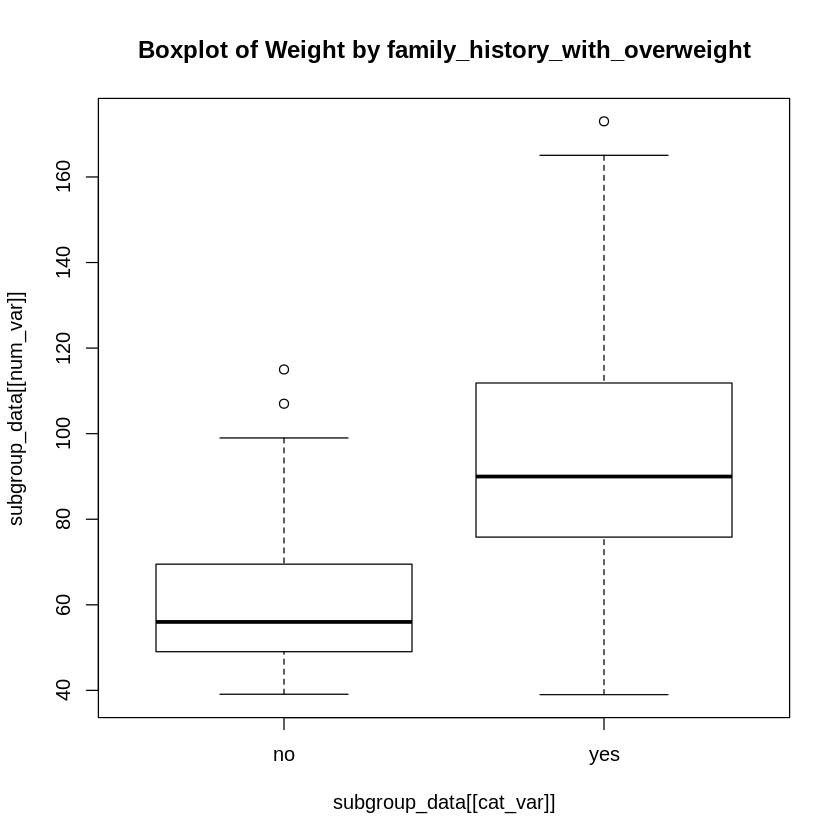


Variable: CH2O 
    min max     mean median mode   q1.25%  q3.75%        sd       var       cv
no    1   3 1.816709      2    2 1.055019 2.00000 0.6637708 0.4405917 36.53699
yes   1   3 2.050683      2    2 1.688156 2.52922 0.5928719 0.3514971 28.91095
          iqr cqd.75%
no  0.9449810       1
yes 0.8410635       1


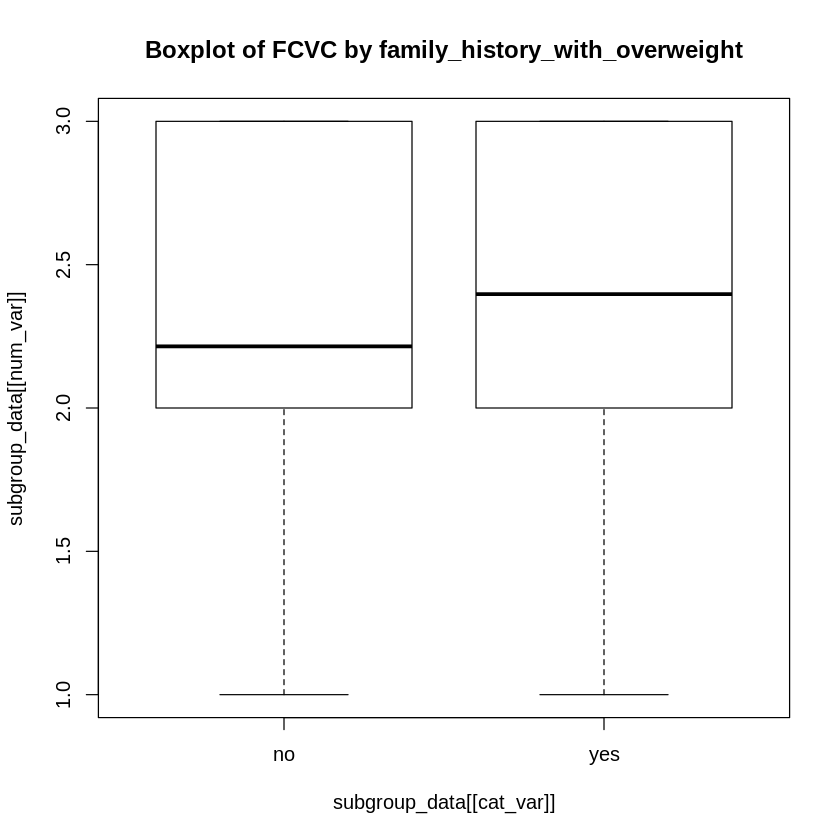


Variable: FAF 
    min max      mean median mode    q1.25%  q3.75%        sd       var
no    0   3 1.1123414      1    0 0.1101740 2.00000 0.9275295 0.8603111
yes   0   3 0.9875359      1    0 0.1291667 1.60051 0.8310420 0.6906308
          cv      iqr cqd.75%
no  83.38533 1.889826       1
yes 84.15309 1.471343       1


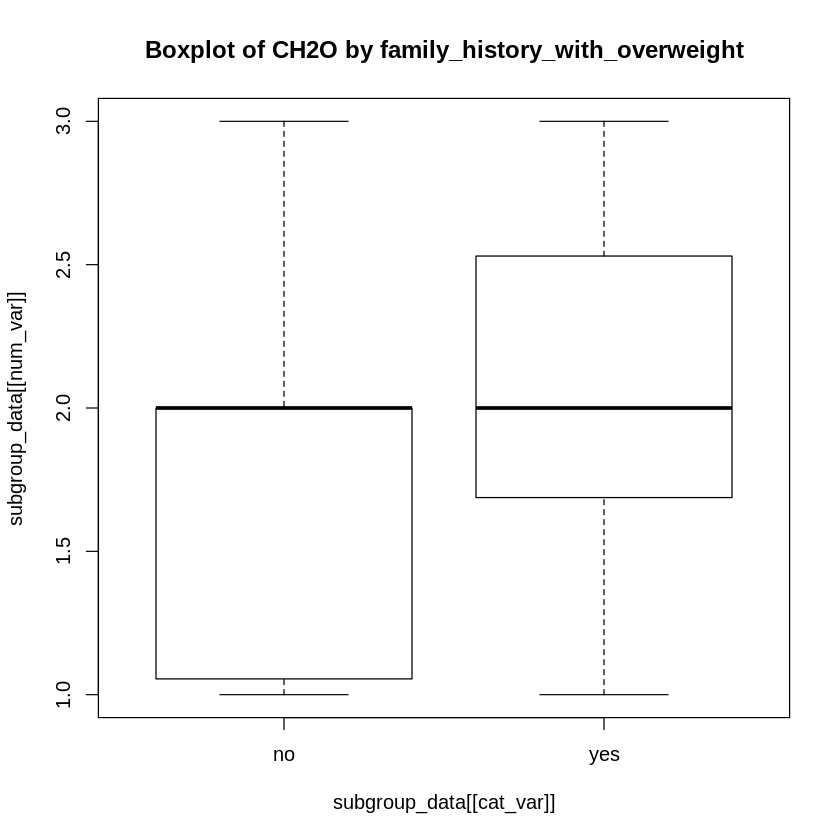


Variable: TUE 
    min max      mean    median mode     q1.25% q3.75%        sd       var
no    0   2 0.6282920 0.7146270    0 0.00000000      1 0.6363390 0.4049273
yes   0   2 0.6644626 0.6238585    0 0.02257475      1 0.6026358 0.3631699
           cv       iqr cqd.75%
no  101.28077 1.0000000       1
yes  90.69521 0.9774253       1


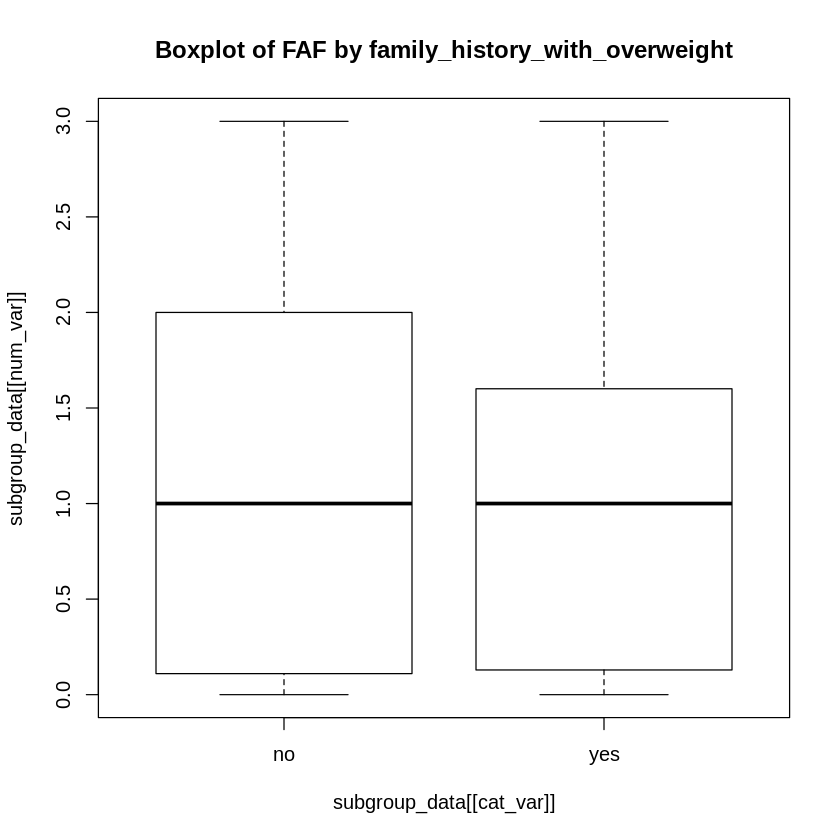



Exploratory Analysis for CAEC 

Variable: Age 
           min max     mean median mode   q1.25%   q3.75%       sd       var
Always      16  61 23.07547     21   21 19.00000 24.00000 7.306080 53.378810
Frequently  16  55 22.15846     21   18 19.03585 22.99968 5.305890 28.152473
no          19  35 21.82089     21   21 21.00000 21.84370 2.758298  7.608206
Sometimes   14  56 24.71710     23   18 20.00000 26.65042 6.442758 41.509137
                 cv       iqr cqd.75%
Always     31.66167 5.0000000       1
Frequently 23.94521 3.9638223       1
no         12.64063 0.8437045       1
Sometimes  26.06600 6.6504190       1


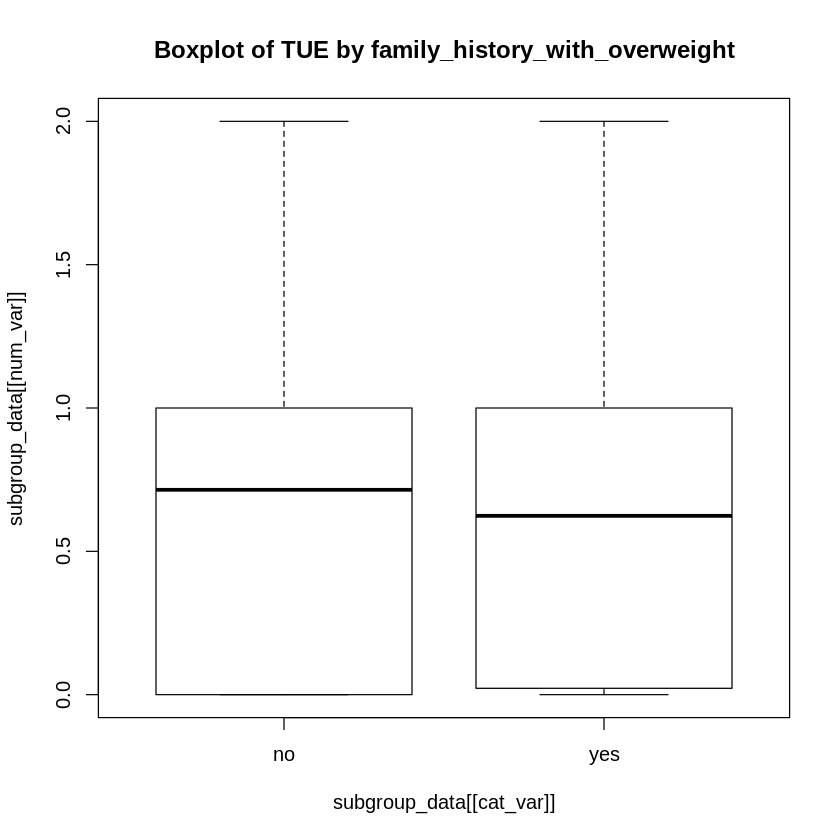


Variable: Height 
                min      max     mean   median mode   q1.25%   q3.75%
Always     1.500000 1.980000 1.704340 1.700000 1.60 1.630000 1.800000
Frequently 1.450000 1.910000 1.669956 1.680000 1.70 1.594283 1.739363
no         1.590000 1.810000 1.644985 1.620000 1.62 1.616968 1.639228
Sometimes  1.456346 1.975663 1.707585 1.708742 1.65 1.640000 1.773656
                   sd         var       cv       iqr cqd.75%
Always     0.10713955 0.011478882 6.286279 0.1700000       1
Frequently 0.09759786 0.009525342 5.844338 0.1450805       1
no         0.05577012 0.003110306 3.390311 0.0222595       1
Sometimes  0.09175719 0.008419381 5.373506 0.1336560       1


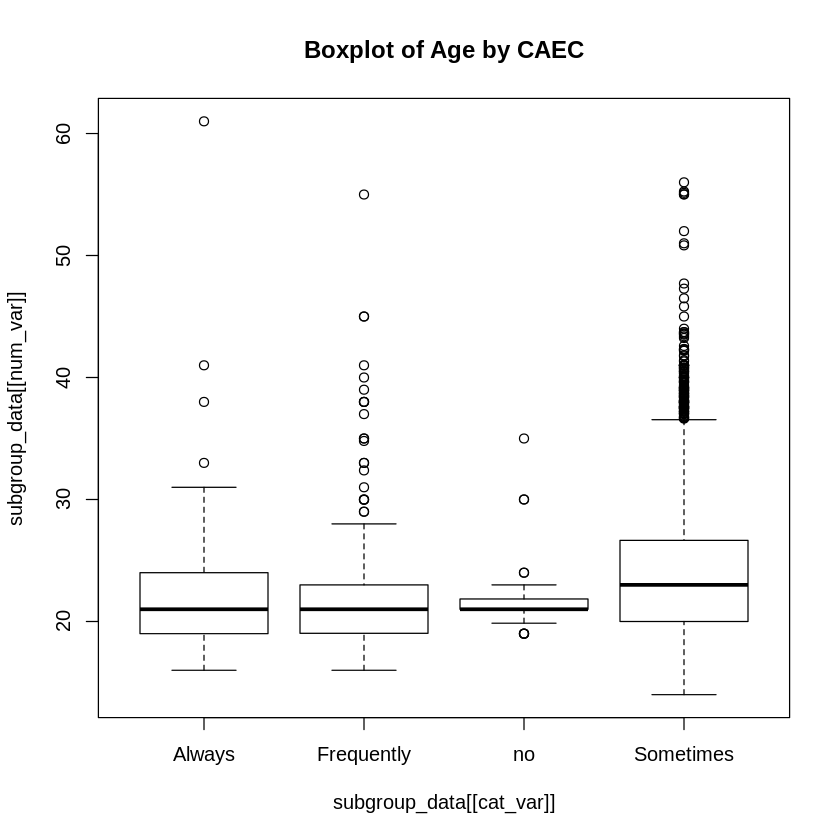


Variable: Weight 
           min      max     mean   median mode   q1.25%   q3.75%       sd
Always      45 125.0000 71.09057 66.00000   60 60.00000  80.0000 18.43487
Frequently  40 173.0000 58.88568 52.00000   42 49.15885  69.0000 16.58294
no          45 112.0000 68.90249 70.00000   70 68.06217  70.0000 10.84598
Sometimes   39 165.0573 91.36034 88.12944   80 75.00000 111.3571 25.00557
                var       cv       iqr cqd.75%
Always     339.8443 25.93152 20.000000       1
Frequently 274.9939 28.16125 19.841148       1
no         117.6353 15.74106  1.937831       1
Sometimes  625.2783 27.37026 36.357062       1


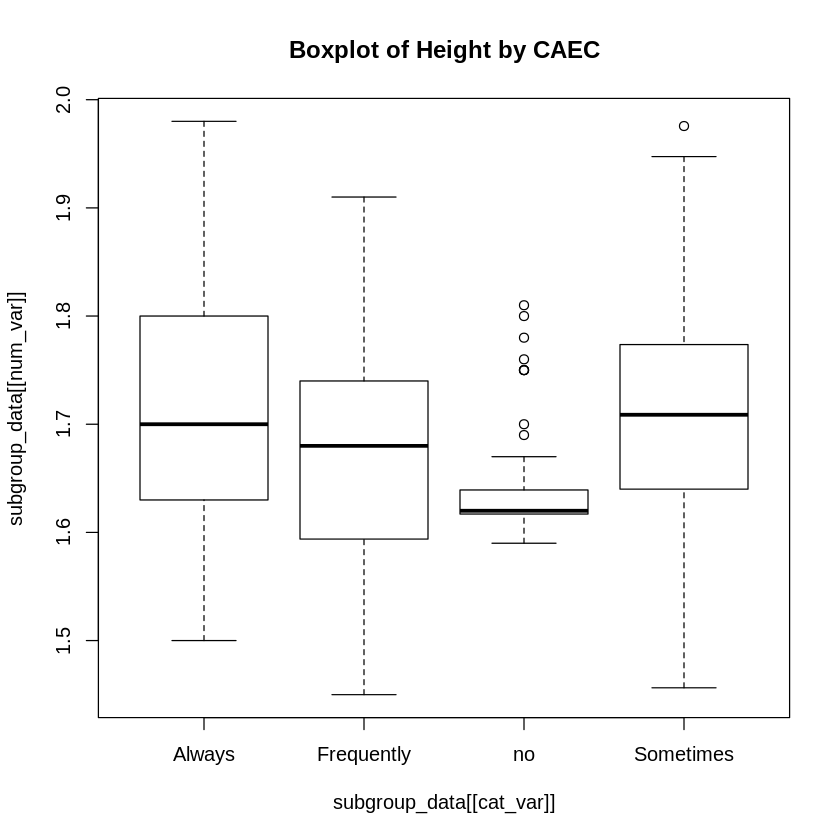


Variable: FCVC 
           min max     mean   median mode q1.25% q3.75%        sd       var
Always       1   3 2.358491 2.000000    3      2      3 0.6820315 0.4651669
Frequently   1   3 2.490528 2.855495    3      2      3 0.5940265 0.3528675
no           1   3 2.066550 2.000000    2      2      2 0.4811985 0.2315520
Sometimes    1   3 2.421245 2.374640    3      2      3 0.5177846 0.2681009
                 cv iqr cqd.75%
Always     28.91813   1       1
Frequently 23.85143   1       1
no         23.28511   0     NaN
Sometimes  21.38505   1       1


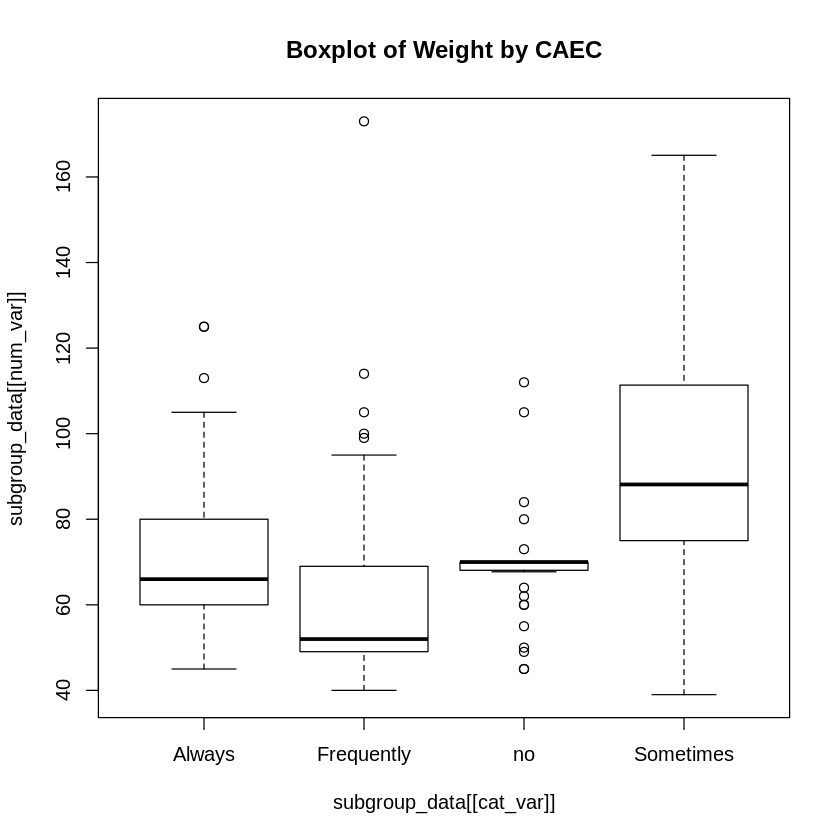


Variable: CH2O 
           min max     mean   median mode   q1.25%   q3.75%        sd       var
Always       1   3 2.018868 2.000000    2 2.000000 2.000000 0.6041703 0.3650218
Frequently   1   3 1.770691 2.000000    2 1.000000 2.000000 0.6542935 0.4280999
no           2   3 2.627299 2.943097    3 2.056443 3.000000 0.4494433 0.2019993
Sometimes    1   3 2.022330 2.000000    2 1.622440 2.490613 0.5961620 0.3554092
                 cv       iqr cqd.75%
Always     29.92619 0.0000000     NaN
Frequently 36.95131 1.0000000       1
no         17.10667 0.9435565       1
Sometimes  29.47897 0.8681730       1


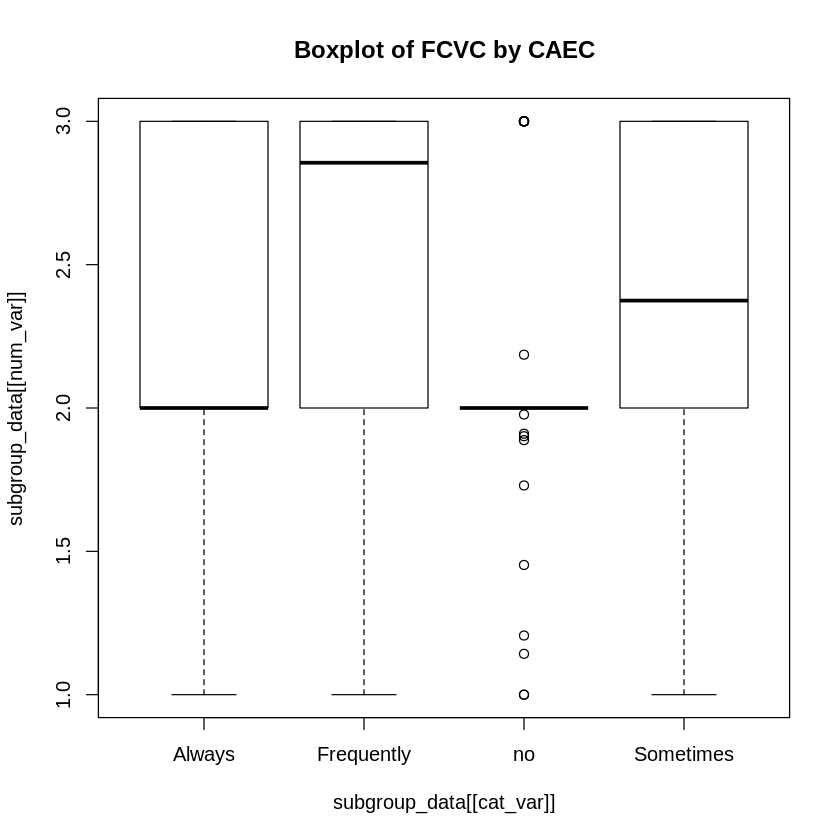


Variable: FAF 
           min max      mean median mode    q1.25%   q3.75%        sd       var
Always       0   3 1.1320755      1    0 0.0000000 2.000000 1.1441782 1.3091437
Frequently   0   3 1.0892618      1    0 0.0583015 2.000000 0.9027745 0.8150018
no           0   3 1.1416213      1    1 0.9327695 1.061965 0.6703113 0.4493172
Sometimes    0   3 0.9920195      1    0 0.1291780 1.622055 0.8370258 0.7006122
                  cv      iqr cqd.75%
Always     101.06907 2.000000       1
Frequently  82.87948 1.941698       1
no          58.71573 0.129196       1
Sometimes   84.37594 1.492877       1


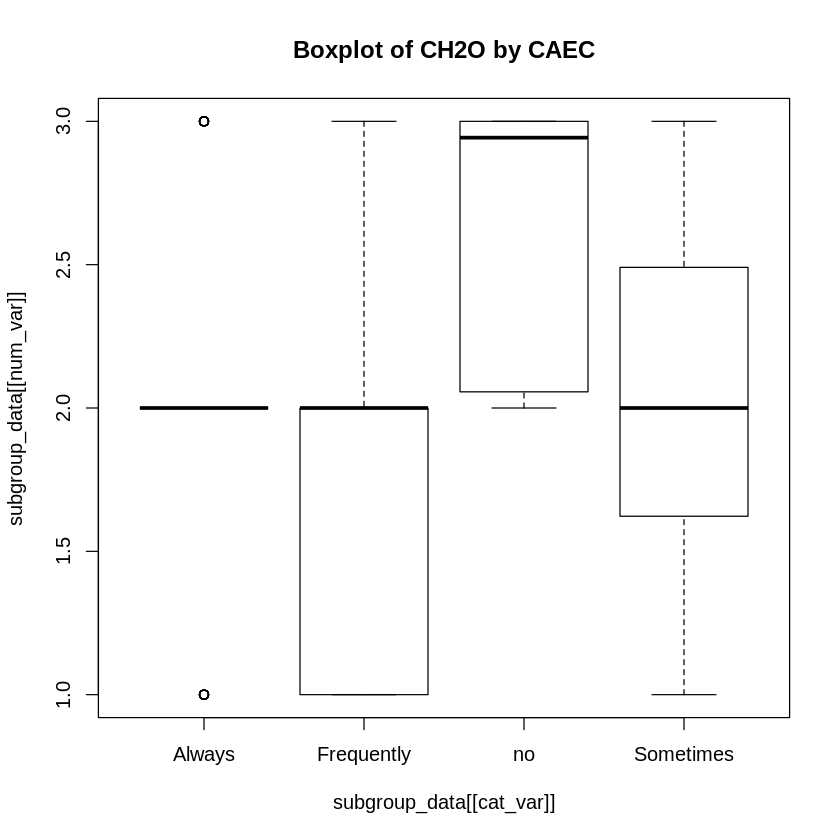


Variable: TUE 
           min      max      mean   median mode   q1.25%    q3.75%        sd
Always       0 2.000000 0.7358491 1.000000    0 0.000000 1.0000000 0.7881562
Frequently   0 2.000000 0.6541218 0.641145    0 0.000000 1.0000000 0.6671777
no           0 1.194633 0.2288991 0.000000    0 0.000000 0.3809215 0.3857311
Sometimes    0 2.000000 0.6684327 0.639561    0 0.026575 1.0000000 0.5954513
                 var        cv       iqr cqd.75%
Always     0.6211901 107.10840 1.0000000       1
Frequently 0.4451261 101.99594 1.0000000       1
no         0.1487885 168.51575 0.3809215       1
Sometimes  0.3545623  89.08172 0.9734250       1


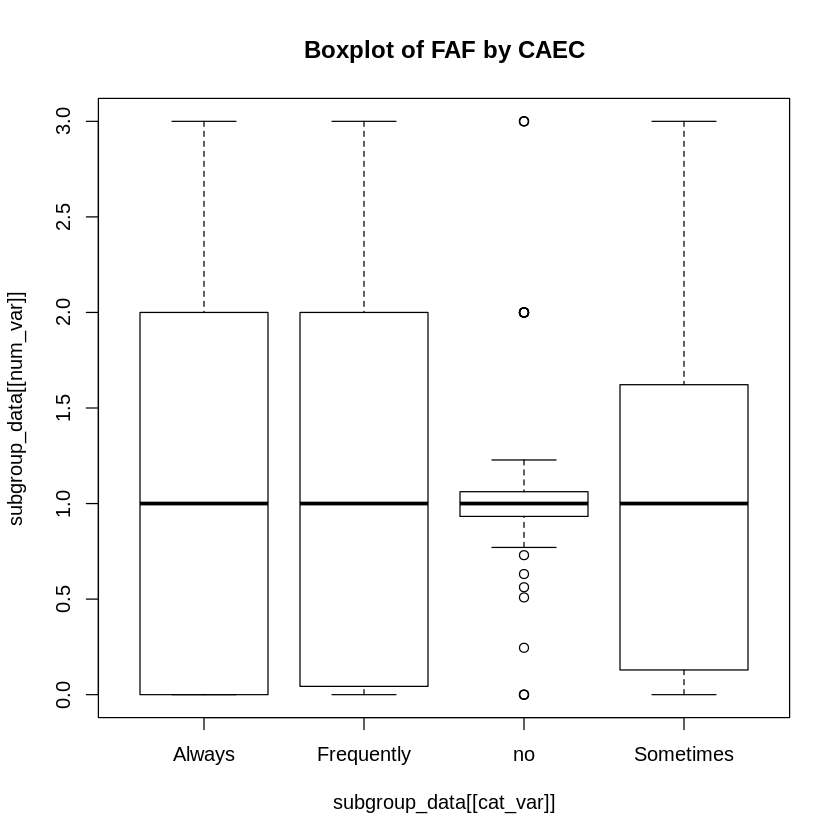



Exploratory Analysis for SMOKE 

Variable: Age 
    min max     mean   median mode   q1.25%   q3.75%       sd      var       cv
no   14  61 24.22745 22.71938   18 19.87132 26.00000 6.259133 39.17674 25.83488
yes  18  56 28.31267 26.00000   21 21.00000 31.19556 8.779344 77.07689 31.00854
          iqr cqd.75%
no   6.128681       1
yes 10.195557       1


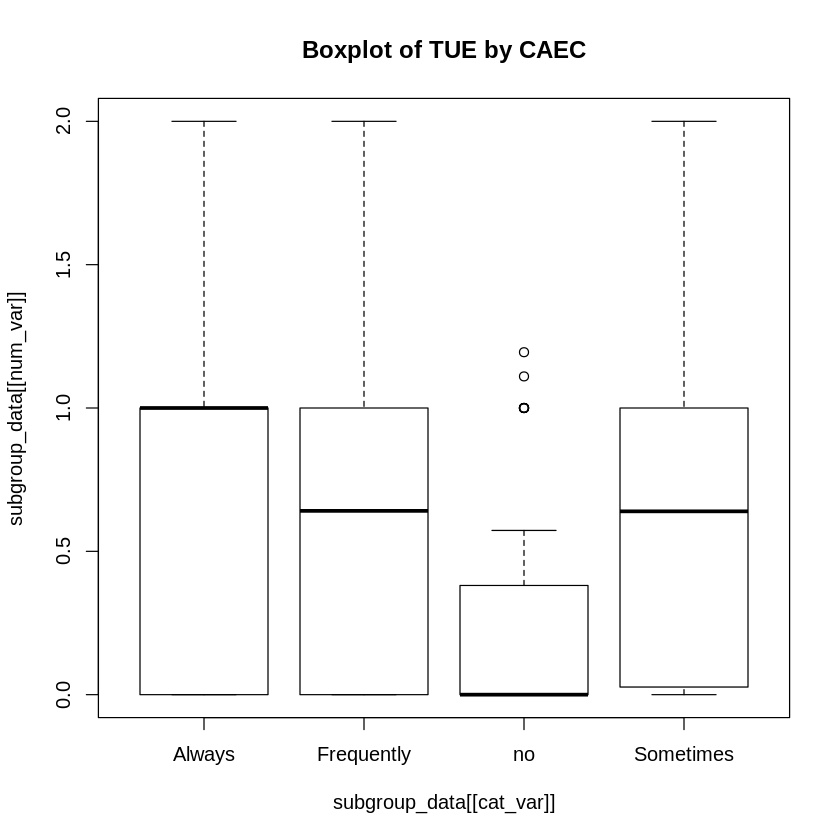


Variable: Height 
     min  max     mean   median mode   q1.25%   q3.75%         sd         var
no  1.45 1.98 1.700922 1.700164 1.70 1.629863 1.767407 0.09237173 0.008532536
yes 1.48 1.92 1.737161 1.750000 1.63 1.630000 1.852500 0.12616116 0.015916638
          cv       iqr cqd.75%
no  5.430686 0.1375435       1
yes 7.262489 0.2225000       1


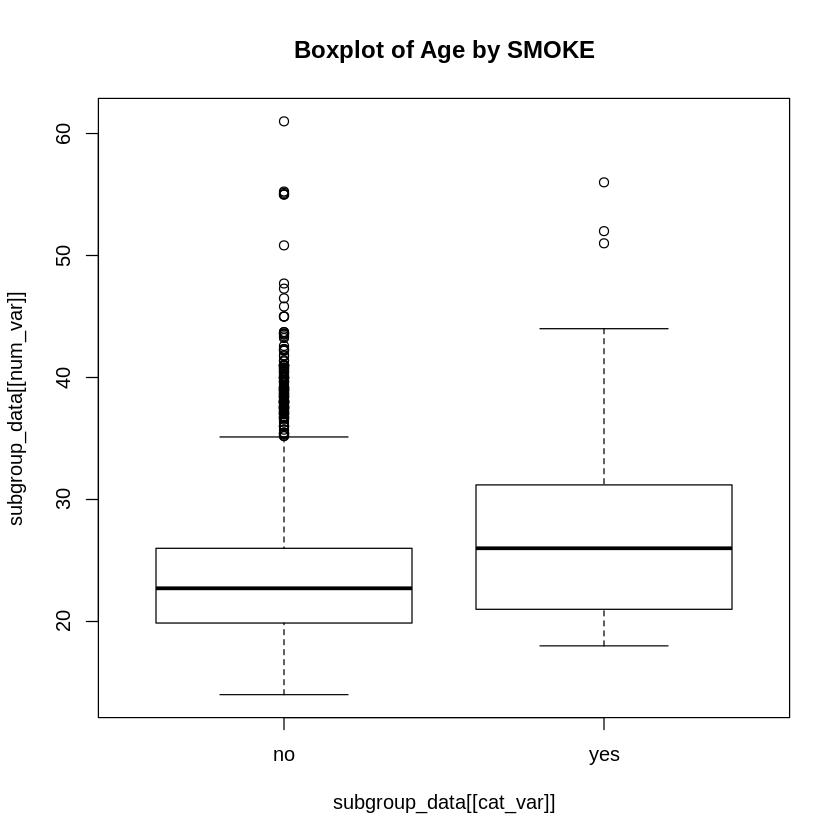


Variable: Weight 
    min max     mean median mode   q1.25%   q3.75%       sd      var       cv
no   39 173 86.48770   83.0   80 65.39394 107.0061 26.14018 683.3088 30.22415
yes  49 130 91.20681   83.5   60 66.75000 125.0677 28.42253 807.8401 31.16273
         iqr cqd.75%
no  41.61219       1
yes 58.31766       1


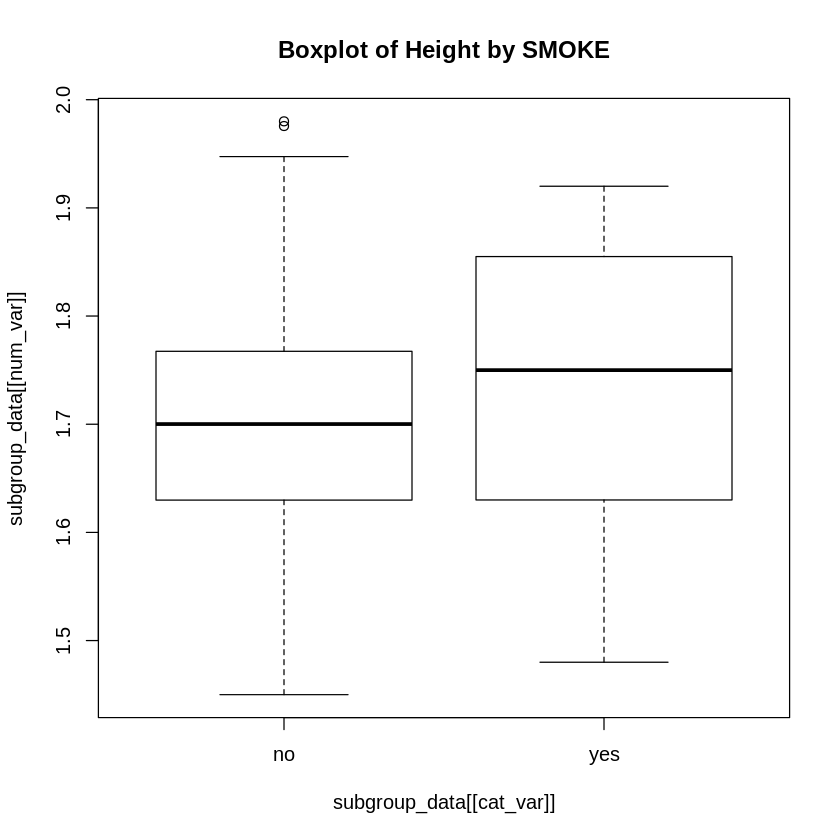


Variable: FCVC 
    min max     mean   median mode q1.25% q3.75%        sd       var       cv
no    1   3 2.417928 2.382705    3      2      3 0.5343961 0.2855792 22.10141
yes   1   3 2.471433 2.497908    2      2      3 0.5145296 0.2647407 20.81908
    iqr cqd.75%
no    1       1
yes   1       1


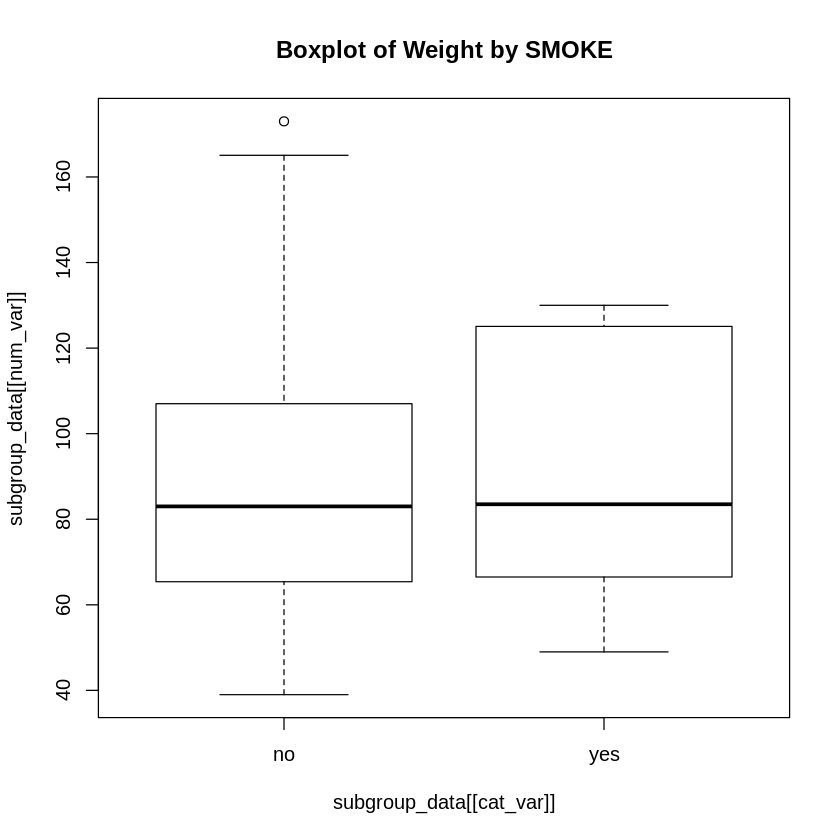


Variable: CH2O 
    min max     mean median mode   q1.25%   q3.75%        sd       var       cv
no    1   3 2.010872      2    2 1.603812 2.480416 0.6109257 0.3732302 30.38113
yes   1   3 1.873628      2    2 1.278603 2.000000 0.6962865 0.4848148 37.16246
          iqr cqd.75%
no  0.8766040       1
yes 0.7213968       1


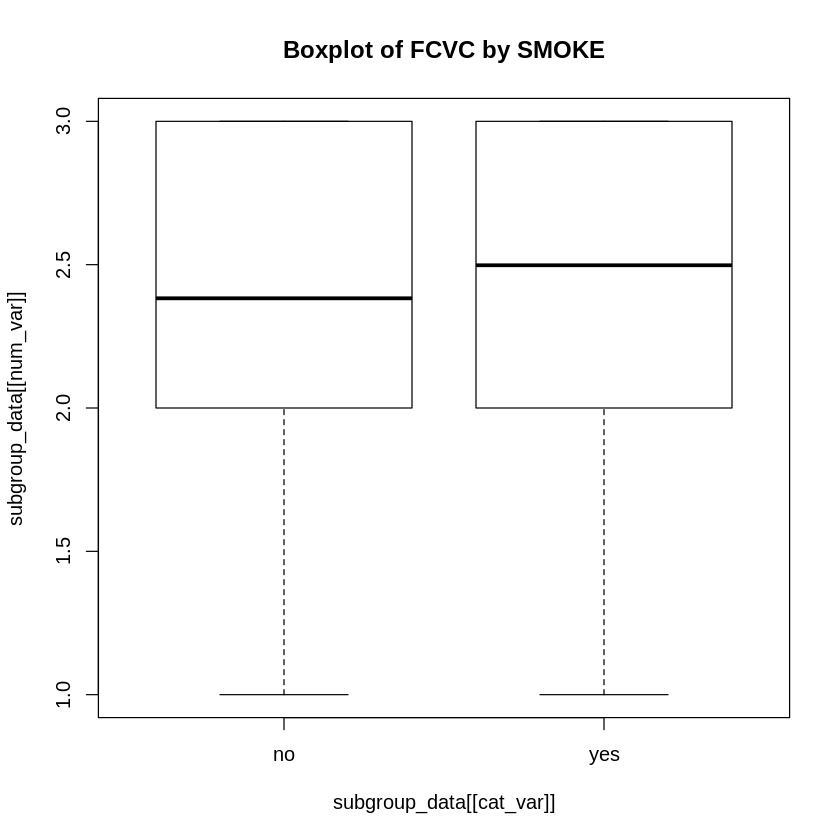


Variable: FAF 
    min max     mean median mode    q1.25%   q3.75%        sd      var       cv
no    0   3 1.008906      1    0 0.1245050 1.666678 0.8507167 0.723719 84.32071
yes   0   3 1.075671      1    0 0.6373583 1.614483 0.8518832 0.725705 79.19550
          iqr cqd.75%
no  1.5421725       1
yes 0.9771252       1


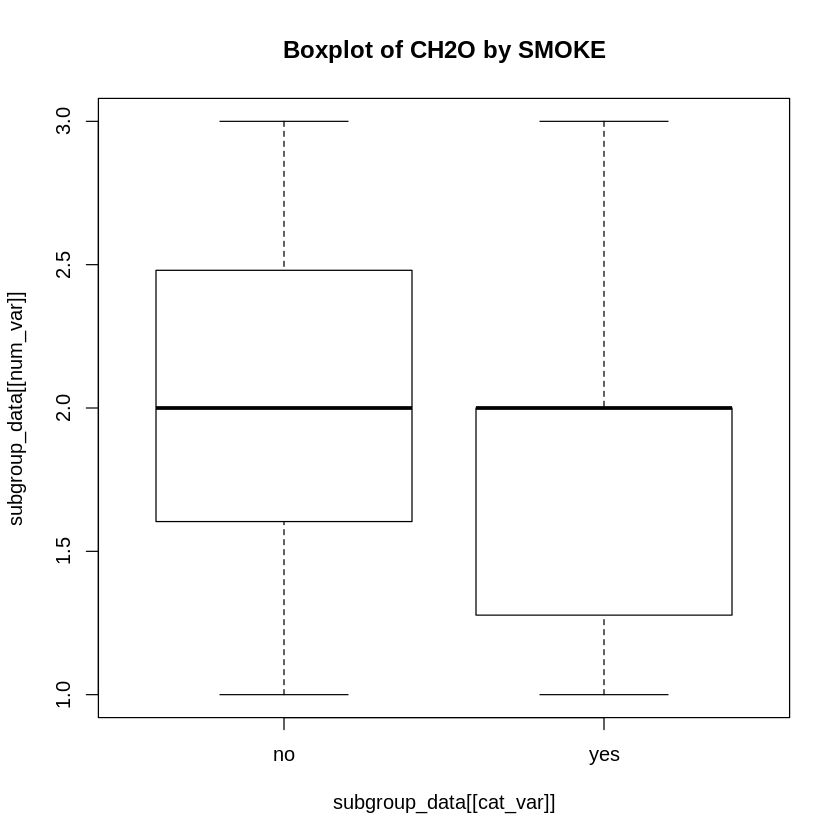


Variable: TUE 
    min max      mean    median mode q1.25%  q3.75%        sd       var
no    0   2 0.6563015 0.6253500    0      0 1.00000 0.6052343 0.3663085
yes   0   2 0.7313584 0.7227465    0      0 1.20237 0.7675979 0.5892066
           cv     iqr cqd.75%
no   92.21894 1.00000       1
yes 104.95509 1.20237       1


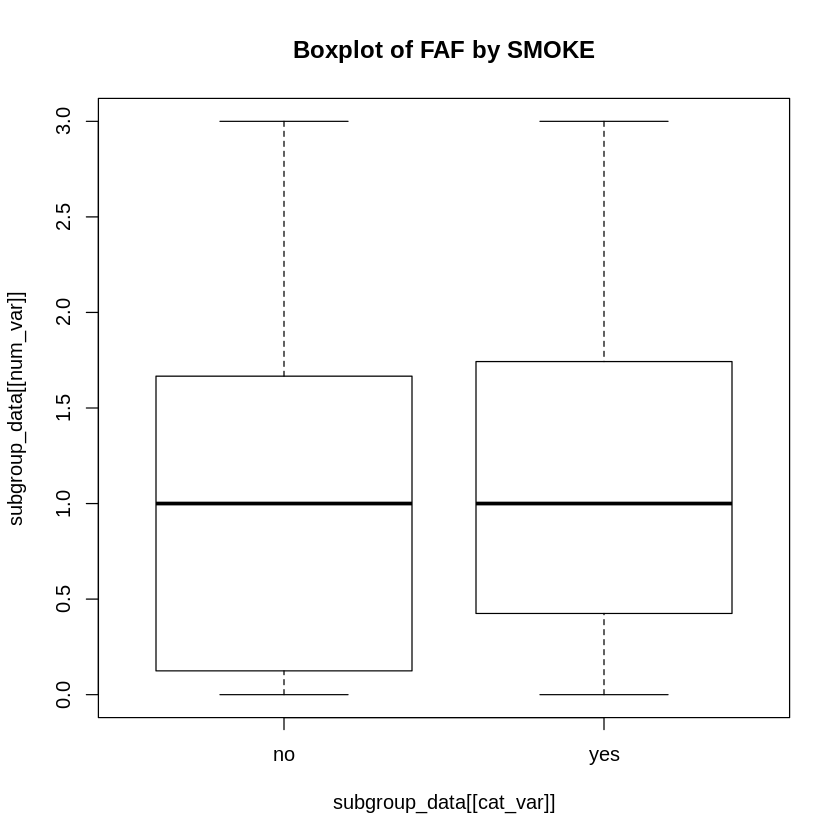



Exploratory Analysis for SCC 

Variable: Age 
         min max     mean   median mode q1.25% q3.75%       sd      var
no  14.00000  61 24.47363 22.92701   18     20     26 6.322980 39.98008
yes 16.09323  55 20.93263 19.04222   19     18     21 5.897031 34.77497
          cv iqr cqd.75%
no  25.83589   6       1
yes 28.17147   3       1


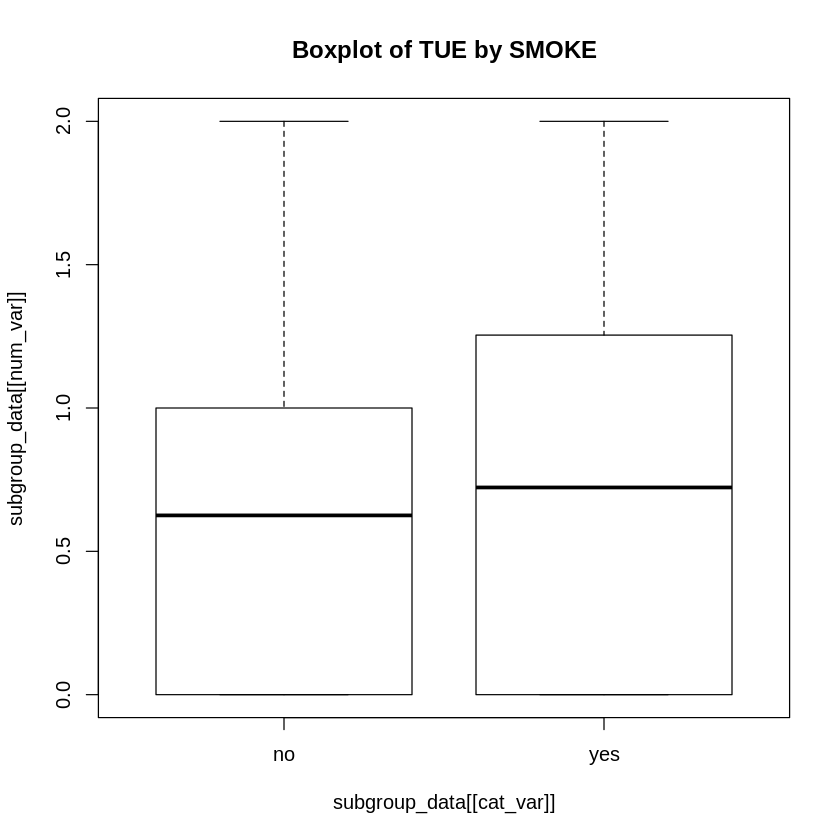


Variable: Height 
     min  max     mean   median mode   q1.25% q3.75%         sd         var
no  1.48 1.98 1.704401 1.703688  1.7 1.633583 1.7700 0.09196813 0.008458137
yes 1.45 1.90 1.644516 1.611960  1.6 1.579187 1.7125 0.10290032 0.010588476
          cv       iqr cqd.75%
no  5.395922 0.1364170       1
yes 6.257181 0.1333132       1


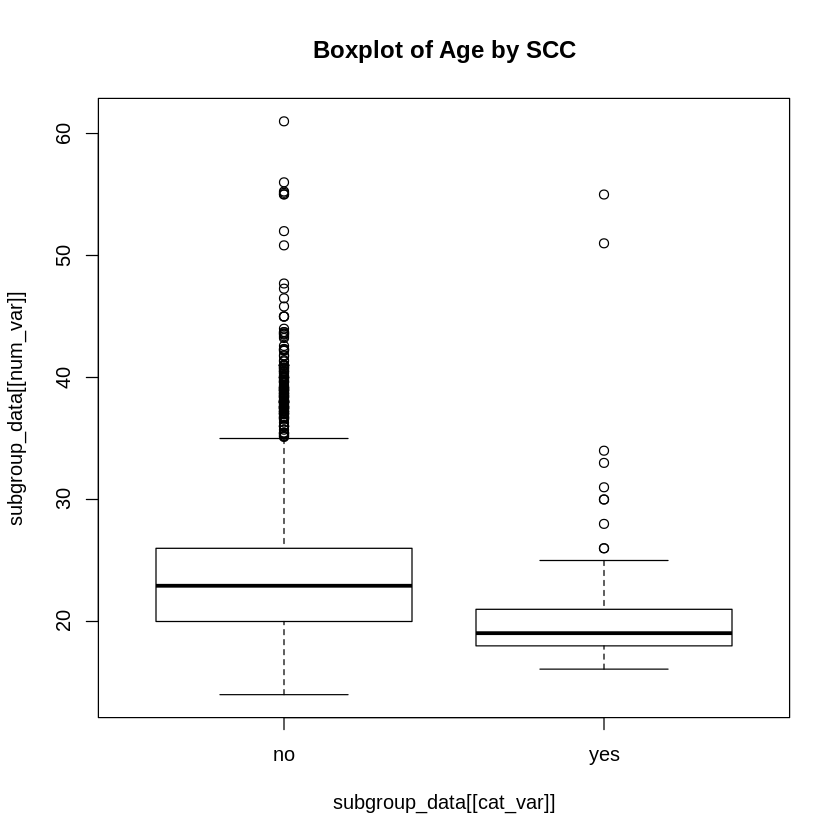


Variable: Weight 
    min max     mean   median mode   q1.25%    q3.75%       sd      var
no   39 173 87.74004 84.45142   80 68.00000 108.74675 26.07155 679.7256
yes  42 115 62.36440 62.73610   65 53.46545  67.25509 14.30483 204.6281
          cv      iqr cqd.75%
no  29.71454 40.74675       1
yes 22.93749 13.78963       1


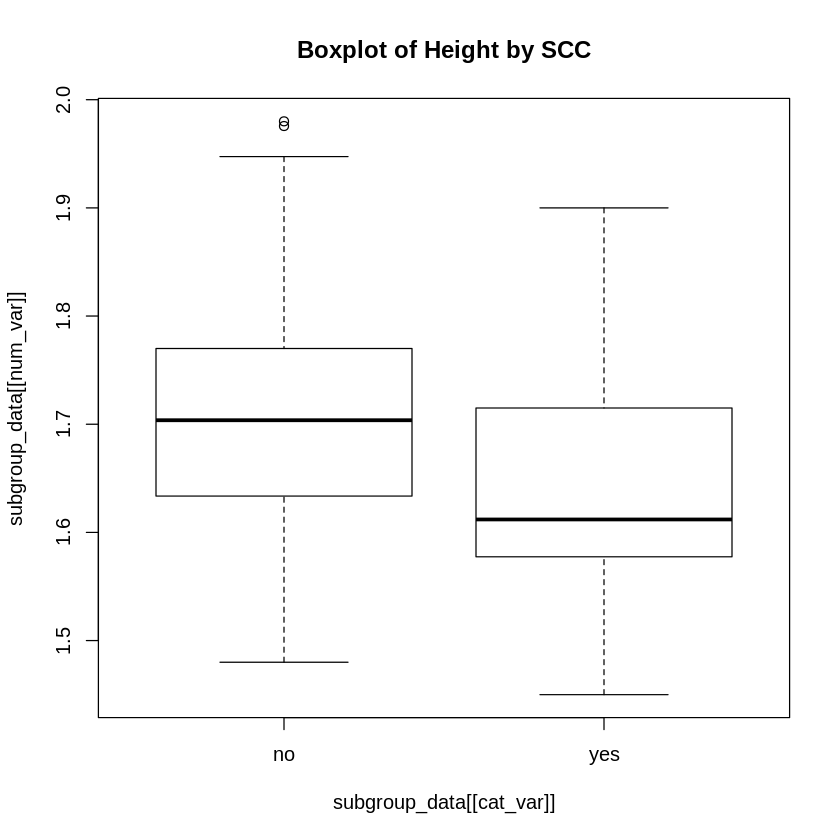


Variable: FCVC 
    min max     mean  median mode q1.25% q3.75%        sd       var       cv
no    1   3 2.410671 2.33998    3      2      3 0.5320629 0.2830909 22.07115
yes   1   3 2.594763 3.00000    3      2      3 0.5454422 0.2975072 21.02089
    iqr cqd.75%
no    1       1
yes   1       1


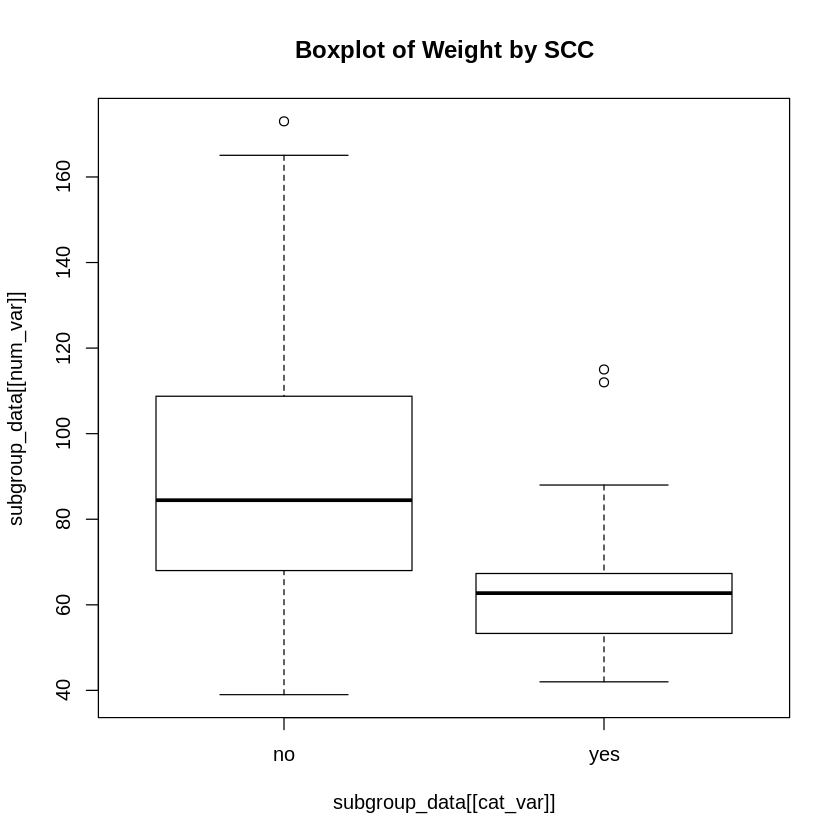


Variable: CH2O 
    min max     mean median mode   q1.25%   q3.75%        sd       var       cv
no    1   3 2.006936      2    2 1.590922 2.474325 0.6096254 0.3716431 30.37592
yes   1   3 2.030574      2    2 1.493531 2.848564 0.6821930 0.4653873 33.59606
          iqr cqd.75%
no  0.8834035       1
yes 1.3550335       1


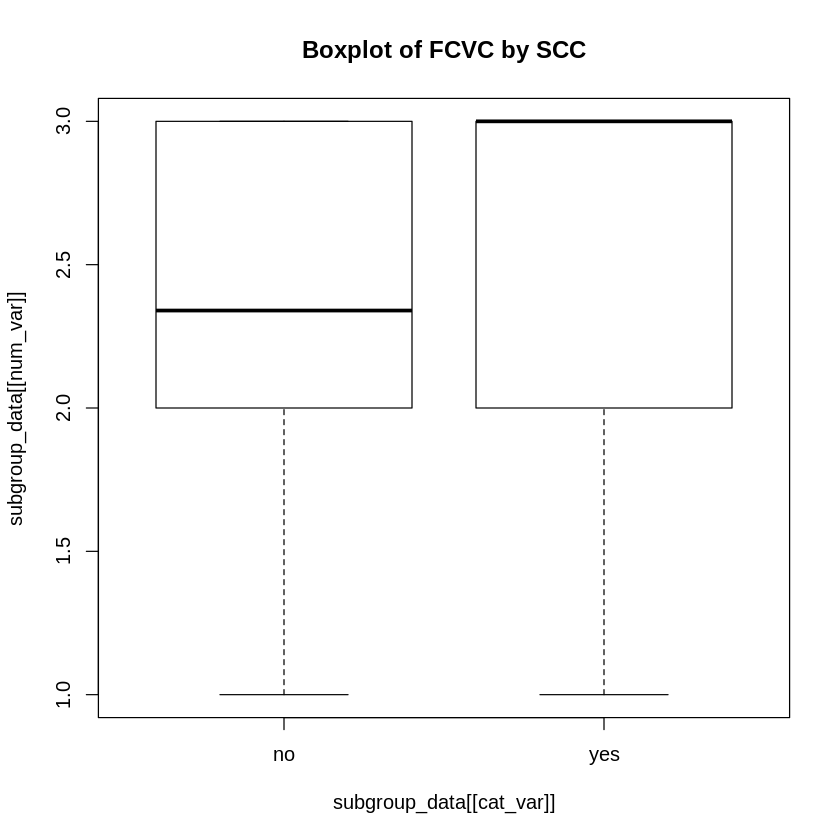


Variable: FAF 
    min max      mean median mode    q1.25%   q3.75%        sd       var
no    0   3 0.9965211      1    0 0.1124065 1.641826 0.8432004 0.7109869
yes   0   3 1.2994625      1    2 0.5456242 2.000000 0.9529099 0.9080372
          cv      iqr cqd.75%
no  84.61440 1.529419       1
yes 73.33108 1.454376       1


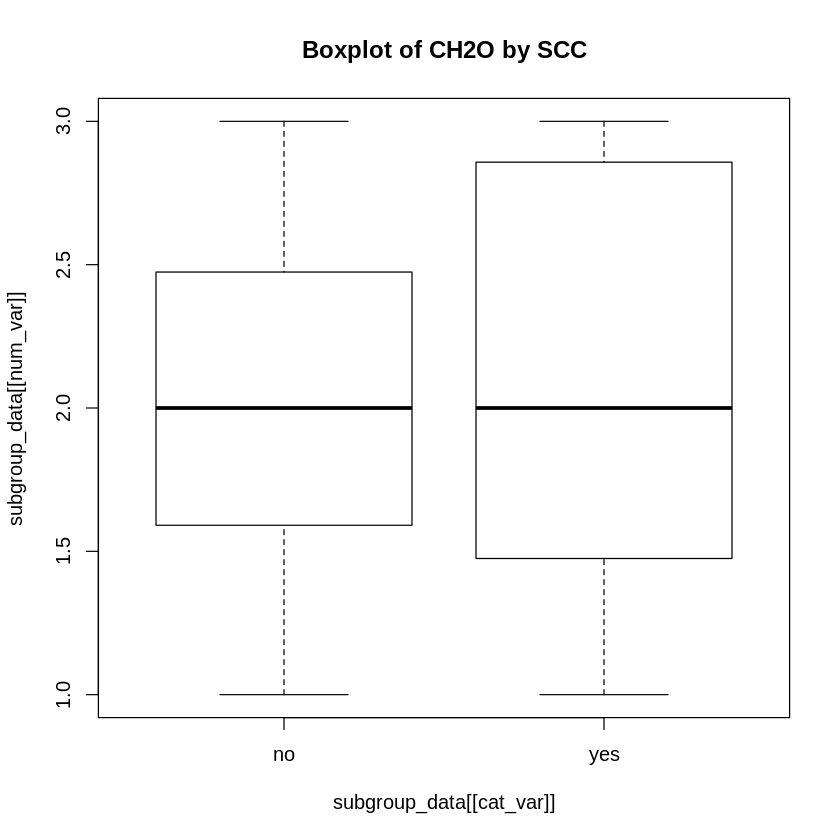


Variable: TUE 
    min max      mean   median mode q1.25%   q3.75%        sd       var
no    0   2 0.6593180 0.630866    0      0 1.000000 0.6012876 0.3615468
yes   0   2 0.6273867 0.006064    0      0 1.084137 0.7547975 0.5697193
           cv      iqr cqd.75%
no   91.19842 1.000000       1
yes 120.30818 1.084137       1


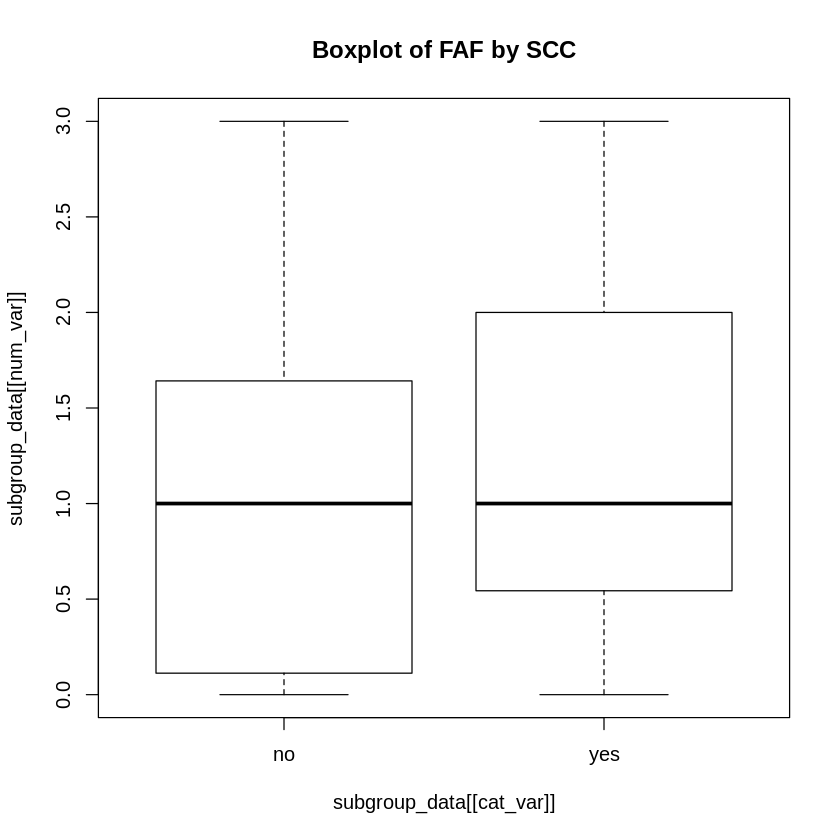



Exploratory Analysis for CALC 

Variable: Age 
           min      max     mean median mode q1.25%   q3.75%       sd      var
Always      21 21.00000 21.00000     21   21  21.00 21.00000       NA       NA
Frequently  18 61.00000 27.14119     24   23  19.25 29.75000 9.522602 90.67995
no          14 55.24625 24.13154     22   18  19.00 25.24241 7.375283 54.39479
Sometimes   16 43.72608 24.25622     23   26  20.00 26.00000 5.568742 31.01088
                 cv       iqr cqd.75%
Always           NA  0.000000     NaN
Frequently 35.08543 10.500000       1
no         30.56283  6.242415       1
Sometimes  22.95800  6.000000       1


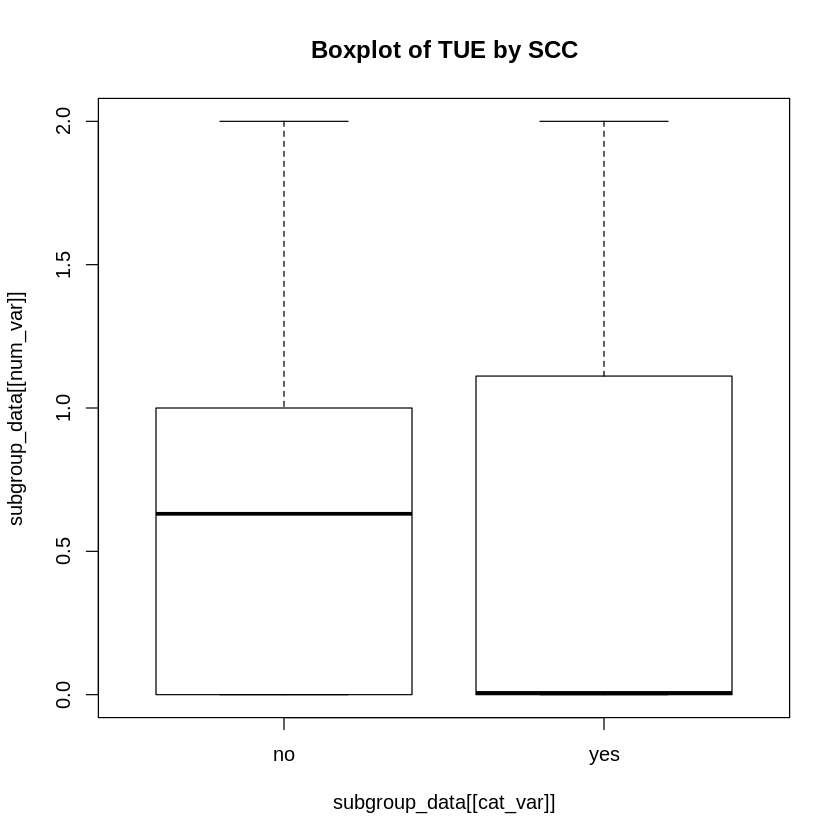


Variable: Height 
                min  max     mean  median mode   q1.25%   q3.75%         sd
Always     1.700000 1.70 1.700000 1.70000 1.70 1.700000 1.700000         NA
Frequently 1.450000 1.91 1.724605 1.74500 1.70 1.691683 1.780000 0.08400900
no         1.481682 1.90 1.683579 1.68108 1.65 1.622542 1.742694 0.08220019
Sometimes  1.456346 1.98 1.708788 1.71582 1.70 1.629727 1.780000 0.09730086
                   var       cv        iqr cqd.75%
Always              NA       NA 0.00000000     NaN
Frequently 0.007057511 4.871202 0.08831675       1
no         0.006756871 4.882466 0.12015200       1
Sometimes  0.009467457 5.694146 0.15027300       1


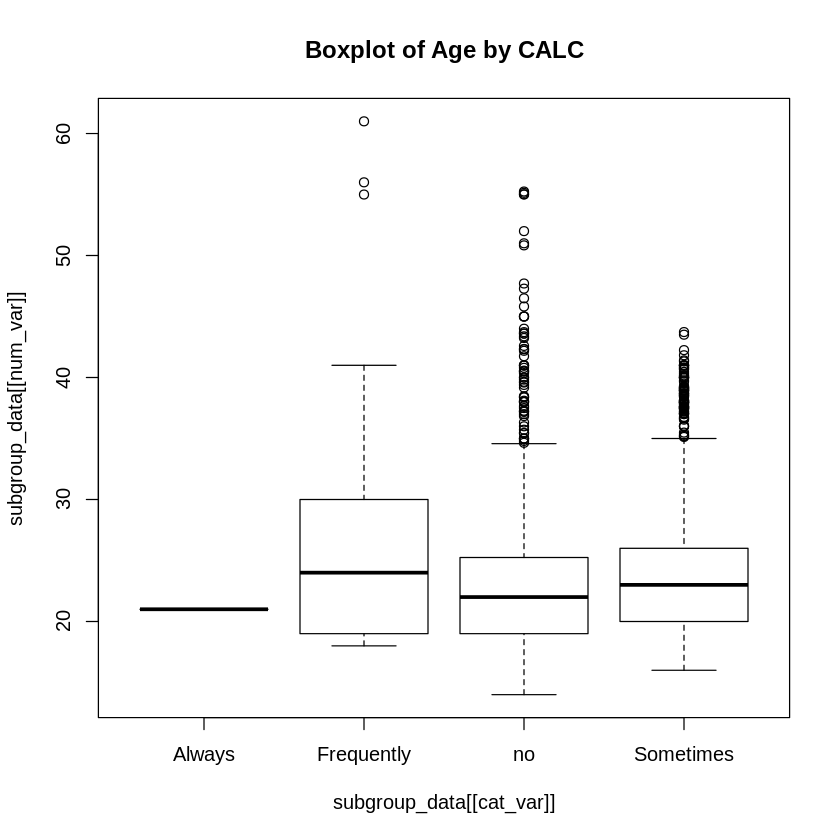


Variable: Weight 
           min max     mean   median mode   q1.25%    q3.75%       sd      var
Always      65  65 65.00000 65.00000   65 65.00000  65.00000       NA       NA
Frequently  42 113 80.67902 78.50464   78 75.85533  89.25000 14.63846 214.2844
no          40 120 76.65726 80.00000   80 59.91403  88.53662 18.74136 351.2387
Sometimes   39 173 91.42516 89.80249   70 69.90671 113.90198 28.15553 792.7341
                 cv      iqr cqd.75%
Always           NA  0.00000     NaN
Frequently 18.14407 13.39467       1
no         24.44826 28.62259       1
Sometimes  30.79626 43.99527       1


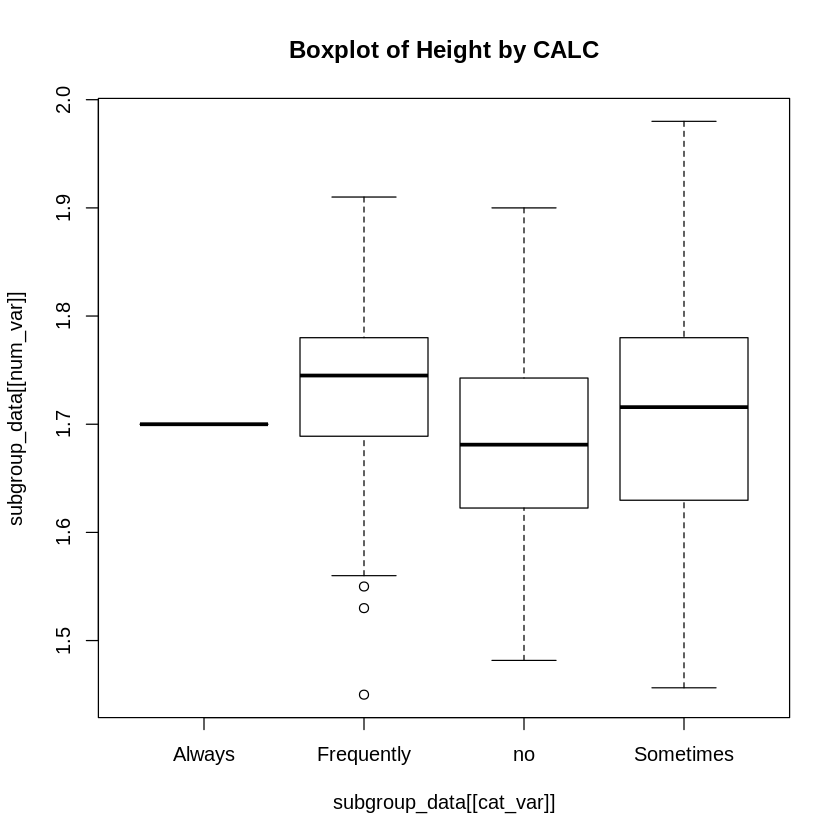


Variable: FCVC 
           min max     mean   median mode q1.25%   q3.75%        sd       var
Always       2   2 2.000000 2.000000    2      2 2.000000        NA        NA
Frequently   1   3 2.365273 2.007097    2      2 3.000000 0.5438990 0.2958261
no           1   3 2.356601 2.140840    2      2 2.882522 0.4866397 0.2368182
Sometimes    1   3 2.450509 2.530066    3      2 3.000000 0.5514624 0.3041108
                 cv       iqr cqd.75%
Always           NA 0.0000000     NaN
Frequently 22.99519 1.0000000       1
no         20.65007 0.8825225       1
Sometimes  22.50399 1.0000000       1


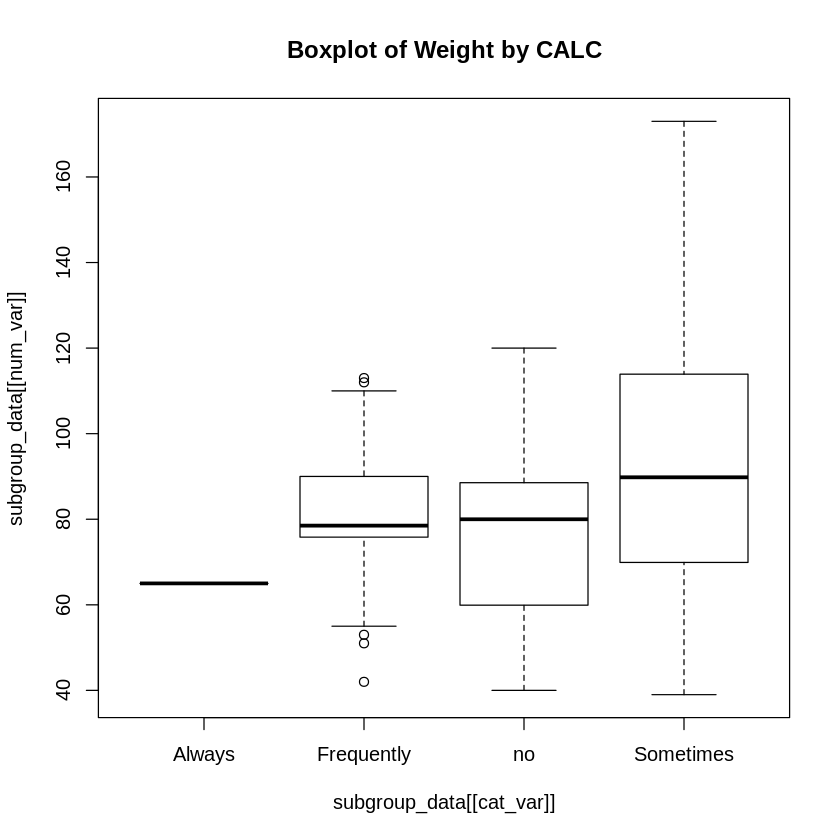


Variable: CH2O 
           min max     mean median mode   q1.25%   q3.75%        sd       var
Always       2   2 2.000000      2    2 2.000000 2.000000        NA        NA
Frequently   1   3 2.171616      2    2 2.000000 2.679060 0.5714451 0.3265495
no           1   3 1.930560      2    2 1.355182 2.292572 0.6300882 0.3970111
Sometimes    1   3 2.035168      2    2 1.622638 2.535127 0.6036715 0.3644193
                 cv       iqr cqd.75%
Always           NA 0.0000000     NaN
Frequently 26.31428 0.6790597       1
no         32.63758 0.9373900       1
Sometimes  29.66199 0.9124890       1


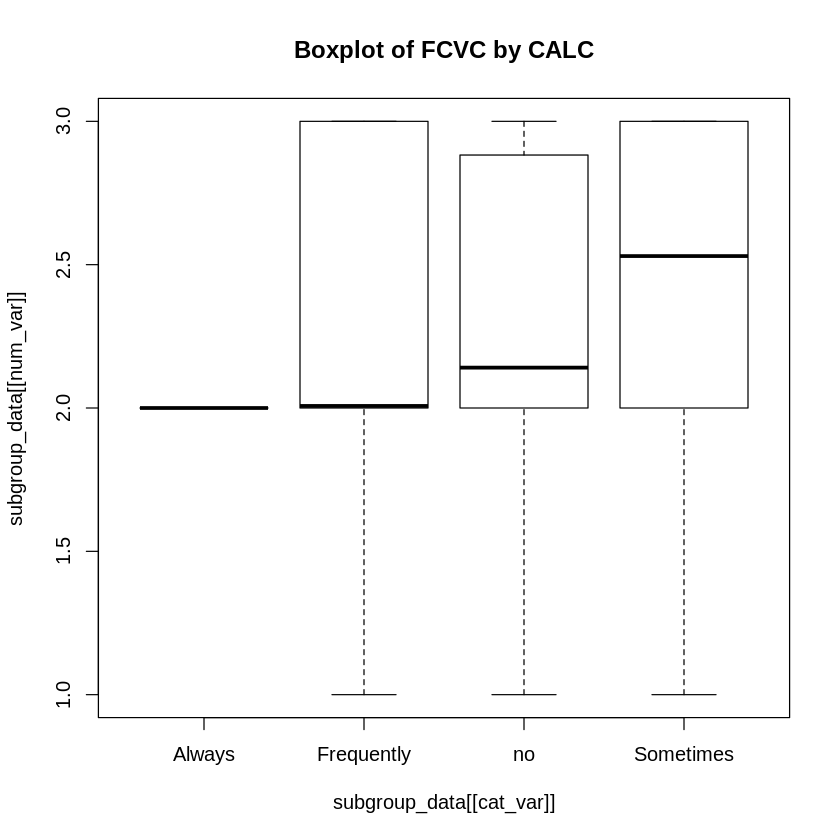


Variable: FAF 
           min max      mean   median mode    q1.25%   q3.75%        sd
Always       1   1 1.0000000 1.000000    1 1.0000000 1.000000        NA
Frequently   0   3 1.2616529 1.000000    1 0.5085920 2.000000 0.9549578
no           0   3 1.1634739 1.000000    0 0.2335215 2.000000 0.9322477
Sometimes    0   3 0.9278822 0.985287    0 0.0923440 1.502711 0.7929459
                 var       cv      iqr cqd.75%
Always            NA       NA 0.000000     NaN
Frequently 0.9119445 75.69101 1.491408       1
no         0.8690857 80.12622 1.766479       1
Sometimes  0.6287632 85.45760 1.410367       1


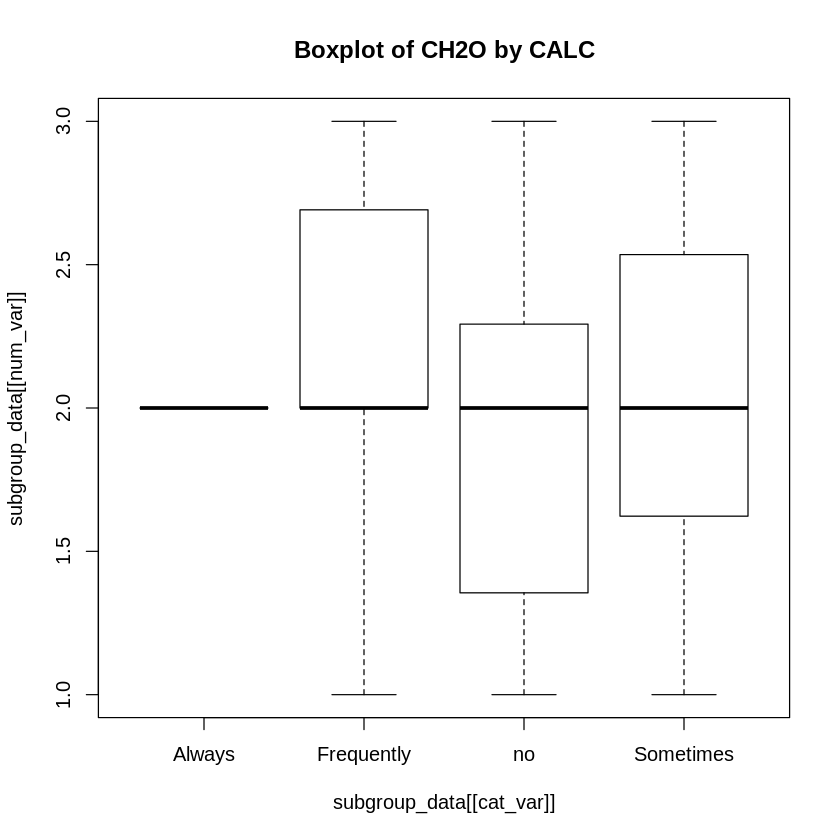


Variable: TUE 
           min max      mean   median mode     q1.25%  q3.75%        sd
Always       2   2 2.0000000 2.000000    2 2.00000000 2.00000        NA
Frequently   0   2 0.8582703 1.000000    1 0.03610275 1.00000 0.6719894
no           0   2 0.7315588 0.768071    0 0.00000000 1.20109 0.6819831
Sometimes    0   2 0.6132833 0.566353    0 0.00260000 1.00000 0.5629081
                 var       cv       iqr cqd.75%
Always            NA       NA 0.0000000     NaN
Frequently 0.4515698 78.29578 0.9638973       1
no         0.4651010 93.22328 1.2010900       1
Sometimes  0.3168655 91.78598 0.9974000       1


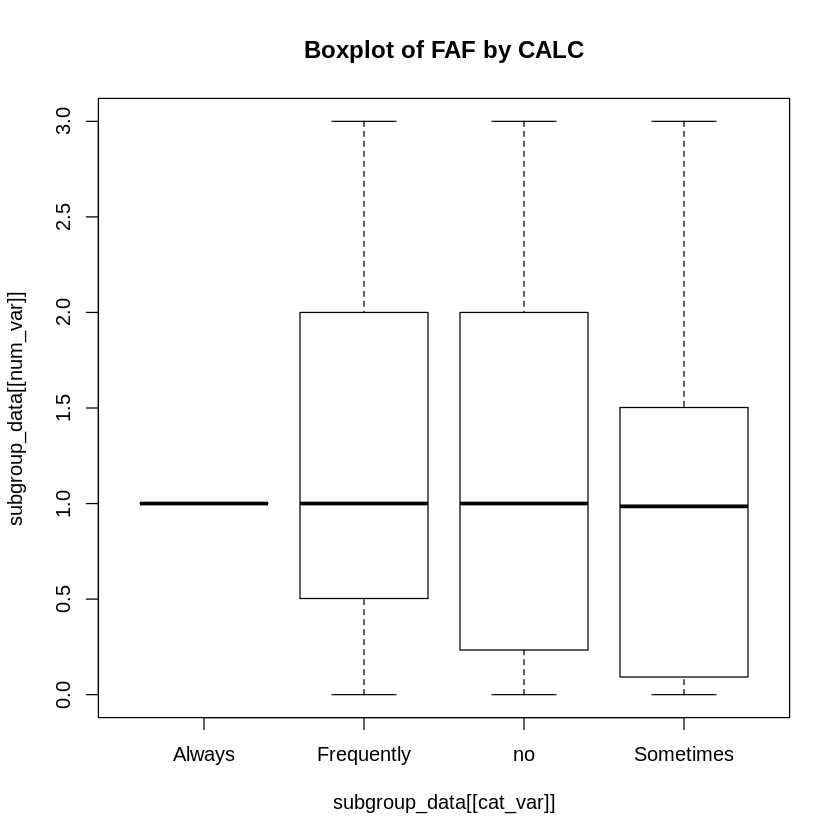



Exploratory Analysis for MTRANS 

Variable: Age 
                      min max     mean   median mode   q1.25%   q3.75%       sd
Automobile             17  56 31.61107 31.66281   18 26.82696 37.63177 7.842925
Bike                   19  41 24.71429 22.00000   19 19.00000 26.50000 8.340949
Motorbike              19  44 26.09091 24.00000   20 20.50000 27.00000 7.841614
Public_Transportation  16  61 22.27333 21.72944   18 19.47470 24.47113 3.762220
Walking                14  55 21.88883 21.00000   17 18.00000 23.25000 6.413618
                           var       cv       iqr cqd.75%
Automobile            61.51148 24.81069 10.804808       1
Bike                  69.57143 33.74950  7.500000       1
Motorbike             61.49091 30.05497  6.500000       1
Public_Transportation 14.15430 16.89114  4.996425       1
Walking               41.13450 29.30087  5.250000       1


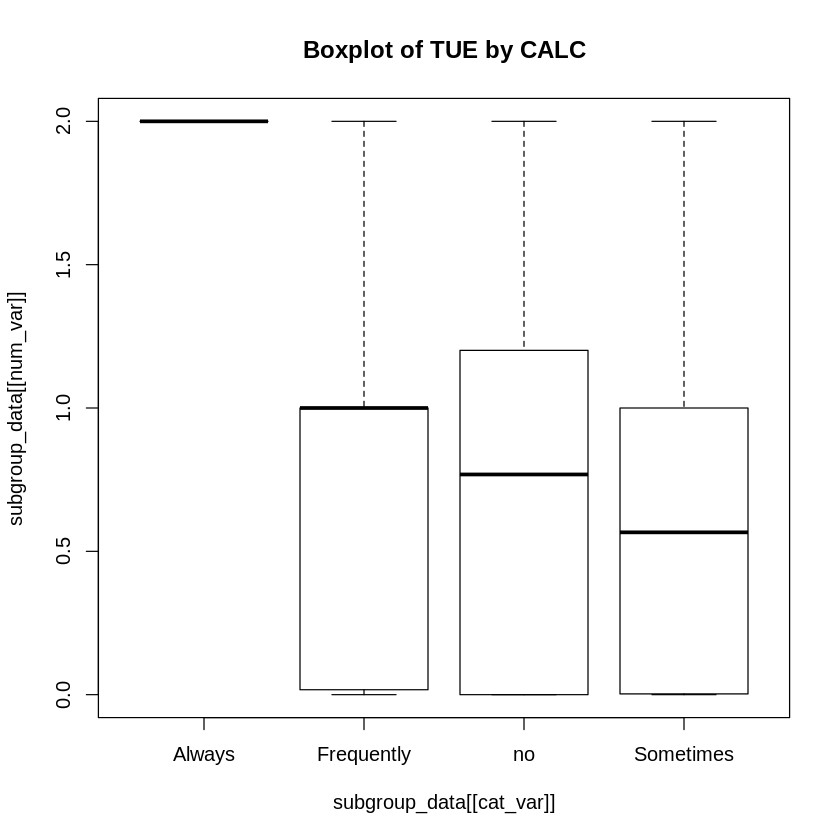


Variable: Height 
                       min      max     mean median mode   q1.25%   q3.75%
Automobile            1.50 1.903832 1.715493  1.740 1.70 1.657221 1.780725
Bike                  1.60 1.850000 1.748571  1.750 1.75 1.750000 1.770000
Motorbike             1.50 1.840000 1.688182  1.700 1.50 1.625000 1.785000
Public_Transportation 1.45 1.980000 1.696827  1.700 1.70 1.624518 1.760000
Walking               1.50 1.930000 1.722558  1.715 1.60 1.650000 1.800000
                              sd         var       cv       iqr cqd.75%
Automobile            0.09379226 0.008796989 5.467365 0.1235040       1
Bike                  0.07470577 0.005580952 4.272389 0.0200000       1
Motorbike             0.11643180 0.013556364 6.896876 0.1600000       1
Public_Transportation 0.09230102 0.008519479 5.439623 0.1354825       1
Walking               0.10182656 0.010368649 5.911358 0.1500000       1


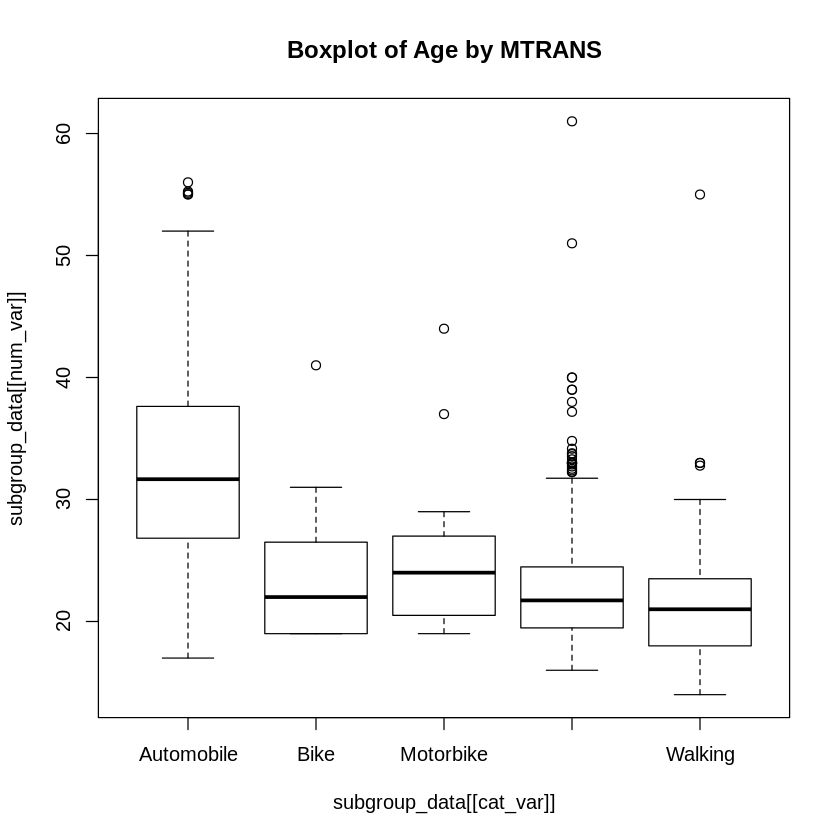


Variable: Weight 
                      min      max     mean   median mode   q1.25%   q3.75%
Automobile             44 128.8674 85.90762 81.97874   80 73.91692 101.2858
Bike                   58 118.0000 76.71429 74.00000   58 65.50000  78.0000
Motorbike              55 104.0000 73.09091 71.00000   60 62.50000  81.5000
Public_Transportation  39 173.0000 87.48671 84.76845   50 65.00000 109.9831
Walking                45 121.0000 70.59611 68.50000   60 59.75000  80.0000
                            sd      var       cv      iqr cqd.75%
Automobile            19.84456 393.8065 23.09988 27.36884       1
Bike                  19.72912 389.2381 25.71766 12.50000       1
Motorbike             14.03178 196.8909 19.19771 19.00000       1
Public_Transportation 27.92332 779.7119 31.91721 44.98308       1
Walking               15.88128 252.2151 22.49597 20.25000       1


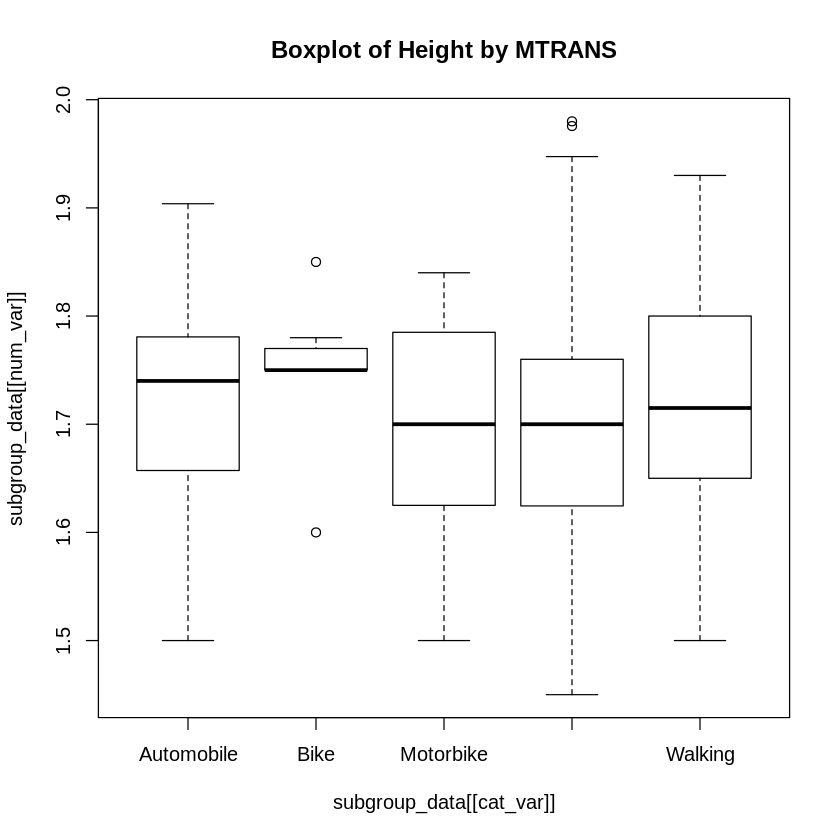


Variable: FCVC 
                      min max     mean   median mode q1.25%   q3.75%        sd
Automobile              1   3 2.357046 2.262292    2      2 2.845961 0.4700029
Bike                    1   3 2.142857 2.000000    2      2 2.500000 0.6900656
Motorbike               1   3 2.363636 2.000000    2      2 3.000000 0.6741999
Public_Transportation   1   3 2.436981 2.495321    3      2 3.000000 0.5481870
Walking                 1   3 2.464286 2.000000    2      2 3.000000 0.5381546
                            var       cv      iqr cqd.75%
Automobile            0.2209028 19.94033 0.845961       1
Bike                  0.4761905 32.20306 0.500000       1
Motorbike             0.4545455 28.52384 1.000000       1
Public_Transportation 0.3005090 22.49451 1.000000       1
Walking               0.2896104 21.83816 1.000000       1


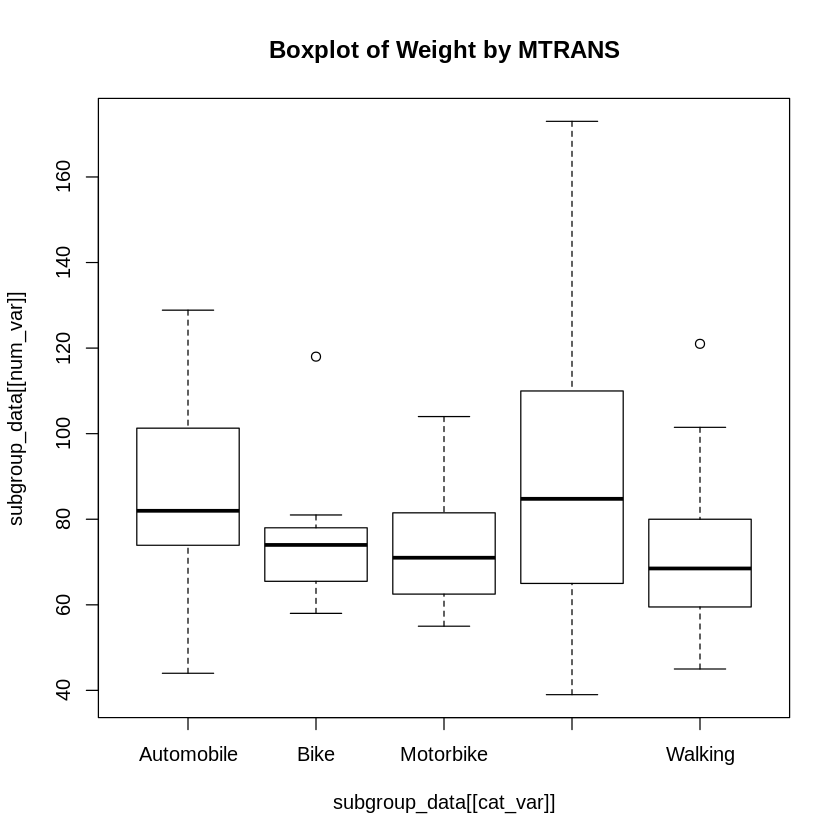


Variable: CH2O 
                      min max     mean median mode   q1.25%   q3.75%        sd
Automobile              1   3 1.954108      2    2 1.603549 2.224164 0.5748723
Bike                    2   3 2.285714      2    2 2.000000 2.500000 0.4879500
Motorbike               1   3 2.000000      2    1 1.000000 3.000000 0.8944272
Public_Transportation   1   3 2.021335      2    2 1.566373 2.531588 0.6187267
Walking                 1   3 2.038851      2    2 2.000000 2.381724 0.6868415
                            var       cv      iqr cqd.75%
Automobile            0.3304782 29.41866 0.620615       1
Bike                  0.2380952 21.34781 0.500000       1
Motorbike             0.8000000 44.72136 2.000000       1
Public_Transportation 0.3828227 30.60980 0.965215       1
Walking               0.4717513 33.68768 0.381724       1


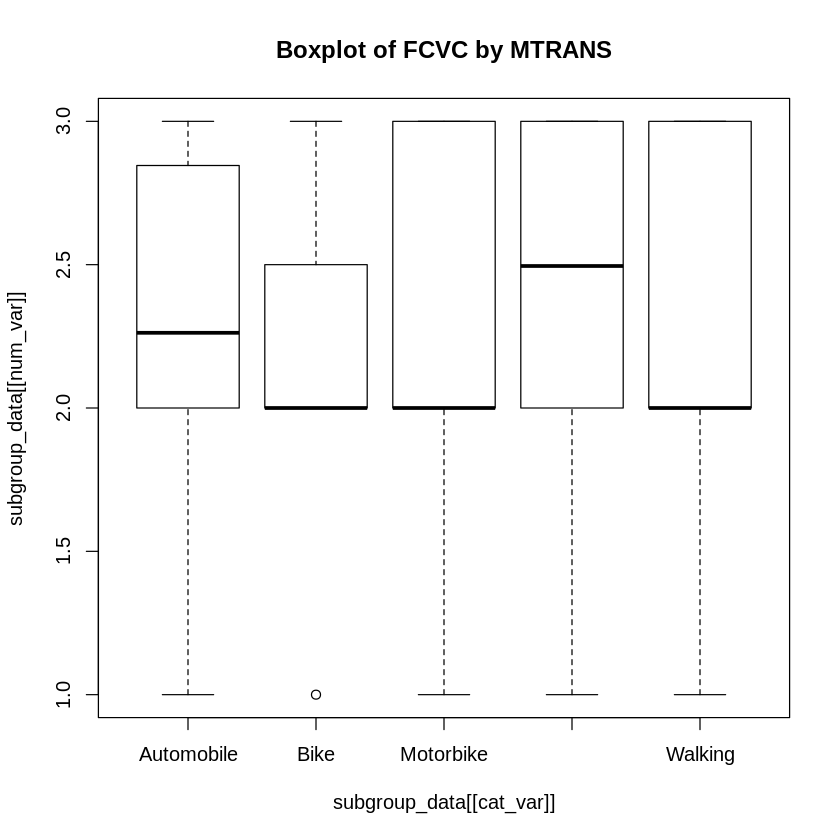


Variable: FAF 
                      min max      mean   median mode   q1.25%   q3.75%
Automobile              0   3 1.0140944 0.935217    0 0.054238 1.903338
Bike                    0   3 2.0000000 2.000000    3 1.500000 3.000000
Motorbike               0   3 0.8181818 0.000000    0 0.000000 1.500000
Public_Transportation   0   3 0.9862641 1.000000    0 0.132076 1.582490
Walking                 0   3 1.5714286 2.000000    1 1.000000 2.250000
                             sd       var        cv      iqr cqd.75%
Automobile            0.8868069 0.7864264  87.44816 1.849100       1
Bike                  1.1547005 1.3333333  57.73503 1.500000       1
Motorbike             1.2504545 1.5636364 152.83332 1.500000       1
Public_Transportation 0.8173333 0.6680338  82.87165 1.450414       1
Walking               1.0763092 1.1584416  68.49241 1.250000       1


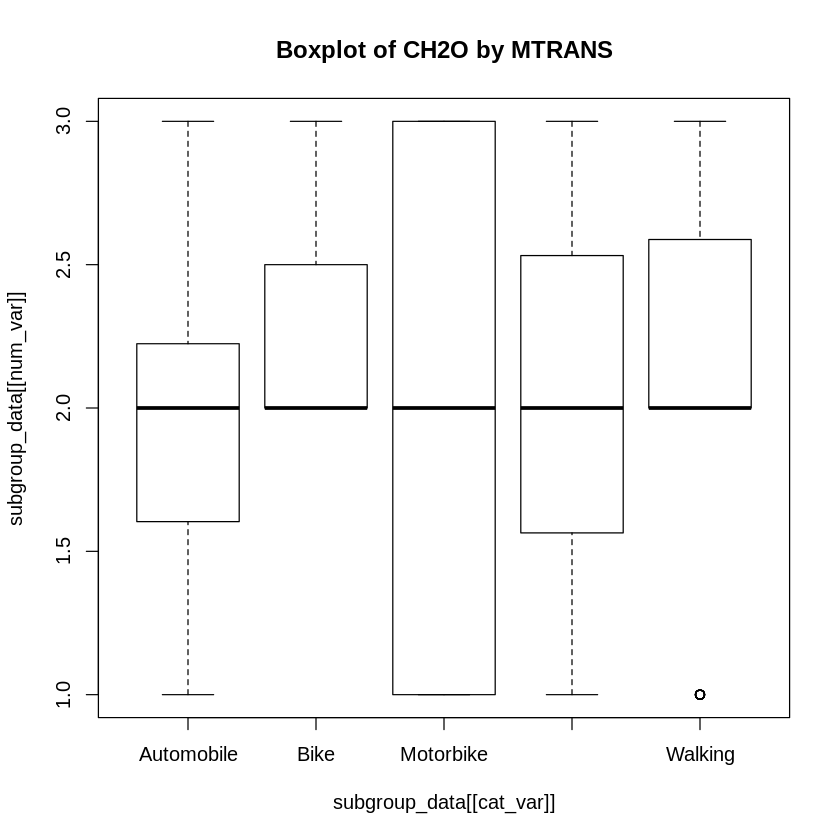


Variable: TUE 
                      min max       mean    median mode    q1.25%   q3.75%
Automobile              0   2 0.46663893 0.1535590    0 0.0000000 0.947866
Bike                    0   2 0.42857143 0.0000000    0 0.0000000 0.500000
Motorbike               0   1 0.09090909 0.0000000    0 0.0000000 0.000000
Public_Transportation   0   2 0.70854492 0.7095495    0 0.1007815 1.000000
Walking                 0   2 0.92857143 1.0000000    0 0.0000000 2.000000
                             sd        var        cv       iqr cqd.75%
Automobile            0.5728184 0.32812095 122.75410 0.9478660       1
Bike                  0.7867958 0.61904762 183.58568 0.5000000       1
Motorbike             0.3015113 0.09090909 331.66248 0.0000000     NaN
Public_Transportation 0.5963973 0.35568971  84.17212 0.8992185       1
Walking               0.8280787 0.68571429  89.17770 2.0000000       1


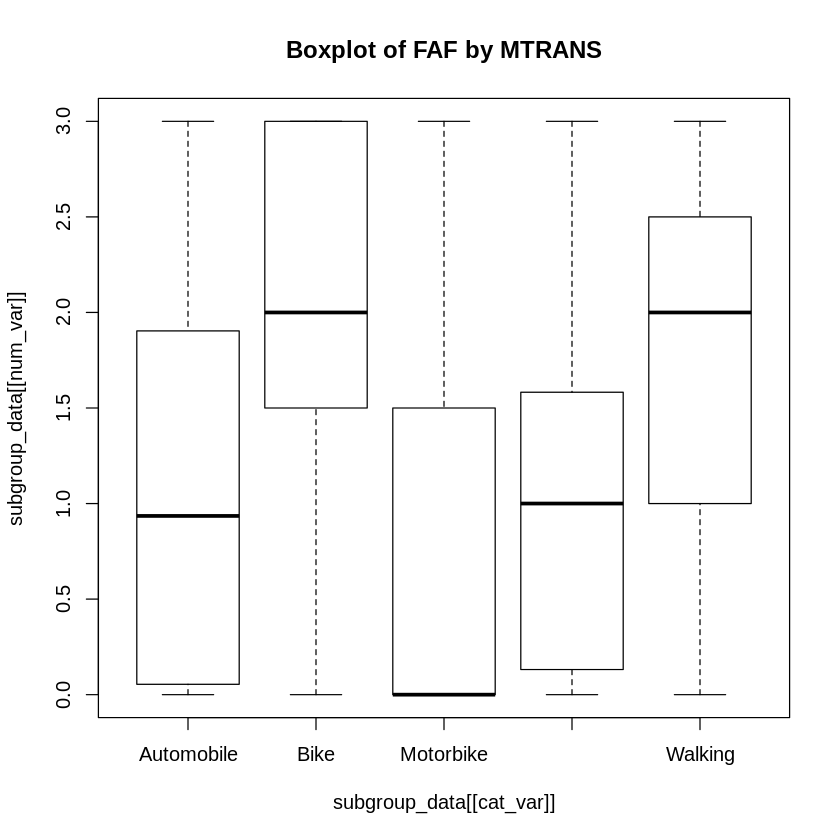

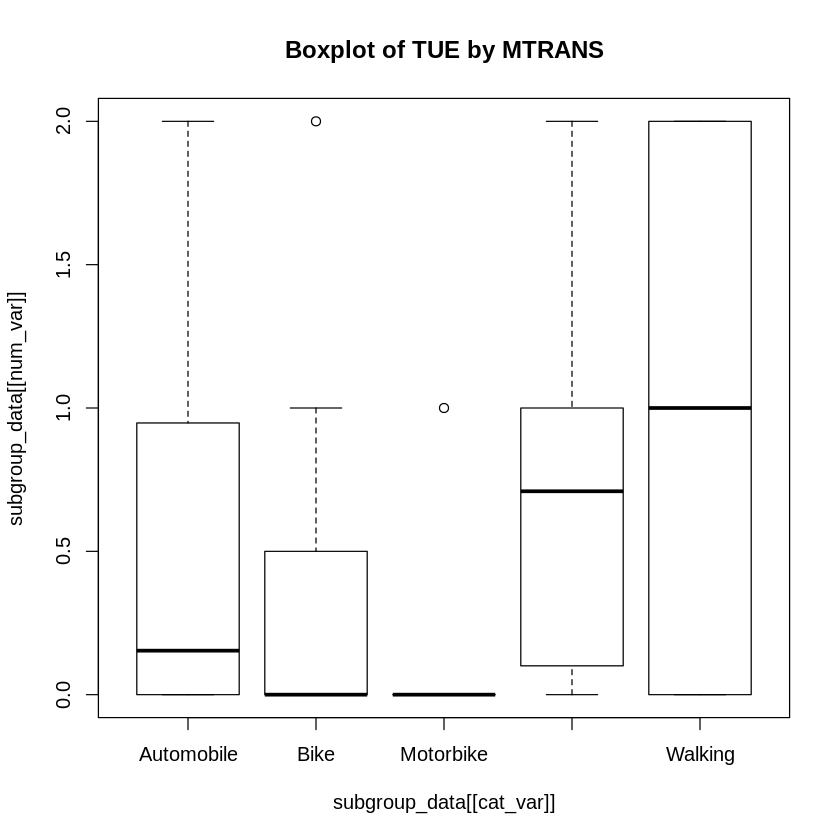

In [139]:
# Extract categorical and numerical variables
cat_data <- c("Gender", "family_history_with_overweight", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS")
num_data <- c("Age", "Height", "Weight", "FCVC", "CH2O", "FAF", "TUE")


# Loop over each categorical variable
for (cat_var in cat_data){

  # Print the categorical variable name
  cat("\n\nExploratory Analysis for", cat_var, "\n")

  # Loop over each numerical variable
  for(num_var in num_data){

    # Extract data for the current subgroup
    subgroup_data <- df[, c(cat_var, num_var), drop = FALSE]

    # Print variable name
    cat("\nVariable:", num_var, "\n")

    # Calculate summary statistics
    summary_stats <- tapply(subgroup_data[[num_var]], subgroup_data[[cat_var]], function(x) {
      c(
        min = min(x, na.rm = TRUE),
        max = max(x, na.rm = TRUE),
        mean = mean(x, na.rm = TRUE),
        median = median(x, na.rm = TRUE),
        mode = as.numeric(names(sort(table(x), decreasing = TRUE)[1])),
        q1 = quantile(x, 0.25, na.rm = TRUE),
        q3 = quantile(x, 0.75, na.rm = TRUE),
        sd = sd(x, na.rm = TRUE),
        var = var(x, na.rm = TRUE),
        cv = sd(x, na.rm = TRUE) / mean(x, na.rm = TRUE) * 100,
        iqr = IQR(x, na.rm = TRUE),
        cqd = IQR(x, na.rm = TRUE) / (quantile(x, 0.75, na.rm = TRUE) - quantile(x, 0.25, na.rm = TRUE))
      )
    })

    # Convert the result to a data frame
    summary_stats_df <- as.data.frame(do.call(rbind, summary_stats))

    # Print the summary statistics
    print(summary_stats_df)

    # Create box plots for each subgroup
    boxplot(subgroup_data[[num_var]] ~ subgroup_data[[cat_var]], main = paste("Boxplot of", num_var, "by", cat_var), col = rainbow(length(levels(subgroup_data[[cat_var]]))))

  }
}

# 8. Draw Scatter Diagram
- Draw a scatter diagram between (i) age and weight, (ii) age and height and (iii) height and
weight. Draw respective regression lines on the atterplots. Also, draw scatterplot matrix of all the numerical variables. Comment on your results.

### Scatter Plot with regression line.

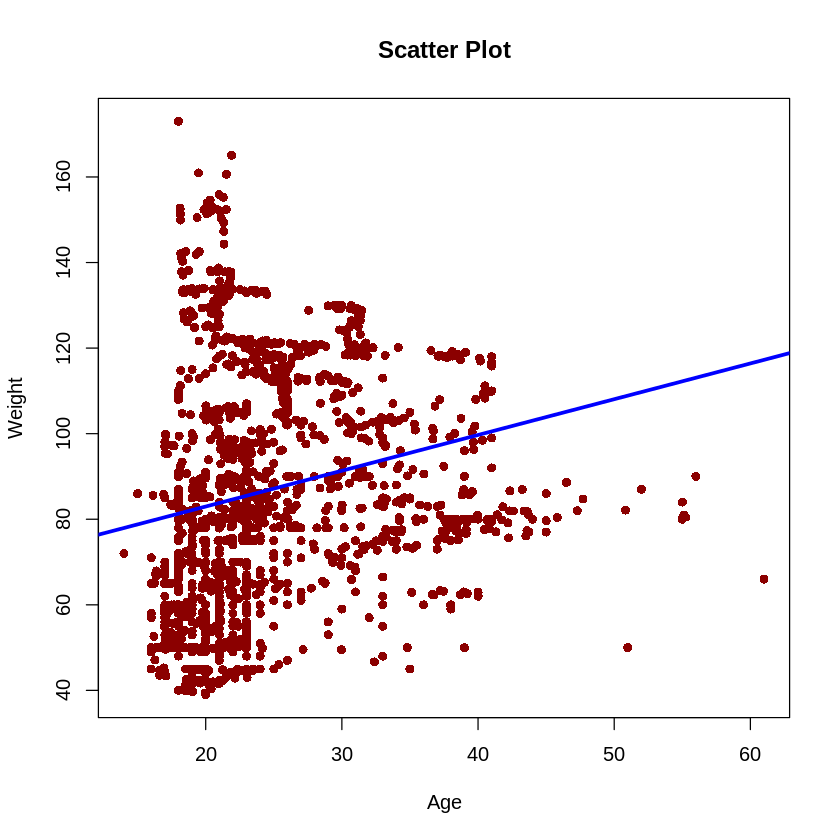

In [140]:
# (i) Draw a scatter plot between age and weight and regression line

plot(df$Age, df$Weight, main="Scatter Plot", xlab="Age", ylab = "Weight", col="darkred", pch = 16)
reg_age_weight <- lm(Weight ~ Age, data = df)
abline(reg_age_weight, col = "blue", lw=3)

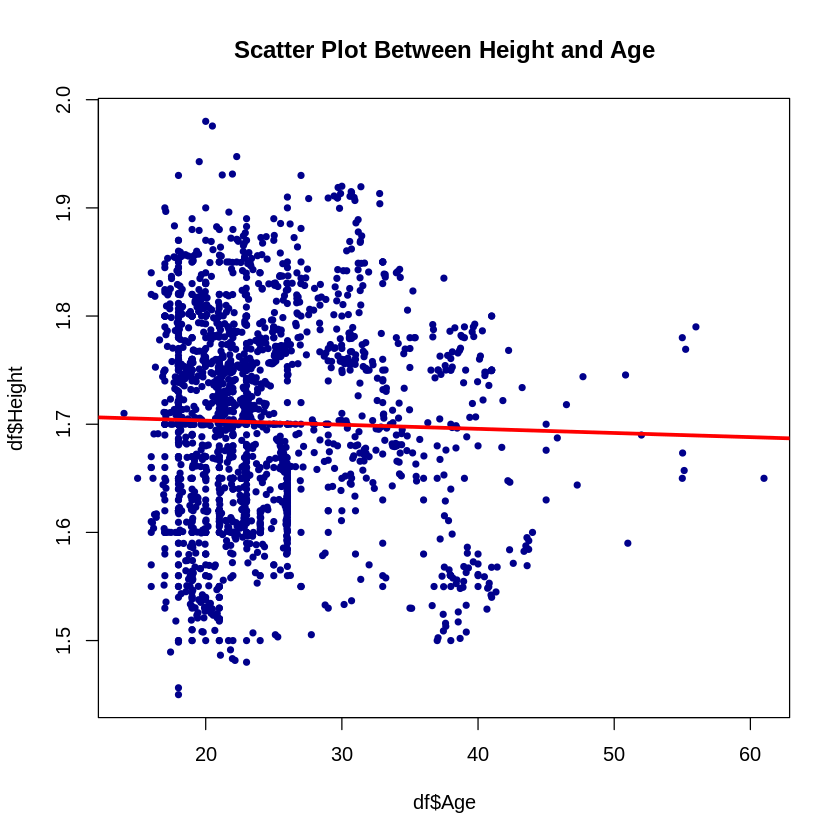

In [141]:
# (ii) Draw a scatter plot between age and height with regression line

plot(df$Age, df$Height, main="Scatter Plot Between Height and Age", col = "darkblue", pch=20)
reg_age_height <- lm(Height ~ Age, data = df)
abline(reg_age_height, col="red", lw=3)

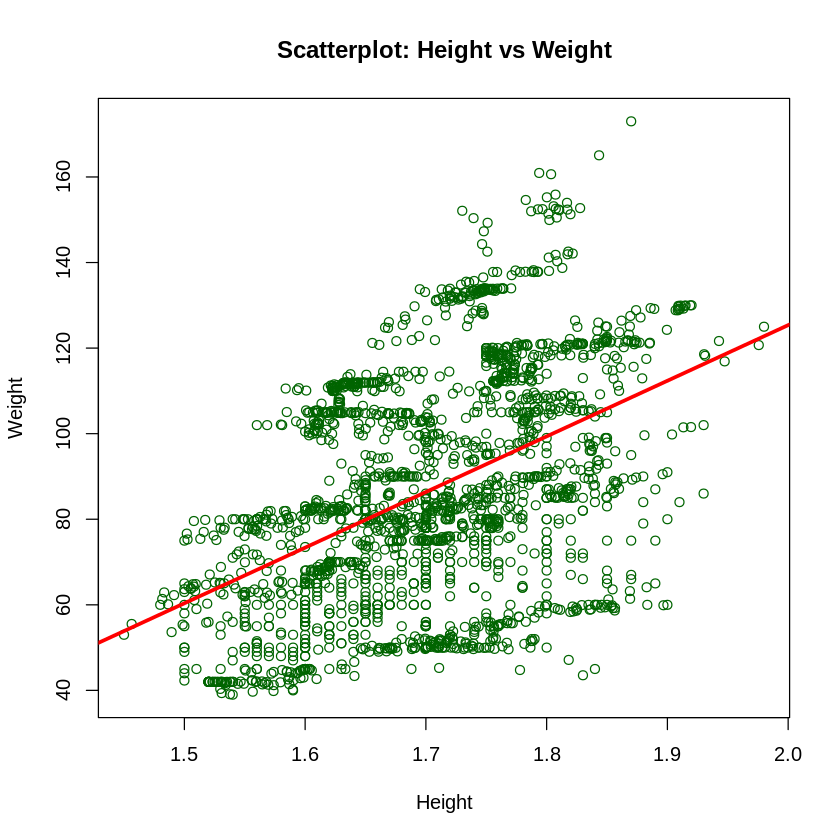

In [142]:
# Scatter diagram and regression line for Height and Weight
plot(df$Height, df$Weight, main = "Scatterplot: Height vs Weight", xlab = "Height", ylab = "Weight", col="darkgreen")
abline(lm(Weight ~ Height, data = df), col = "red", lwd=3)

### Scatter Plot Matrix
- To use scatter plot matrix first need to install psych library then use paris.panels()

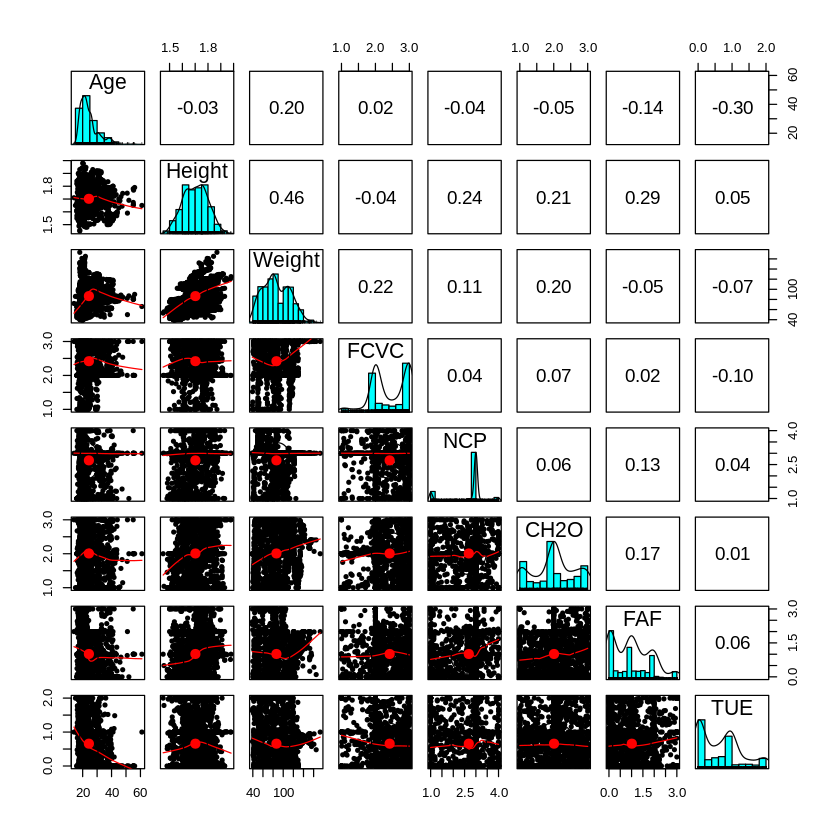

In [143]:
# Another Way:
if (!requireNamespace("psych", quietly = TRUE)) {
  install.packages("psych")
}
library(psych)

pairs.panels(num)

**Comment:** <br/>
1. Correlation between Weight and Height: The scatter matrix indicates a correlation between Weight and Height, with a correlation coefficient of 0.46. This positive correlation suggests that as Height increases, there tends to be an associated increase in Weight.

2. Correlation Across All Numerical Variables Upon further examination of the scatter matrix, it becomes evident that there is no significant correlation among all the numerical variables. The absence of clear patterns in the scatter plots suggests a lack of linear relationships between the variables.

# 9. Recode the varialbe MTRANS and FCVC
- Recode the variable MTRANS into MTRANS_RC in which both the ‘Walking’ and ‘Bike’ categories will be ‘Ownself’ and all other categories will be ‘Car’. Also, convert the variable FCVC to a factor (name as FCVC_factor) by labeling 1 as ‘Never’, 2 as ‘Sometimes’ and 3 as ‘Always’.


In [144]:
# Recode the the Variable MTRANS

df$MTRANS_RC[df$MTRANS == "Walking" | df$MTRANS == "Bike"] = "Ownself"
# df$MTRANS_RC[!df$MTRANS == "Walking" & !df$MTRANS == "Bike"] = "Car"

df$MTRANS_RC[is.na(df$MTRANS)] <- "Car"
unique(df$MTRANS_RC)

[1] NA        "Ownself"

In [145]:
# Convert FCVC to a factor with labeled levels
df$FCVC_factor1 <- factor(df$FCVC, levels = 1:3, labels = c("Never", "Sometimes", "Always"))
unique(df$FCVC_factor1 )

[1] Sometimes Always    Never     <NA>     
Levels: Never Sometimes Always

In [146]:
# Recode FCVS variable
df$FCVC <- round(df$FCVC) # Round this number

df$FCVC_factor[df$FCVC == 1] = "Never"
df$FCVC_factor[df$FCVC == 2] = "Sometimes"
df$FCVC_factor[df$FCVC == 3] = "Always"

unique(df$FCVC_factor)

[1] Sometimes Always    Never    
Levels: Never Sometimes Always

In [147]:
head(df)

Gender Age Height Weight family_history_with_overweight FAVC FCVC NCP
1 Female 21  1.62   64.0   yes                            no   2    3  
2 Female 21  1.52   56.0   yes                            no   3    3  
3 Male   23  1.80   77.0   yes                            no   2    3  
4 Male   27  1.80   87.0   no                             no   3    3  
5 Male   22  1.78   89.8   no                             no   2    1  
6 Male   29  1.62   53.0   no                             yes  2    3  
  CAEC      SMOKE CH2O SCC FAF TUE CALC       MTRANS                MTRANS_RC
1 Sometimes no    2    no  0   1   no         Public_Transportation NA       
2 Sometimes yes   3    yes 3   0   Sometimes  Public_Transportation NA       
3 Sometimes no    2    no  2   1   Frequently Public_Transportation NA       
4 Sometimes no    2    no  2   0   Frequently Walking               Ownself  
5 Sometimes no    2    no  0   0   Sometimes  Public_Transportation NA       
6 Sometimes no    2    no  0   0   Sometimes  Automobile            NA       
  FCVC_factor1 FCVC_factor
1 Sometimes    Sometimes  
2 Always       Always     
3 Sometimes    Sometimes  
4 Always       Always     
5 Sometimes    Sometimes  
6 Sometimes    Sometimes

# 10. Calculate BMI and also create a BMI Factorial Value.
- Calculate body mass index (BMI) by using the formula, $BMI = \frac{Weight}{Height^2}$. <br/>
Make a categorical variable (name as BMI_cat) using the following categorization of BMI values: Less than 18.5 as ‘Underweight’; 18.5 to 24.9 as ‘Normal’; 25.0 to 29.9 as ‘Overweight’; Greater than 30 as ‘Obesity’.

In [148]:
# Calculate BMI
df$BMI <- round(df$Weight / df$Height^2, 3)
head(df$BMI)
is.numeric(df$BMI)

[1] 24.387 24.238 23.765 26.852 28.342 20.195

[1] TRUE

In [149]:
# Create BMI_cat variable.

df$BMI_cat[df$BMI < 18.5] = "Underweight"
df$BMI_cat[df$BMI >= 18.5 & df$BMI < 25.0] = "Normal"
df$BMI_cat[df$BMI >= 25.0 & df$BMI < 30.0] = "Overweight"
df$BMI_cat[df$BMI >= 30.0] = "Obesity"

unique(df$BMI_cat)

[1] "Normal"      "Overweight"  "Obesity"     "Underweight"

In [150]:
head(df[ , c("Weight", "Height", "BMI", "BMI_cat")])

Weight Height BMI    BMI_cat   
1 64.0   1.62   24.387 Normal    
2 56.0   1.52   24.238 Normal    
3 77.0   1.80   23.765 Normal    
4 87.0   1.80   26.852 Overweight
5 89.8   1.78   28.342 Overweight
6 53.0   1.62   20.195 Normal

# 11. Calculate BMI for Specific Conditions.
- Calculate BMI for respondents (i) whose age > 30 years, (ii) who is non-smoker, have physical activity of 2 days and drinks more than 1 liter of water daily.

In [151]:
# Calculate BMI Whose age > 30 years

df_age_gt30 <- df[df$Age > 30 ,]
head(df_age_gt30)

Gender Age Height Weight family_history_with_overweight FAVC FCVC NCP
14  Male   41  1.80   99     no                             yes  2    3  
22  Female 52  1.69   87     yes                            yes  3    1  
32  Female 31  1.58   68     yes                            no   2    1  
34  Male   39  1.79   90     no                             no   2    1  
93  Male   55  1.78   84     yes                            no   3    4  
105 Female 38  1.56   80     yes                            yes  2    3  
    CAEC       SMOKE ⋯ SCC FAF TUE CALC       MTRANS                MTRANS_RC
14  Sometimes  no    ⋯ no  2   1   Frequently Automobile            NA       
22  Sometimes  yes   ⋯ no  0   0   no         Automobile            NA       
32  Sometimes  no    ⋯ no  1   0   Sometimes  Public_Transportation NA       
34  Sometimes  no    ⋯ no  0   0   Sometimes  Public_Transportation NA       
93  Frequently no    ⋯ yes 3   0   Frequently Walking               Ownself  
105 Sometimes  no    ⋯ no  0   0   Sometimes  Automobile            NA       
    FCVC_factor1 FCVC_factor BMI    BMI_cat   
14  Sometimes    Sometimes   30.556 Obesity   
22  Always       Always      30.461 Obesity   
32  Sometimes    Sometimes   27.239 Overweight
34  Sometimes    Sometimes   28.089 Overweight
93  Always       Always      26.512 Overweight
105 Sometimes    Sometimes   32.873 Obesity

In [152]:
# Calculate BMI who is non-smoker, have physical activity of 2 days and drinks more than 1 liter of water daily.

filter <- (df$SMOKE == 'no') & (df$FAF == 2) & (df$CH2O > 1)
filter_df <- df[filter , ]
head(filter_df)
dim(filter_df)

Gender Age Height Weight family_history_with_overweight FAVC FCVC NCP
3  Male   23  1.80    77    yes                            no   2    3  
4  Male   27  1.80    87    no                             no   3    3  
11 Male   26  1.85   105    yes                            yes  3    3  
12 Female 21  1.72    80    yes                            yes  2    3  
13 Male   22  1.65    56    no                             no   3    3  
14 Male   41  1.80    99    no                             yes  2    3  
   CAEC       SMOKE ⋯ SCC FAF TUE CALC       MTRANS                MTRANS_RC
3  Sometimes  no    ⋯ no  2   1   Frequently Public_Transportation NA       
4  Sometimes  no    ⋯ no  2   0   Frequently Walking               Ownself  
11 Frequently no    ⋯ no  2   2   Sometimes  Public_Transportation NA       
12 Frequently no    ⋯ yes 2   1   Sometimes  Public_Transportation NA       
13 Sometimes  no    ⋯ no  2   0   Sometimes  Public_Transportation NA       
14 Sometimes  no    ⋯ no  2   1   Frequently Automobile            NA       
   FCVC_factor1 FCVC_factor BMI    BMI_cat   
3  Sometimes    Sometimes   23.765 Normal    
4  Always       Always      26.852 Overweight
11 Always       Always      30.679 Obesity   
12 Sometimes    Sometimes   27.042 Overweight
13 Always       Always      20.569 Normal    
14 Sometimes    Sometimes   30.556 Obesity

[1] 148  21

# 12. Create a new Obesity_sub data set.
- Create a new dataset (name as: obesity_sub) by taking the respondents whose height is more than 1.8 meter and who eat high caloric food frequently. Calculate mean and standard deviation of BMI using the obesity_sub dataset.


In [153]:
# Create a new dataset

filter <- (df$Height > 1.8) & (df$FAVC == "yes")
Obesity_sub <- df[filter , ]
head(Obesity_sub)

Gender Age Height Weight family_history_with_overweight FAVC FCVC NCP
11 Male   26  1.85   105    yes                            yes  3    3  
17 Male   27  1.93   102    yes                            yes  2    1  
25 Male   21  1.85    68    yes                            yes  2    3  
47 Male   21  1.82    72    yes                            yes  1    3  
87 Male   21  1.85    83    yes                            yes  2    1  
88 Male   19  1.82    87    yes                            yes  2    3  
   CAEC       SMOKE ⋯ SCC FAF TUE CALC      MTRANS                MTRANS_RC
11 Frequently no    ⋯ no  2   2   Sometimes Public_Transportation NA       
17 Sometimes  no    ⋯ no  1   0   Sometimes Public_Transportation NA       
25 Sometimes  no    ⋯ no  0   1   Sometimes Public_Transportation NA       
47 Frequently no    ⋯ no  2   0   Sometimes Public_Transportation NA       
87 Frequently no    ⋯ no  1   0   no        Public_Transportation NA       
88 Sometimes  no    ⋯ no  0   0   no        Public_Transportation NA       
   FCVC_factor1 FCVC_factor BMI    BMI_cat   
11 Always       Always      30.679 Obesity   
17 Sometimes    Sometimes   27.383 Overweight
25 Sometimes    Sometimes   19.869 Normal    
47 Never        Never       21.737 Normal    
87 Sometimes    Sometimes   24.251 Normal    
88 Sometimes    Sometimes   26.265 Overweight

In [154]:
# Calculate mean and standard deviation of BMI using the obesity_sub dataset.

mean_value <- mean(Obesity_sub$BMI, na.rm = TRUE)
sd_value <- sd(Obesity_sub$BMI, na.rm=TRUE)

cat("Obesity Dataset Mean:", mean_value, "\n")
cat("Obesity Dataset Standard Deviation:", sd_value, "\n")

Obesity Dataset Mean: 30.44498 
Obesity Dataset Standard Deviation: 7.630543 


# 13. Calculate Correlation
- Calculate correlation between (i) age and weight, (ii) age and height and (iii) height and weight. Compare and contrast these results with the results of the task number 8.


In [155]:
# (i) Calculate Correlation between age and weight
cor(df$Age, df$Weight)

[1] 0.2025601

In [156]:
# (ii) Calculate Correlation between age and height
cor(df$Age, df$Height)

[1] -0.02595813

In [157]:
# (iii) Calculate Correlation between height and weight
cor(df$Height, df$Weight)

[1] 0.4631361

# 14. Correlation between Age and BMI
- Calculate correlation between age and BMI and comment on the relationship. Does this
correlation significantly differ from zero? Calculate correlation matrix of all the numerical
variables. Comment on your results.

In [158]:
# Correlation between age and BMI
cor(df$Age, df$BMI)

[1] 0.2441641

In [159]:
# Calculate correlation matrix between numerical variables
cor(numerical_df)

Age         Height      Weight      FCVC        NCP         CH2O       
Age     1.00000000 -0.02595813  0.20256010  0.01629089 -0.04394373 -0.04530386
Height -0.02595813  1.00000000  0.46313612 -0.03812106  0.24367173  0.21337592
Weight  0.20256010  0.46313612  1.00000000  0.21612471  0.10746899  0.20057539
FCVC    0.01629089 -0.03812106  0.21612471  1.00000000  0.04221630  0.06846147
NCP    -0.04394373  0.24367173  0.10746899  0.04221630  1.00000000  0.05708800
CH2O   -0.04530386  0.21337592  0.20057539  0.06846147  0.05708800  1.00000000
FAF    -0.14493833  0.29470900 -0.05143627  0.01993940  0.12950431  0.16723649
TUE    -0.29693059  0.05191167 -0.07156136 -0.10113485  0.03632557  0.01196534
       FAF         TUE        
Age    -0.14493833 -0.29693059
Height  0.29470900  0.05191167
Weight -0.05143627 -0.07156136
FCVC    0.01993940 -0.10113485
NCP     0.12950431  0.03632557
CH2O    0.16723649  0.01196534
FAF     1.00000000  0.05856207
TUE     0.05856207  1.00000000

**Conclusion:**
- Weight and Height exhibit a moderate positive correlation, aligning with expectations.
- Age and Weight show a modest positive correlation, suggesting a slight tendency for weight to increase with age.
- Height is moderately positively correlated with the number of main meals, indicating a potential association.
- Frequency of vegetable consumption (FCVC) is weakly correlated with various factors, while the correlation between FCVC and water consumption is slight.
- Age correlates negatively with time spent on entertainment, aligning with the expectation that older individuals may spend less time in such activities.
- Physical activity frequency (FAF) correlates moderately with height and weakly with water consumption.

# 15.  Hypothesis Testing for Selected Characteristics of Survey Respondents.
- Using appropriate method, test whether the respondent’s (i) average age is equal to 30 years, (ii) average height is greater than to 1.7 meters, (iii) average consumption of water daily (CH2O) is equal to 2 liters and (iv) average BMI is less than 30.  <br/>
[Hints on appropriate method: among parametric and non-parametric tests, which is applicable in each individual question? If parametric, then z-test or t-test? Why?]

In [160]:
# (i) average age is equal to 30 years
shapiro.test(df$Age)
wilcox.test(df$Age, mu=30)

# (i) Average Age is Equal to 30 Years
# Appropriate Test: One-sample t-test
# Null Hypothesis (H0): Average age is equal to 30 years (μ = 30).
# Alternative Hypothesis (H1): Average age is not equal to 30 years (μ ≠ 30).
# One-sample t-test for average age
t_test_age <- t.test(df$Age, mu = 30)
t_test_age


	Shapiro-Wilk normality test

data:  df$Age
W = 0.86606, p-value < 2.2e-16



	Wilcoxon signed rank test with continuity correction

data:  df$Age
V = 258768, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 30



	One Sample t-test

data:  df$Age
t = -41.178, df = 2110, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 30
95 percent confidence interval:
 24.04174 24.58346
sample estimates:
mean of x 
  24.3126 


In [161]:
# (ii) Average height is greater than to 1.7 meters
wilcox.test(df$Height, mu=1.7, alternative = "greater")

# (ii) Average Height is Greater than 1.7 Meters
# Appropriate Test: One-sample t-test
# Null Hypothesis (H0): Average height is equal to or less than 1.7 meters (μ ≤ 1.7).
# Alternative Hypothesis (H1): Average height is greater than 1.7 meters (μ > 1.7).

# One-sample t-test for average height
t_test_height <- t.test(df$Height, mu = 1.7, alternative = "greater")
t_test_height


	Wilcoxon signed rank test with continuity correction

data:  df$Height
V = 1075418, p-value = 0.193
alternative hypothesis: true location is greater than 1.7



	One Sample t-test

data:  df$Height
t = 0.82597, df = 2110, p-value = 0.2045
alternative hypothesis: true mean is greater than 1.7
95 percent confidence interval:
 1.698336      Inf
sample estimates:
mean of x 
 1.701677 


In [162]:
# (iii) average consumption of water daily (CH2O) is equal to 2 liters
wilcox.test(df$CH2O, mu=2)

# (iii) Average Consumption of Water Daily (CH2O) is Equal to 2 Liters
# Appropriate Test: One-sample t-test
# Null Hypothesis (H0): Average CH2O is equal to 2 liters (μ = 2).
# Alternative Hypothesis (H1): Average CH2O is not equal to 2 liters (μ ≠ 2).
# One-sample t-test for average CH2O
t_test_ch2o <- t.test(df$CH2O, mu = 2)
print(t_test_ch2o)


	Wilcoxon signed rank test with continuity correction

data:  df$CH2O
V = 700548, p-value = 0.655
alternative hypothesis: true location is not equal to 2



	One Sample t-test

data:  df$CH2O
t = 0.60052, df = 2110, p-value = 0.5482
alternative hypothesis: true mean is not equal to 2
95 percent confidence interval:
 1.981849 2.034174
sample estimates:
mean of x 
 2.008011 



In [163]:
# (iv) average BMI is less than 30.
shapiro.test(df$BMI)
wilcox.test(df$BMI, mu=30, alternative = "less")

# (iv) Average BMI is Less than 30
# Appropriate Test: One-sample t-test
# Null Hypothesis (H0): Average BMI is equal to or greater than 30 (μ ≥ 30).
# Alternative Hypothesis (H1): Average BMI is less than 30 (μ < 30).
# One-sample t-test for average BMI
t_test_bmi <- t.test(df$BMI, mu = 30, alternative = "less")
t_test_bmi


	Shapiro-Wilk normality test

data:  df$BMI
W = 0.97475, p-value < 2.2e-16



	Wilcoxon signed rank test with continuity correction

data:  df$BMI
V = 1053296, p-value = 0.0143
alternative hypothesis: true location is less than 30



	One Sample t-test

data:  df$BMI
t = -1.7195, df = 2110, p-value = 0.04283
alternative hypothesis: true mean is less than 30
95 percent confidence interval:
     -Inf 29.98711
sample estimates:
mean of x 
 29.70018 


**Comment: Here all of the numerical variables are non parametric.**

### Description

#### Parametric Tests:

1. **Use Parametric Tests When:**
   - The data is approximately normally distributed.
   - The assumptions of the parametric test are met.

2. **Choosing Between Z-Test and T-Test:**
   - **Use Z-Test When:**
     - You know the population standard deviation (σ).
     - The sample size is sufficiently large (typically n > 30).

   - **Use T-Test When:**
     - The population standard deviation is unknown.
     - The sample size is small (typically n ≤ 30).
     - The data is not normally distributed.

#### Non-Parametric Tests:

1. **Use Non-Parametric Tests When:**
   - The data is not normally distributed.
   - The assumptions of parametric tests cannot be met.

2. **Common Non-Parametric Tests:**
   - Mann-Whitney U test (alternative to the independent samples t-test).
   - Wilcoxon signed-rank test (alternative to the paired samples t-test).
   - Kruskal-Wallis test (alternative to one-way ANOVA).

### Specific Scenarios:

1. **Large Sample, Known Standard Deviation:**
   - If the sample size is large (n > 30) and the population standard deviation is known, use a Z-Test.

2. **Small Sample or Unknown Standard Deviation:**
   - If the sample size is small (n ≤ 30) or the population standard deviation is unknown, use a T-Test.

3. **Non-Normal Data or Ordinal Data:**
   - If the data is not normally distributed or if dealing with ordinal data, consider using non-parametric tests (e.g., Mann-Whitney U test, Wilcoxon signed-rank test).


# 16. Comparative Analysis of Demographic and Health Characteristics Among Survey Respondents.
- Using appropriate method, test whether the average age, height and BMI of the respondents significantly differ between (i) male and female, and (ii) smoker and non-smoker. Also, test whether the BMI value is higher for the respondents with family history of overweight and lower for those who monitor their calorie consumption. <br/>[Hints on appropriate method: among parametric and non-parametric tests, which is applicable in each individual question? If parametric, then z-test or t-test? Why?]

#### (i) Test whether the average age, height and BMI of the respondents significantly differ between male and female

In [164]:
# Test the average Age
wilcox.test(Age ~ Gender, data = df)

# (i) Difference in Average Age, Height, and BMI Between Male and Female
# Appropriate Test: Independent samples t-test (assuming normal distribution of data)
# Null Hypothesis (H0): There is no difference in average age/height/BMI between male and female.
# Alternative Hypothesis (H1): There is a difference in average age/height/BMI between male and female.

# Independent samples t-test for average age between male and female
t_test_age_gender <- t.test(Age ~ Gender, data = df)
t_test_age_gender


	Wilcoxon rank sum test with continuity correction

data:  Age by Gender
W = 513089, p-value = 0.001723
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  Age by Gender
t = -2.2245, df = 2104.8, p-value = 0.02622
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -1.1555099 -0.0727174
sample estimates:
mean in group Female   mean in group Male 
            24.00191             24.61602 


**Conclusion:**
The p-value is less than the conventional significance level of 0.05, indicating that there is strong evidence against the null hypothesis. Therefore, based on the Wilcoxon rank-sum test, we can conclude that there is a significant difference in age between male and female respondents. The alternative hypothesis suggests that the true location shift (median difference) is not equal to 0, and the data provides strong support for this claim.

In summary, there is a significant difference in age between males and females based on the Wilcoxon rank-sum test with continuity correction.

In [165]:
# Test the average Height
wilcox.test(Height ~ Gender , data = df)

# Independent samples t-test for average height between male and female
t_test_height_gender <- t.test(Height ~ Gender, data = df)
t_test_height_gender


	Wilcoxon rank sum test with continuity correction

data:  Height by Gender
W = 153180, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  Height by Gender
t = -36.13, df = 2102.5, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -0.1216558 -0.1091292
sample estimates:
mean in group Female   mean in group Male 
            1.643298             1.758690 


**Conclusion:**
The p-value is extremely small (less than 2.2e-16), providing strong evidence against the null hypothesis. Therefore, based on the Wilcoxon rank-sum test, we can conclude that there is a significant difference in height between male and female respondents. The alternative hypothesis suggests that the true location shift (median difference) is not equal to 0, and the data provides strong support for this claim.

In [166]:
# Test the average BMI
wilcox.test(BMI ~ Gender, data = df)

# Independent samples t-test for average BMI between male and female
t_test_bmi_gender <- t.test(BMI ~ Gender, data = df)
t_test_bmi_gender


	Wilcoxon rank sum test with continuity correction

data:  BMI by Gender
W = 568470, p-value = 0.4112
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  BMI by Gender
t = 2.4282, df = 1823.5, p-value = 0.01527
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 0.1633748 1.5358429
sample estimates:
mean in group Female   mean in group Male 
            30.13001             29.28040 


**Conclusion:**
The p-value is greater than the conventional significance level of 0.05, indicating that there is insufficient evidence to reject the null hypothesis. Therefore, based on the Wilcoxon rank-sum test, we do not find a significant difference in BMI between male and female respondents. The alternative hypothesis suggests that the true location shift (median difference) is not equal to 0, but the data does not provide enough evidence to support this claim.

#### (ii) Part1: Test for Age, Height, and BMI between Smoker and Non-Smoker

In [167]:
# Test for average age
wilcox.test(Age ~ SMOKE, data = df)

# (ii) Difference in Average Age, Height, and BMI Between Smoker and Non-Smoker
# Appropriate Test: Independent samples t-test (assuming normal distribution of data)
# Null Hypothesis (H0): There is no difference in average age/height/BMI between smokers and non-smokers.
# Alternative Hypothesis (H1): There is a difference in average age/height/BMI between smokers and non-smokers.

# Independent samples t-test for average age between smokers and non-smokers
t_test_age_smoke <- t.test(Age ~ SMOKE, data = df)
t_test_age_smoke



	Wilcoxon rank sum test with continuity correction

data:  Age by SMOKE
W = 31130, p-value = 0.0003357
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  Age by SMOKE
t = -3.07, df = 43.935, p-value = 0.003663
alternative hypothesis: true difference in means between group no and group yes is not equal to 0
95 percent confidence interval:
 -6.767132 -1.403304
sample estimates:
 mean in group no mean in group yes 
         24.22745          28.31267 


**Conclusion:** The p-value is very small, indicating strong evidence against the null hypothesis. Therefore, there is a significant difference in age between smokers and non-smokers.

In [168]:
# Test for average height
wilcox.test(Height ~ SMOKE , data=df)

# Independent samples t-test for average height between smokers and non-smokers
t_test_height_smoke <- t.test(Height ~ SMOKE, data = df)
t_test_height_smoke


	Wilcoxon rank sum test with continuity correction

data:  Height by SMOKE
W = 37178, p-value = 0.03813
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  Height by SMOKE
t = -1.8946, df = 43.987, p-value = 0.06473
alternative hypothesis: true difference in means between group no and group yes is not equal to 0
95 percent confidence interval:
 -0.074789118  0.002310316
sample estimates:
 mean in group no mean in group yes 
         1.700922          1.737161 


**Conclusion:** The p-value is less than the conventional significance level of 0.05, suggesting evidence against the null hypothesis. Therefore, there is a significant difference in height between smokers and non-smokers.

In [169]:
# Test for average BMI
wilcox.test(BMI ~ SMOKE, data=df)

# Independent samples t-test for average BMI between smokers and non-smokers
t_test_bmi_smoke <- t.test(BMI ~ SMOKE, data = df)
t_test_bmi_smoke



	Wilcoxon rank sum test with continuity correction

data:  BMI by SMOKE
W = 45056, p-value = 0.9169
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  BMI by SMOKE
t = 0.04545, df = 45.762, p-value = 0.9639
alternative hypothesis: true difference in means between group no and group yes is not equal to 0
95 percent confidence interval:
 -1.987435  2.079245
sample estimates:
 mean in group no mean in group yes 
         29.70113          29.65523 


**Conclusion:** The p-value is large (greater than 0.05), indicating that there is no significant difference in BMI between smokers and non-smokers.

#### (iii) Part2: Test for BMI based on Family History of Overweight and Calorie Consumption Monitoring.

In [170]:
# (iii) BMI Differences for Family History and Caloric Consumption Monitoring (considering "yes" only with SCC variable):
#   Appropriate Test: Independent samples t-test or Mann-Whitney U test (non-parametric) depending on the normality of the data.
# Null Hypothesis (H0): There is no difference in average BMI for respondents with and without family history of overweight and for those who monitor and do not monitor their caloric consumption (considering only "yes" cases).
# Alternative Hypothesis (H1): There is a significant difference in average BMI.

# Filter the data for respondents with caloric consumption monitoring equal to "yes"
obes_data_yes_scc <- subset(df, SCC == "yes")
head(obes_data_yes_scc)

Gender Age Height Weight family_history_with_overweight FAVC FCVC NCP
2  Female 21  1.52   56     yes                            no   3    3  
12 Female 21  1.72   80     yes                            yes  2    3  
16 Female 22  1.70   66     yes                            no   3    3  
29 Male   19  1.75   76     yes                            yes  3    3  
37 Female 22  1.56   49     no                             yes  2    3  
54 Female 23  1.63   55     yes                            no   3    3  
   CAEC       SMOKE ⋯ SCC FAF TUE CALC      MTRANS                MTRANS_RC
2  Sometimes  yes   ⋯ yes 3   0   Sometimes Public_Transportation NA       
12 Frequently no    ⋯ yes 2   1   Sometimes Public_Transportation NA       
16 Always     no    ⋯ yes 2   1   Sometimes Public_Transportation NA       
29 Sometimes  no    ⋯ yes 3   1   Sometimes Public_Transportation NA       
37 Sometimes  no    ⋯ yes 2   0   no        Walking               Ownself  
54 no         no    ⋯ yes 2   1   no        Public_Transportation NA       
   FCVC_factor1 FCVC_factor BMI    BMI_cat   
2  Always       Always      24.238 Normal    
12 Sometimes    Sometimes   27.042 Overweight
16 Always       Always      22.837 Normal    
29 Always       Always      24.816 Normal    
37 Sometimes    Sometimes   20.135 Normal    
54 Always       Always      20.701 Normal

In [171]:
unique(df$family_history_with_overweight)

# Test for BMI based on Family History of Overweight
wilcox.test(BMI ~ family_history_with_overweight, data=df, alternative = "less")

# Independent samples t-test for BMI between family history groups (considering only "yes" cases)
t_test_family_history_yes_scc <- t.test(BMI ~ family_history_with_overweight, data = obes_data_yes_scc)
t_test_family_history_yes_scc

[1] "yes" "no"


	Wilcoxon rank sum test with continuity correction

data:  BMI by family_history_with_overweight
W = 84698, p-value < 2.2e-16
alternative hypothesis: true location shift is less than 0



	Welch Two Sample t-test

data:  BMI by family_history_with_overweight
t = -2.1379, df = 91.795, p-value = 0.03518
alternative hypothesis: true difference in means between group no and group yes is not equal to 0
95 percent confidence interval:
 -3.3270107 -0.1224318
sample estimates:
 mean in group no mean in group yes 
         22.09345          23.81817 


**Conclusion:**
Fail to reject the null hypothesis. Based on the results of the Wilcoxon rank-sum test, there is strong evidence to suggest that there not a significant difference in BMI between respondents with a family history of overweight and Those Without.

# 17. Analysis of Variations in Age, Height, and BMI Among Different Groups of CAEC, CALC, and MTRANS, Including Multiple Comparisons.
- Using appropriate method, test whether there are significant variations in the average age, height and BMI of the respondents among different groups of CAEC, CALC and MTRANS. Also, identify which pairs of the group means of each variable significantly differ (perform multiple comparison). <br/>
[Hints on appropriate method: among parametric and non-parametric tests, which is applicable in each individual question and why?]


In [172]:
# Overall group comparisons

# Kruskal-Wallis Test
kruskal_age <- kruskal.test(Age ~ CAEC, data = df)
kruskal_height <- kruskal.test(Height ~ CAEC, data = df)
kruskal_bmi <- kruskal.test(BMI ~ CAEC, data = df)

# View the results
kruskal_age
kruskal_height
kruskal_bmi


	Kruskal-Wallis rank sum test

data:  Age by CAEC
Kruskal-Wallis chi-squared = 59.711, df = 3, p-value = 6.776e-13



	Kruskal-Wallis rank sum test

data:  Height by CAEC
Kruskal-Wallis chi-squared = 60.112, df = 3, p-value = 5.564e-13



	Kruskal-Wallis rank sum test

data:  BMI by CAEC
Kruskal-Wallis chi-squared = 409.66, df = 3, p-value < 2.2e-16


In [173]:
# Convert CAEC, CALC, and MTRANS to factors
factor(df$CAEC)
factor(df$CALC)
factor(df$MTRANS)

[1] Sometimes  Sometimes  Sometimes  Sometimes  Sometimes  Sometimes 
   [7] Sometimes  Sometimes  Sometimes  Sometimes  Frequently Frequently
  [13] Sometimes  Sometimes  Sometimes  Always     Sometimes  Sometimes 
  [19] Frequently Sometimes  Sometimes  Sometimes  Sometimes  Sometimes 
  [25] Sometimes  Frequently Frequently Frequently Sometimes  Sometimes 
  [31] Frequently Sometimes  Sometimes  Sometimes  Frequently Sometimes 
  [37] Sometimes  Sometimes  Sometimes  Sometimes  Sometimes  Frequently
  [43] Sometimes  Sometimes  no         Sometimes  Frequently Frequently
  [49] Sometimes  Sometimes  Sometimes  Sometimes  Sometimes  no        
  [55] Always     Frequently Sometimes  Sometimes  Sometimes  Sometimes 
  [61] Sometimes  Sometimes  no         Sometimes  Frequently Frequently
  [67] Always     Always     no         no         Always     no        
  [73] Sometimes  Sometimes  Frequently Sometimes  no         Sometimes 
  [79] Sometimes  Sometimes  Sometimes  Frequently Always     no        
  [85] Frequently Sometimes  Frequently Sometimes  Frequently Sometimes 
  [91] Always     Always     Frequently Always     Sometimes  Frequently
  [97] Sometimes  Frequently Frequently Sometimes  Sometimes  Frequently
 [103] Frequently Frequently Sometimes  Sometimes  Sometimes  Always    
 [109] Sometimes  Sometimes  Sometimes  Sometimes  Frequently Sometimes 
 [115] Frequently Frequently Sometimes  Frequently Sometimes  Frequently
 [121] Frequently Frequently Frequently Sometimes  Sometimes  Always    
 [127] Sometimes  Sometimes  Frequently Sometimes  Frequently Sometimes 
 [133] Frequently Always     Sometimes  Sometimes  Sometimes  Sometimes 
 [139] Always     Frequently Frequently Always     Frequently Sometimes 
 [145] Sometimes  no         Frequently Sometimes  Always     Sometimes 
 [151] Sometimes  Sometimes  Always     Sometimes  Sometimes  Frequently
 [157] Frequently Frequently Sometimes  Sometimes  Sometimes  Sometimes 
 [163] Always     Frequently Frequently Sometimes  Always     Sometimes 
 [169] Sometimes  Frequently Sometimes  Frequently Sometimes  Sometimes 
 [175] no         Sometimes  Always     Frequently Frequently no        
 [181] Sometimes  Frequently Frequently Sometimes  no         Sometimes 
 [187] Sometimes  Sometimes  no         Sometimes  Sometimes  Frequently
 [193] Sometimes  Frequently Frequently Sometimes  Sometimes  Sometimes 
 [199] Frequently Sometimes  Sometimes  Always     Sometimes  Sometimes 
 [205] Sometimes  Sometimes  Frequently no         Sometimes  Sometimes 
 [211] Frequently Sometimes  Sometimes  Sometimes  Sometimes  Sometimes 
 [217] Frequently Frequently Sometimes  Sometimes  Frequently Sometimes 
 [223] Always     Frequently Sometimes  Sometimes  Sometimes  Sometimes 
 [229] Sometimes  Sometimes  Sometimes  Sometimes  Sometimes  Sometimes 
 [235] no         no         Always     Sometimes  Sometimes  no        
 [241] Sometimes  Sometimes  Always     Sometimes  Sometimes  Sometimes 
 [247] Sometimes  Frequently Always     Sometimes  Sometimes  Sometimes 
 [253] Sometimes  Sometimes  Sometimes  Sometimes  Sometimes  Sometimes 
 [259] Sometimes  Frequently Sometimes  Frequently Sometimes  Frequently
 [265] Frequently Frequently Frequently Frequently Always     Sometimes 
 [271] Sometimes  Frequently Sometimes  Frequently Sometimes  Frequently
 [277] Frequently Always     Sometimes  Sometimes  Frequently Frequently
 [283] Frequently Sometimes  Sometimes  Always     Sometimes  Sometimes 
 [289] Sometimes  Sometimes  Frequently Frequently Frequently Frequently
 [295] Sometimes  Sometimes  Sometimes  Sometimes  Frequently Sometimes 
 [301] Sometimes  Sometimes  Always     Always     Sometimes  Sometimes 
 [307] Always     Frequently Always     Sometimes  Frequently Always    
 [313] Sometimes  Always     Sometimes  Always     Frequently Sometimes 
 [319] Sometimes  Sometimes  Always     Frequently Frequently Sometimes 
 [325] Sometimes  Sometimes  Sometimes  Frequently Sometimes 

[1] no         Sometimes  Frequently Frequently Sometimes  Sometimes 
   [7] Sometimes  Sometimes  Frequently no         Sometimes  Sometimes 
  [13] Sometimes  Frequently Sometimes  Sometimes  Sometimes  no        
  [19] no         Sometimes  no         no         Sometimes  Sometimes 
  [25] Sometimes  no         Always     Sometimes  Sometimes  Frequently
  [31] no         Sometimes  Sometimes  Sometimes  Sometimes  Sometimes 
  [37] no         Sometimes  Sometimes  Sometimes  Sometimes  no        
  [43] no         Frequently no         no         Sometimes  Sometimes 
  [49] Sometimes  Sometimes  Sometimes  Sometimes  no         no        
  [55] no         Sometimes  Sometimes  no         no         no        
  [61] Sometimes  Sometimes  Sometimes  Sometimes  no         no        
  [67] Frequently Frequently Frequently Sometimes  no         Sometimes 
  [73] no         Sometimes  Frequently no         no         no        
  [79] no         Sometimes  no         Sometimes  no         no        
  [85] Sometimes  no         no         no         no         Frequently
  [91] no         Frequently Frequently no         no         Frequently
  [97] Sometimes  Sometimes  Sometimes  Frequently Sometimes  no        
 [103] Sometimes  Sometimes  Sometimes  Sometimes  Sometimes  Sometimes 
 [109] no         no         Sometimes  no         Sometimes  no        
 [115] Frequently no         no         no         Sometimes  Sometimes 
 [121] no         Frequently no         no         no         Frequently
 [127] Sometimes  Sometimes  Sometimes  Frequently no         no        
 [133] Frequently Frequently Sometimes  Sometimes  Sometimes  no        
 [139] no         no         Sometimes  Frequently Frequently Sometimes 
 [145] Sometimes  Sometimes  Frequently Sometimes  Sometimes  Sometimes 
 [151] Sometimes  Sometimes  Sometimes  no         Sometimes  Sometimes 
 [157] no         Sometimes  Sometimes  Frequently Sometimes  no        
 [163] Sometimes  no         Sometimes  Sometimes  Sometimes  no        
 [169] Sometimes  no         Sometimes  Sometimes  Sometimes  no        
 [175] Sometimes  no         no         Sometimes  Frequently Sometimes 
 [181] no         Sometimes  no         Sometimes  Sometimes  Sometimes 
 [187] Frequently no         Frequently no         Sometimes  Sometimes 
 [193] Sometimes  no         no         Sometimes  Sometimes  Sometimes 
 [199] no         Sometimes  Sometimes  Sometimes  Sometimes  Sometimes 
 [205] no         Frequently no         Sometimes  Sometimes  Sometimes 
 [211] no         no         no         no         Sometimes  Sometimes 
 [217] Sometimes  Frequently no         Sometimes  Frequently Sometimes 
 [223] no         no         no         Sometimes  no         Sometimes 
 [229] no         no         Sometimes  Sometimes  no         Sometimes 
 [235] no         no         no         no         no         no        
 [241] no         no         no         Sometimes  Sometimes  Sometimes 
 [247] Sometimes  no         Sometimes  Sometimes  no         Frequently
 [253] Frequently Sometimes  no         no         Sometimes  no        
 [259] no         Sometimes  no         Sometimes  Sometimes  no        
 [265] Sometimes  Sometimes  Sometimes  Frequently no         Sometimes 
 [271] Sometimes  Sometimes  no         Sometimes  Sometimes  Sometimes 
 [277] no         Sometimes  Sometimes  Sometimes  Sometimes  Sometimes 
 [283] no         Sometimes  Sometimes  Sometimes  Sometimes  no        
 [289] no         Sometimes  Sometimes  no         no         no        
 [295] Sometimes  no         Sometimes  no         Frequently Sometimes 
 [301] Sometimes  Sometimes  Sometimes  Sometimes  Sometimes  Sometimes 
 [307] Sometimes  Sometimes  Sometimes  no         no         no        
 [313] no         Sometimes  no         Sometimes  no         no        
 [319] Sometimes  Sometimes  no         no         Sometimes  Sometimes 
 [325] Sometimes  Sometimes  Sometimes  Sometimes  Sometimes 

[1] Public_Transportation Public_Transportation Public_Transportation
   [4] Walking               Public_Transportation Automobile           
   [7] Motorbike             Public_Transportation Public_Transportation
  [10] Public_Transportation Public_Transportation Public_Transportation
  [13] Public_Transportation Automobile            Public_Transportation
  [16] Public_Transportation Public_Transportation Automobile           
  [19] Automobile            Public_Transportation Walking              
  [22] Automobile            Automobile            Public_Transportation
  [25] Public_Transportation Public_Transportation Walking              
  [28] Automobile            Public_Transportation Walking              
  [31] Motorbike             Public_Transportation Walking              
  [34] Public_Transportation Public_Transportation Public_Transportation
  [37] Walking               Public_Transportation Public_Transportation
  [40] Public_Transportation Public_Transportation Walking              
  [43] Public_Transportation Public_Transportation Public_Transportation
  [46] Public_Transportation Public_Transportation Public_Transportation
  [49] Walking               Public_Transportation Walking              
  [52] Automobile            Public_Transportation Public_Transportation
  [55] Public_Transportation Automobile            Automobile           
  [58] Public_Transportation Walking               Public_Transportation
  [61] Public_Transportation Public_Transportation Public_Transportation
  [64] Automobile            Public_Transportation Public_Transportation
  [67] Public_Transportation Automobile            Automobile           
  [70] Public_Transportation Public_Transportation Public_Transportation
  [73] Public_Transportation Bike                  Public_Transportation
  [76] Public_Transportation Public_Transportation Public_Transportation
  [79] Public_Transportation Public_Transportation Public_Transportation
  [82] Public_Transportation Public_Transportation Walking              
  [85] Public_Transportation Public_Transportation Public_Transportation
  [88] Public_Transportation Automobile            Automobile           
  [91] Public_Transportation Public_Transportation Walking              
  [94] Walking               Public_Transportation Public_Transportation
  [97] Public_Transportation Public_Transportation Public_Transportation
 [100] Public_Transportation Public_Transportation Public_Transportation
 [103] Automobile            Public_Transportation Automobile           
 [106] Public_Transportation Public_Transportation Automobile           
 [109] Walking               Public_Transportation Public_Transportation
 [112] Public_Transportation Public_Transportation Walking              
 [115] Public_Transportation Public_Transportation Walking              
 [118] Public_Transportation Public_Transportation Automobile           
 [121] Walking               Public_Transportation Walking              
 [124] Public_Transportation Public_Transportation Public_Transportation
 [127] Public_Transportation Public_Transportation Public_Transportation
 [130] Public_Transportation Public_Transportation Public_Transportation
 [133] Public_Transportation Public_Transportation Automobile           
 [136] Automobile            Public_Transportation Motorbike            
 [139] Bike                  Public_Transportation Public_Transportation
 [142] Public_Transportation Automobile            Automobile           
 [145] Public_Transportation Public_Transportation Public_Transportation
 [148] Automobile            Automobile            Automobile           
 [151] Public_Transportation Automobile            Automobile           
 [154] Automobile            Public_Transportation Automobile           
 [157] Automobile            Public_Transportation Automobile           
 [160] Automobile            Public_Transportation Automobile           
 [163] Public_Transportation Public_Transportation Automobile

In [174]:
# CAEC - Age ANOVA
age_anova_caec <- aov(Age ~ CAEC, data = df)
summary(age_anova_caec)

turkey_age_anova_caec <- TukeyHSD(age_anova_caec)
turkey_age_anova_caec

              Df Sum Sq Mean Sq F value   Pr(>F)    
CAEC           3   1809   603.2   15.28 7.74e-10 ***
Residuals   2107  83163    39.5                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Age ~ CAEC, data = df)

$CAEC
                           diff        lwr      upr     p adj
Frequently-Always    -0.9170072 -3.3667145 1.532700 0.7708177
no-Always            -1.2545784 -4.4229962 1.913839 0.7388835
Sometimes-Always      1.6416300 -0.6101993 3.893459 0.2394059
no-Frequently        -0.3375712 -2.8263703 2.151228 0.9854388
Sometimes-Frequently  2.5586371  1.4513954 3.665879 0.0000000
Sometimes-no          2.8962083  0.6019132 5.190503 0.0065319


In [175]:
# CALC - Age ANOVA
age_anova_calc <- aov(Age ~ CALC, data = df)
summary(age_anova_calc)

              Df Sum Sq Mean Sq F value  Pr(>F)   
CALC           3    596  198.81   4.965 0.00195 **
Residuals   2107  84376   40.05                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [176]:
# MTRANS - Age ANOVA
age_anova_mtrans <- aov(Age ~ MTRANS, data = df)
summary(age_anova_mtrans)
turkey_age_anova_mtrans <- TukeyHSD(age_anova_mtrans)
turkey_age_anova_mtrans

              Df Sum Sq Mean Sq F value Pr(>F)    
MTRANS         4  31279    7820   306.7 <2e-16 ***
Residuals   2106  53694      25                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Age ~ MTRANS, data = df)

$MTRANS
                                       diff        lwr        upr     p adj
Bike-Automobile                  -6.8967883 -12.146905 -1.6466714 0.0031566
Motorbike-Automobile             -5.5201649  -9.726323 -1.3140068 0.0031965
Public_Transportation-Automobile -9.3377429 -10.069937 -8.6055493 0.0000000
Walking-Automobile               -9.7222439 -11.673992 -7.7704962 0.0000000
Motorbike-Bike                    1.3766234  -5.288497  8.0417437 0.9802048
Public_Transportation-Bike       -2.4409546  -7.662848  2.7809388 0.7059488
Walking-Bike                     -2.8254556  -8.351881  2.7009703 0.6304292
Public_Transportation-Motorbike  -3.8175780  -7.988454  0.3532983 0.0912217
Walking-Motorbike                -4.2020789  -8.748442  0.3442845 0.0858520
Walking-Public_Transportation    -0.3845009  -2.259004  1.4900023 0.9807052


# 18. Analysis of the Association Between BMI_cat and Various Categorical Variables.
- Using appropriate method, test whether there is significant association between BMI and
(i) gender, (ii) family history with overweight, (iii) smoking, (iv) FAVC, (v) CAEC, (vi)
SCC, (vii) CALC and (viii) MTRANS. Report the contingency tables, row/column/total
percentages and table of expected cell count. <br/>
[Hints on appropriate method: among
asymptotic and exact tests, which is applicable in each individual question and why?]




In [177]:
install.packages("gmodels")
library(gmodels)

for (c in names(cat)) {
  print(paste("Crosstab of BMI_cat by", c))
  CrossTable(df$BMI_cat, df[[c]],
             prop.r = TRUE, prop.c = TRUE, prop.t = TRUE,
             prop.chisq = FALSE, fisher = FALSE, expected = TRUE)
}


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "Crosstab of BMI_cat by Gender"

 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  2111 

 
             | df[[c]] 
  df$BMI_cat |    Female |      Male | Row Total | 
-------------|-----------|-----------|-----------|
      Normal |       154 |       146 |       300 | 
             |   148.224 |   151.776 |           | 
             |     0.513 |     0.487 |     0.142 | 
             |     0.148 |     0.137 |           | 
             |     0.073 |     0.069 |           | 
-------------|-----------|-----------|-----------|
     Obesity |       482 |       492 |       974 | 
             |   481.233 |   492.767 |           | 
             |     0.495 |     0.505 |     0.461 | 
             |     0.462 |     0.461 |           | 
             |     0.228 |     0.233 |           | 
--------

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  2111 

 
             | df[[c]] 
  df$BMI_cat |     Always | Frequently |         no |  Sometimes |  Row Total | 
-------------|------------|------------|------------|------------|------------|
      Normal |          1 |         18 |        111 |        170 |        300 | 
             |      0.142 |      9.948 |     90.810 |    199.100 |            | 
             |      0.003 |      0.060 |      0.370 |      0.567 |      0.142 | 
             |      1.000 |      0.257 |      0.174 |      0.121 |            | 
             |      0.000 |      0.009 |      0.053 |      0.081 |            | 
-------------|------------|------------|------------|------------|------------|
     Obesity |          0 |         16 |        238 |        720 |      

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  2111 

 
             | df[[c]] 
  df$BMI_cat |            Automobile |                  Bike |             Motorbike | Public_Transportation |               Walking |             Row Total | 
-------------|-----------------------|-----------------------|-----------------------|-----------------------|-----------------------|-----------------------|
      Normal |                    49 |                     4 |                     6 |                   209 |                    32 |                   300 | 
             |                64.946 |                 0.995 |                 1.563 |               224.538 |                 7.958 |                       | 
             |                 0.163 |                 0.013 |                 

In [178]:
# (i) Significant association between BMI_cat and (i) gender

chisq.test(table(df$BMI_cat, df$Gender))


	Pearson's Chi-squared test

data:  table(df$BMI_cat, df$Gender)
X-squared = 34.238, df = 3, p-value = 1.765e-07


# 19. Multiple Linear Regression Analysis of Weight in a Subset of the Obesity Dataset.
- Create a new dataset (give name as: obesity_small) from the obesity dataset keeping the
variables only: Gender, Age, Height, Weight, family history with overweight, FAVC,
CH20, SCC, FAF, TUE and CALC. Create another dataset (namely: obesity_new) by
dropping the variables FAF, TUE and CALC from the obesity_small dataset. Using the
obesity_new dataset, fit a multiple linear regression model of Weight on Gender, Age,
Height, family history with overweight, FAVC, CH20 and SCC. Interpret the outputs of
the model including estimates of the parameters. How much variations of Weight is
explained by the explanatory variables of your model (Multiple coefficient of
determination R2
)? Predict the weight of a 23 years old male respondent having family
history with overweight, Height = 1.77, FAVC = yes, CH20 = 1 and SCC = no.




In [179]:
# Create a new obesity_small dataset
obesity_small = data.frame(df$Gender, df$Age, df$Height, df$Weight, df$family_history_with_overweight, df$FAVC, df$CH2O, df$SCC, df$FAF, df$TUE, df$CALC)
head(obesity_small)

# Create a new obesity_new dataset
obesity_new = data.frame(df$Gender, df$Age, df$Height, df$Weight, df$family_history_with_overweight, df$FAVC, df$CH2O, df$SCC)
head(obesity_new)

df.Gender df.Age df.Height df.Weight df.family_history_with_overweight
1 Female    21     1.62      64.0      yes                              
2 Female    21     1.52      56.0      yes                              
3 Male      23     1.80      77.0      yes                              
4 Male      27     1.80      87.0      no                               
5 Male      22     1.78      89.8      no                               
6 Male      29     1.62      53.0      no                               
  df.FAVC df.CH2O df.SCC df.FAF df.TUE df.CALC   
1 no      2       no     0      1      no        
2 no      3       yes    3      0      Sometimes 
3 no      2       no     2      1      Frequently
4 no      2       no     2      0      Frequently
5 no      2       no     0      0      Sometimes 
6 yes     2       no     0      0      Sometimes

df.Gender df.Age df.Height df.Weight df.family_history_with_overweight
1 Female    21     1.62      64.0      yes                              
2 Female    21     1.52      56.0      yes                              
3 Male      23     1.80      77.0      yes                              
4 Male      27     1.80      87.0      no                               
5 Male      22     1.78      89.8      no                               
6 Male      29     1.62      53.0      no                               
  df.FAVC df.CH2O df.SCC
1 no      2       no    
2 no      3       yes   
3 no      2       no    
4 no      2       no    
5 no      2       no    
6 yes     2       no

In [180]:
# Multiple Linear Regression
reg <- lm(df.Weight ~ df.Gender + df.Height + df.Age+ df.CH2O + df.FAVC + df.SCC + df.family_history_with_overweight , data = obesity_small)
summary(reg)


Call:
lm(formula = df.Weight ~ df.Gender + df.Height + df.Age + df.CH2O + 
    df.FAVC + df.SCC + df.family_history_with_overweight, data = obesity_small)

Residuals:
    Min      1Q  Median      3Q     Max 
-58.398 -13.470  -0.041  15.244  68.079 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          -172.05064   10.20741 -16.855  < 2e-16 ***
df.GenderMale                          -9.47279    1.10618  -8.564  < 2e-16 ***
df.Height                             126.87986    6.23585  20.347  < 2e-16 ***
df.Age                                  0.59907    0.07032   8.519  < 2e-16 ***
df.CH2O                                 3.48173    0.72584   4.797 1.72e-06 ***
df.FAVCyes                              9.29533    1.40583   6.612 4.79e-11 ***
df.SCCyes                              -7.73917    2.14661  -3.605 0.000319 ***
df.family_history_with_overweightyes   22.13712    1.21548  18.213  < 2e-16 ***
---
Signif. cod

#### Conclusion

The output you provided is from a multiple linear regression model, and it includes estimates for the coefficients, their standard errors, t-values, and p-values. Here's how you can interpret the key parts of the output:

###### Coefficients:
- **Intercept:** The estimated intercept is -172.05064. This is the predicted value of the response variable (df.Weight) when all predictor variables are zero.

- **df.GenderMale:** The coefficient for 'df.GenderMale' is -9.47279. This means that, holding other variables constant, being male is associated with a decrease in the response variable by approximately 9.47 units compared to being female.

- **df.Height:** The coefficient for 'df.Height' is 126.87986. This indicates that for each one-unit increase in height, the predicted weight increases by approximately 126.88 units, holding other variables constant.

- **df.Age:** The coefficient for 'df.Age' is 0.59907. This suggests that for each one-year increase in age, the predicted weight increases by approximately 0.60 units, holding other variables constant.

- **df.CH2O:** The coefficient for 'df.CH2O' is 3.48173. This means that for each additional unit of 'df.CH2O', the predicted weight increases by approximately 3.48 units, holding other variables constant.

- **df.FAVCyes:** The coefficient for 'df.FAVCyes' is 9.29533. This indicates that if 'df.FAVC' is 'yes' (indicating frequent consumption of high caloric food), the predicted weight is higher by approximately 9.30 units compared to 'no', holding other variables constant.

- **df.SCCyes:** The coefficient for 'df.SCCyes' is -7.73917. This means that if 'df.SCC' is 'yes' (indicating self-confidence in weight control), the predicted weight is lower by approximately 7.74 units compared to 'no', holding other variables constant.

- **df.family_history_with_overweightyes:** The coefficient for 'df.family_history_with_overweightyes' is 22.13712. This suggests that if there is a family history of overweight ('yes'), the predicted weight is higher by approximately 22.14 units compared to 'no', holding other variables constant.

###### Statistical Significance:
- The p-values associated with each coefficient (Pr(>|t|)) are all very small (less than 0.05), indicating that each of the predictor variables is statistically significant in predicting the response variable.

###### Model Fit:
- The Multiple R-squared value is 0.4314, indicating that the model explains 43.14% of the variability in the response variable.

- The Adjusted R-squared value is 0.4295, which adjusts the R-squared value based on the number of predictors in the model.

###### F-statistic:
- The F-statistic tests the overall significance of the model. In this case, the F-statistic is 228 with a very low p-value (< 2.2e-16), indicating that the model is statistically significant.

###### Residuals:
- The residuals (differences between observed and predicted values) have a mean close to zero and are distributed around zero, indicating that the assumptions of the model are reasonable.

In summary, the model suggests that gender, height, age, water consumption (CH2O), frequency of high caloric food consumption (FAVC), self-confidence in weight control (SCC), and family history of overweight are all significant predictors of weight. The model has a reasonable fit and explains a significant portion of the variability in weight.

### Prediction

In [181]:
# Useful
multiple_r_squared <- summary(reg)$r.squared
print(paste("Multiple R Squared:", multiple_r_squared))

[1] "Multiple R Squared: 0.431430029693384"


In [182]:
# Predict weight for a specific respondent
new_data <- data.frame(
  df.Gender = "Male",
  df.Age = 23,
  df.Height = 1.77,
  df.family_history_with_overweight = "yes",
  df.FAVC = "yes",
  df.CH2O = 1,
  df.SCC = "no"
)

pre_weight <- predict(reg, newdata = new_data)
print(paste("Predict Weight:", pre_weight))

[1] "Predict Weight: 91.7466358155543"


In [184]:
coef_value <- coef(reg)
coef_value

(Intercept)                        df.GenderMale 
                        -172.0506368                           -9.4727892 
                           df.Height                               df.Age 
                         126.8798583                            0.5990664 
                             df.CH2O                           df.FAVCyes 
                           3.4817348                            9.2953277 
                           df.SCCyes df.family_history_with_overweightyes 
                          -7.7391693                           22.1371226

In [185]:
# Coefficients from the multiple linear regression model
intercept <- coef_value["(Intercept)"]
coef_gender_male <- coef_value["df.GenderMale"]
coef_height <- coef_value["df.Height"]
coef_age <- coef_value["df.Age"]
coef_ch2o <- coef_value["df.CH2O"]
coef_favc_yes <- coef_value["df.FAVCyes"]
coef_scc_yes <- coef_value["df.SCCyes"]
coef_family_history_yes <- coef_value["df.family_history_with_overweightyes"]

# Input values for the new observation
age <- 23
gender_male <- 1  # 1 for male, 0 for female
height <- 1.77
favc_yes <- 1  # 1 for yes, 0 for no
ch2o <- 1
scc_yes <- 0  # 1 for yes, 0 for no
family_history_yes <- 1  # 1 for yes, 0 for no

# Calculate the predicted weight using the coefficients
predicted_weight <- intercept +
  coef_gender_male * gender_male +
  coef_height * height +
  coef_age * age +
  coef_ch2o * ch2o +
  coef_favc_yes * favc_yes +
  coef_scc_yes * scc_yes +
  coef_family_history_yes * family_history_yes

# Display the predicted weight
print(predicted_weight)


(Intercept) 
   91.74664 


# 20. Comprehensive Analysis of BMI Determinants: Model Building, Assessment, and Outlier Detection in the Obesity Dataset.
- (i) From the Obesity Dataset (ObesityData.csv), identify the significant factors affecting
BMI. To do this, first, perform the model building/variable selection using suitable method.
Then, present the final fitted model including estimates of the parameters, their confidence
intervals, p-values. Comment on your findings. Comment goodness of fit of the final
model/How well the model fitted with the data (F statistics with its p-value, R2
, adjusted
R
2
, And AIC Value)? Find the predicted values and the residuals.
(ii) Perform model adequacy checking (check model assumptions) and examine whether
each of the model assumptions is satisfied or not. Give justification of your answer.
Propose alternative solution if any model assumption is not satisfied.
(iii) Find if there is any outlier in the data. Also, discuss whether the outliers (if any) are
influential or not.

In [186]:
# Define a threshold for identifying influential outliers
threshold <- 4 / nrow(obesity_small)
threshold

[1] 0.001894837

In [187]:
#(i) Model Building and Summary
# Fit the linear model
df <- read.csv("https://raw.githubusercontent.com/RifatMuhtasim/R_Programming_Language/main/data/ObesityData.csv")
df$BMI <- round(df$Weight / df$Height^2, 3)
model <- lm(BMI ~ . , data = df)


In [188]:
# Stepwise variable selection
final_model <- step(model)

Start:  AIC=-1226
BMI ~ Gender + Age + Height + Weight + family_history_with_overweight + 
    FAVC + FCVC + NCP + CAEC + SMOKE + CH2O + SCC + FAF + TUE + 
    CALC + MTRANS

                                 Df Sum of Sq   RSS     AIC
- CH2O                            1         0  1155 -1227.9
- Age                             1         0  1155 -1227.6
- TUE                             1         0  1155 -1227.4
<none>                                         1154 -1226.0
- MTRANS                          4         7  1161 -1221.8
- Gender                          1         5  1159 -1219.1
- SMOKE                           1         6  1161 -1216.7
- SCC                             1         7  1162 -1215.0
- FAF                             1        11  1166 -1207.3
- FAVC                            1        12  1167 -1206.1
- CALC                            3        17  1172 -1200.7
- FCVC                            1        39  1193 -1158.4
- NCP                             1        41

In [189]:
summary(model)


Call:
lm(formula = BMI ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.02152 -0.39386 -0.00804  0.41751  2.63822 

Coefficients:
                                    Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                        5.602e+01  8.850e-01   63.298  < 2e-16 ***
GenderMale                         1.342e-01  4.524e-02    2.966 0.003052 ** 
Age                                2.189e-03  3.642e-03    0.601 0.547828    
Height                            -3.321e+01  2.842e-01 -116.853  < 2e-16 ***
Weight                             3.312e-01  9.581e-04  345.724  < 2e-16 ***
family_history_with_overweightyes  5.979e-01  5.139e-02   11.634  < 2e-16 ***
FAVCyes                            2.589e-01  5.551e-02    4.665 3.29e-06 ***
FCVC                               2.827e-01  3.379e-02    8.365  < 2e-16 ***
NCP                                1.904e-01  2.211e-02    8.614  < 2e-16 ***
CAECFrequently                    -4.374e-01  1.145e-01   -3.

In [190]:
#(ii) Diagnostics

# Predictions and Residuals
prediction <- predict(final_model)
res <- resid(final_model)

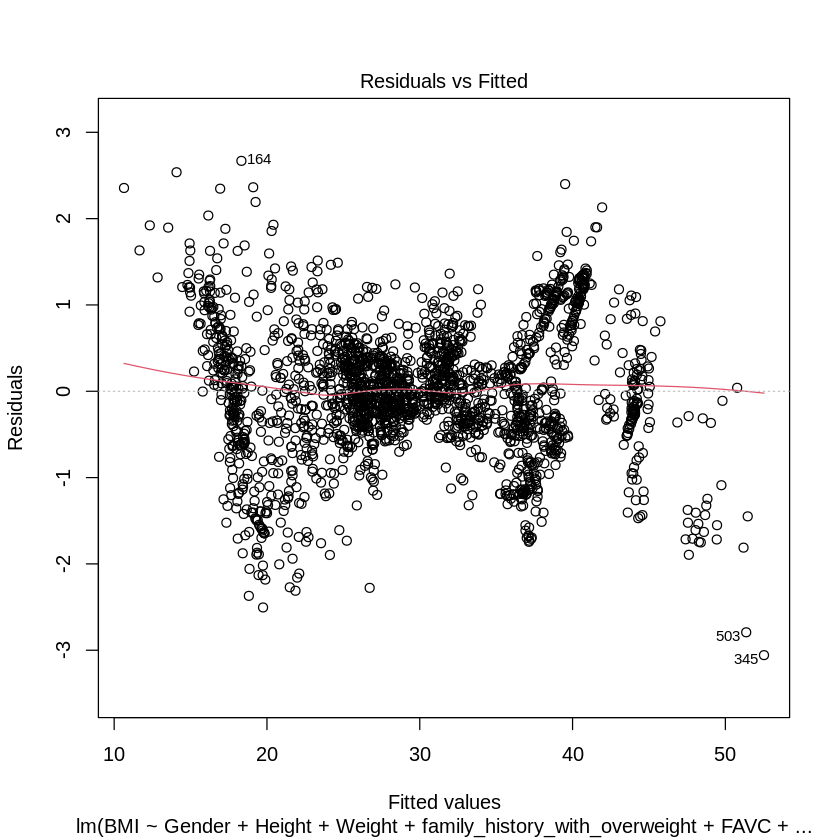


	Shapiro-Wilk normality test

data:  res
W = 0.98977, p-value = 4.392e-11


GVIF     Df GVIF^(1/(2*Df))
Gender                         1.942861 1  1.393866       
Height                         2.544677 1  1.595204       
Weight                         2.212647 1  1.487497       
family_history_with_overweight 1.474649 1  1.214351       
FAVC                           1.191075 1  1.091364       
FCVC                           1.227404 1  1.107883       
NCP                            1.121477 1  1.058998       
CAEC                           1.481817 3  1.067741       
SMOKE                          1.026069 1  1.012951       
SCC                            1.103713 1  1.050577       
FAF                            1.228685 1  1.108461       
CALC                           1.259762 3  1.039237       
MTRANS                         1.194521 4  1.022467

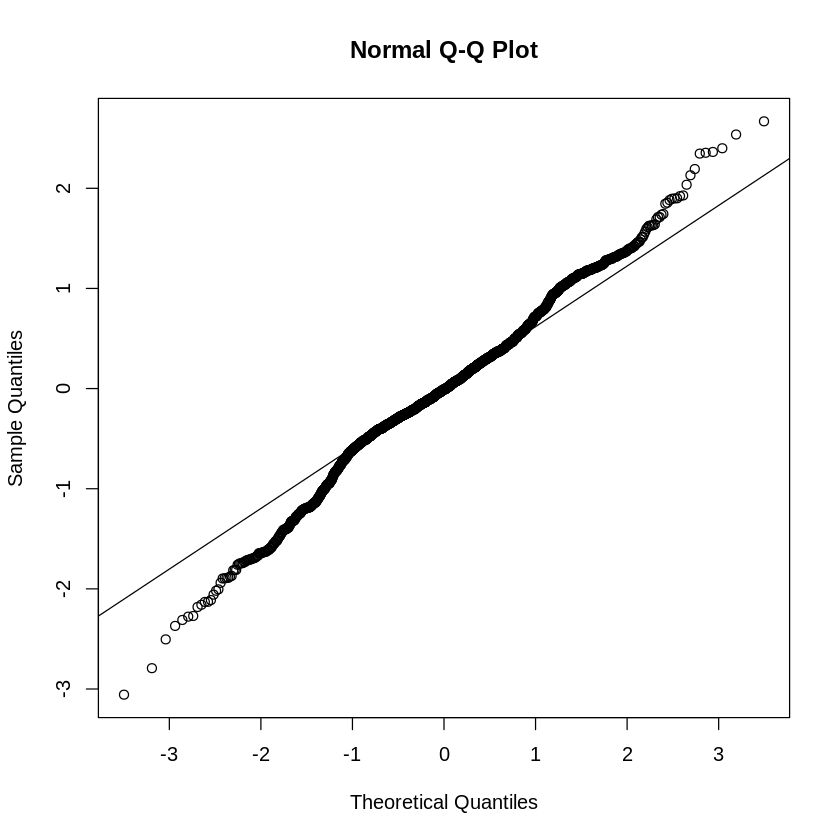

In [191]:
# Linearity Check
plot(final_model, which = 1)

# Normality Check
qqnorm(res)
qqline(res)
shapiro.test(res)

# Multicollinearity Check
library(car)
vif(final_model)


Warning message:
“not plotting observations with leverage one:
  27”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




	studentized Breusch-Pagan test

data:  final_model
BP = 282.49, df = 20, p-value < 2.2e-16


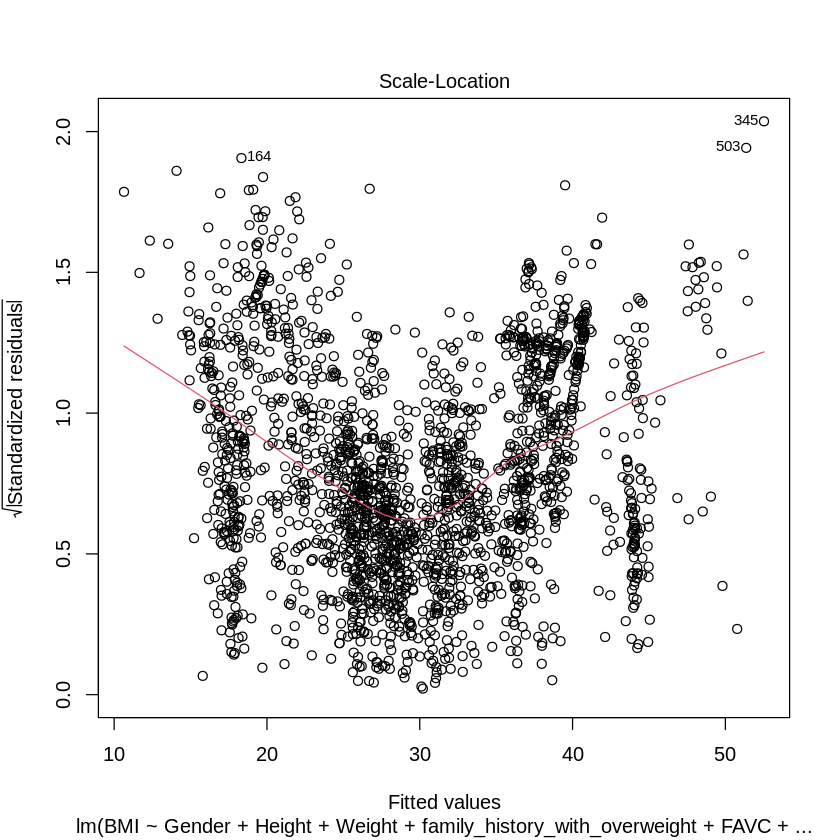

In [192]:
# Autocorrelation Check
# DurbinWatsonTest(final_model)

# Homoscedasticity Check
plot(final_model, which = 3)
install.packages('lmtest')
library(lmtest)
bptest(final_model)


In [196]:
names(df)

[1] "Gender"                         "Age"                           
 [3] "Height"                         "Weight"                        
 [5] "family_history_with_overweight" "FAVC"                          
 [7] "FCVC"                           "NCP"                           
 [9] "CAEC"                           "SMOKE"                         
[11] "CH2O"                           "SCC"                           
[13] "FAF"                            "TUE"                           
[15] "CALC"                           "MTRANS"                        
[17] "BMI"

In [197]:
# Fit a multiple linear regression model
# regression_model <- lm(BMI ~ Gender + Height + Weight + Age + CH2O + FAVC + SCC + family_history_with_overweight, data = df)

regression_model <- lm(BMI ~ Gender+ Age+ Height + Weight+ family_history_with_overweight +FAVC + FCVC + NCP + CAEC + SMOKE + CH2O+ SCC + FAF+ TUE+ CALC + MTRANS , data = df)


# Display the summary of the regression model
summary(regression_model)



Call:
lm(formula = BMI ~ Gender + Age + Height + Weight + family_history_with_overweight + 
    FAVC + FCVC + NCP + CAEC + SMOKE + CH2O + SCC + FAF + TUE + 
    CALC + MTRANS, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.02152 -0.39386 -0.00804  0.41751  2.63822 

Coefficients:
                                    Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                        5.602e+01  8.850e-01   63.298  < 2e-16 ***
GenderMale                         1.342e-01  4.524e-02    2.966 0.003052 ** 
Age                                2.189e-03  3.642e-03    0.601 0.547828    
Height                            -3.321e+01  2.842e-01 -116.853  < 2e-16 ***
Weight                             3.312e-01  9.581e-04  345.724  < 2e-16 ***
family_history_with_overweightyes  5.979e-01  5.139e-02   11.634  < 2e-16 ***
FAVCyes                            2.589e-01  5.551e-02    4.665 3.29e-06 ***
FCVC                               2.827e-01  3.379e-02    8.365  < 2

#### Conclusion:


Your multiple linear regression model has a high \( R^2 \) value, indicating that the model explains a large proportion of the variance in the dependent variable (BMI). Let's break down and comment on the findings:

1. **Coefficients:**
   - **Intercept (56.06):** The estimated intercept represents the expected BMI when all other predictor variables are zero. In this context, it might not have a meaningful interpretation.
   - **Gender (0.12):** Being male is associated with a slight increase in BMI.
   - **Height (-33.20):** Taller individuals have a lower BMI.
   - **Weight (0.33):** As expected, weight has a strong positive association with BMI.
   - **Family history with overweight (0.60):** Having a family history of overweight is associated with a higher BMI.
   - **FAVC (0.26):** Frequent consumption of high-caloric food is associated with a higher BMI.
   - **FCVC (0.24):** Frequency of consumption of vegetables has a positive association with BMI.
   - **NCP (0.19):** Number of main meals per day is positively associated with BMI.
   - **CAEC (Frequently -0.43, no 0.31, Sometimes 0.10):** Different frequencies of consumption of food between meals have varied associations with BMI.
   - **SMOKE (yes -0.38):** Smoking is associated with a lower BMI.
   - **CH2O (0.01):** Water intake has a weak positive association with BMI.
   - **SCC (yes -0.29):** Self-confidence in weight control is associated with a lower BMI.
   - **FAF (-0.10):** Physical activity level is negatively associated with BMI.
   - **TUE (-0.02):** Time using technology devices daily is negatively associated with BMI.
   - **CALC (Frequently -0.21, no -0.27, Sometimes -0.47):** Different frequencies of alcohol consumption have varied associations with BMI.
   - **MTRANS (Various):** Different modes of transportation have varied associations with BMI.

2. **Statistical Significance:**
   - Many of the coefficients have p-values less than 0.05, indicating that they are statistically significant predictors of BMI.

3. **Goodness of Fit:**
   - The \( R^2 \) value is very high (0.9915), indicating that the model explains approximately 99.15% of the variance in BMI.
   - The Adjusted \( R^2 \) is also high (0.9914), adjusting for the number of predictors in the model.
   - The F-statistic is 1.053e+04, and the associated p-value is very low (< 2.2e-16), indicating that the overall model is highly significant.

4. **Residuals:**
   - The residuals have a mean close to zero, and the residual standard error is 0.7446, suggesting that the model fits the data well.

5. **AIC (Akaike Information Criterion):**
   - The AIC is not directly provided in the output you provided, but it's a metric used for model comparison. Lower AIC values indicate a better-fitting model.

In summary, the model appears to fit the data very well, explaining a large proportion of the variance in BMI. Many predictor variables are statistically significant, providing insights into their associations with BMI. The high \( R^2 \) and low p-values for the model suggest that it is a good fit for the data. However, it's also important to consider the practical significance of the coefficients and the assumptions of the linear regression model.

## useful

### ii

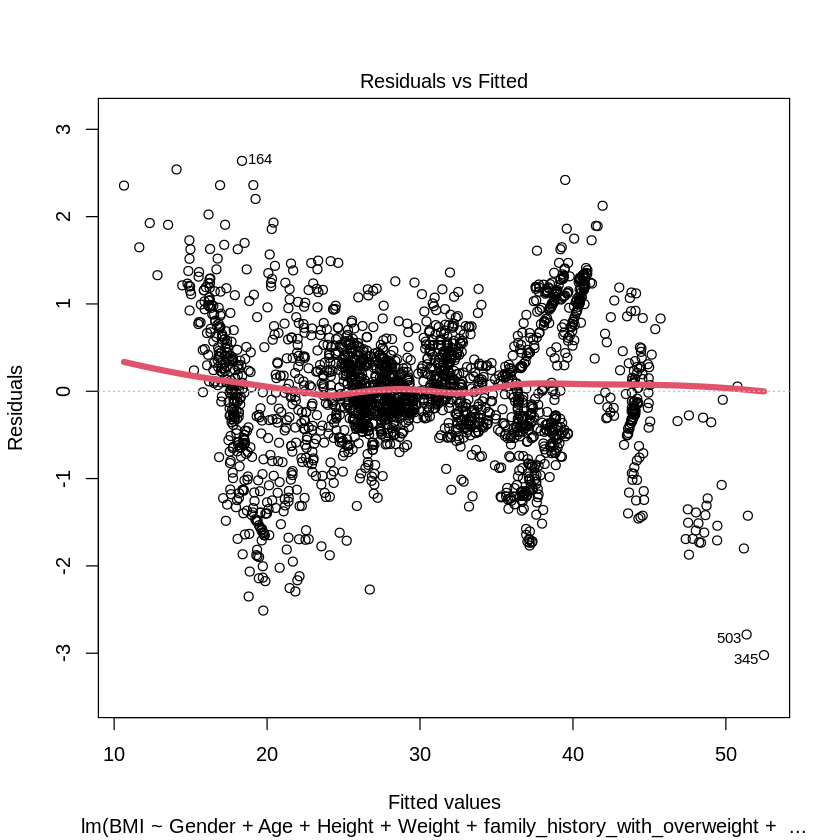

In [200]:
# Linearity

# Residuals vs. Fitted Values
plot(regression_model, which = 1, lwd=5)

Warning message:
“not plotting observations with leverage one:
  27”


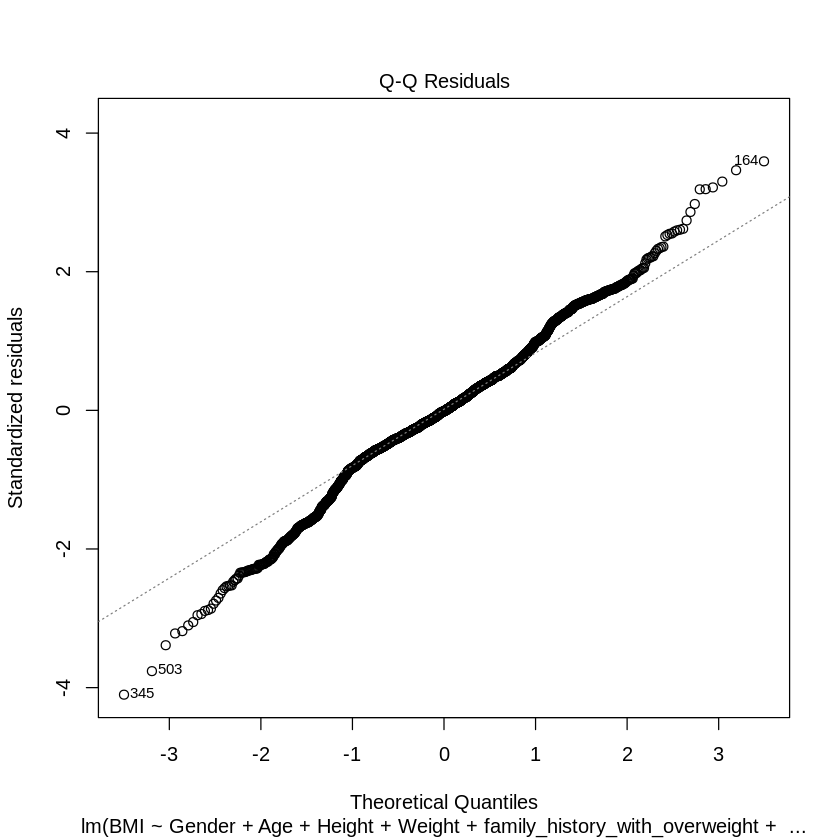

In [201]:
# 2. Independence of Errors:
# Residuals vs. Order of Observations
plot(regression_model, which = 2)


Warning message:
“not plotting observations with leverage one:
  27”


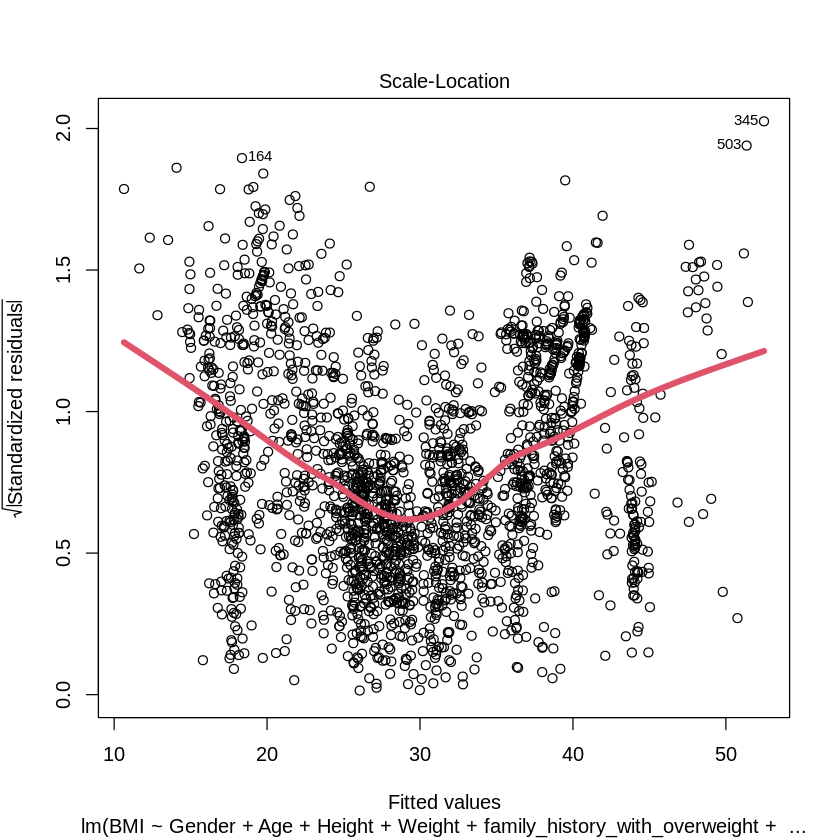

In [202]:
# Homoscedasticity
# Scale-Location Plot
plot(regression_model, which = 3, lwd=5)


### iii. 3

In [204]:
# Install and load the car package
if (!requireNamespace("car", quietly = TRUE)) {
  install.packages("car")
}
library(car)

In [205]:
# Bonferroni Outlier Test
outlier_test <- outlierTest(regression_model)
print(outlier_test)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
     rstudent unadjusted p-value Bonferroni p
345 -4.117212         3.9842e-05     0.084067


**Conclusion:** p value is less then 0.05. there is a outliers

# 21. Comparative Analysis using Sampled Dataset.
- Draw a random sample of size n = 50 from the Obesity Dataset (ObesityData.csv) using
last three digits of your registration number as seed number. Repeat the tasks 10-14 and
the task 16 using this sample. Discuss if any different methods you had to apply to perform
the assigned tasks on this sample. Also, compare the results of the analysis of sampled
data and original data.

In [207]:
# Draw a random sample
set.seed(119)

sampled_data <- df[sample(nrow(df), 50, replace = FALSE), ]
head(sampled_data)
dim(sampled_data)

Gender Age      Height   Weight    family_history_with_overweight FAVC
1064 Female 45.00000 1.675953  79.66832 yes                            yes 
387  Female 18.00000 1.590000  53.00000 no                             no  
1108 Female 37.20517 1.667469  80.99337 yes                            yes 
1445 Female 23.65244 1.562724  80.53570 yes                            yes 
1922 Female 25.91852 1.621231 104.98679 yes                            yes 
596  Male   17.21093 1.819557  58.32512 yes                            yes 
     FCVC     NCP     CAEC      SMOKE CH2O     SCC FAF      TUE      CALC     
1064 2.598051 3.00000 Sometimes no    1.000000 no  0.000000 0.000000 no       
387  1.000000 3.00000 Sometimes no    1.000000 no  1.000000 2.000000 no       
1108 2.010540 2.77684 Sometimes no    1.651548 no  0.000000 0.790967 no       
1445 2.000000 1.00000 Sometimes no    2.000000 no  0.389717 0.000000 no       
1922 3.000000 3.00000 Sometimes no    1.653049 no  0.139159 0.711331 Sometimes
596  2.559600 4.00000 Sometimes no    2.000000 no  2.000000 0.331483 no       
     MTRANS                BMI   
1064 Automobile            28.364
387  Public_Transportation 20.964
1108 Automobile            29.130
1445 Public_Transportation 32.978
1922 Public_Transportation 39.943
596  Automobile            17.617

[1] 50 17